In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import cm
from matplotlib import pyplot as plt
import numpy as np
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.4.0 installed at /home/carter/.venv.camb/lib/python3.10/site-packages/camb


In [2]:
def get_minima(val_list, criteria = 2, offset=0):
    extrema = []
    #test for minimum
    for i in np.arange(len(val_list)-2*criteria-1):
        min = True
        for j in np.arange(1, criteria):
            min = min and val_list[i+criteria] < val_list[i+criteria-j] and val_list[i+criteria]<val_list[i+criteria+j]
        if(min):
            extrema.append([val_list[i+criteria], i+criteria+offset])
    return np.array(extrema)

def get_maxima(val_list, criteria = 2, offset=0):
    extrema = []
    #test for maximum
    for i in np.arange(len(val_list)-2*criteria-1):
        min = True
        for j in np.arange(1, criteria):
            min = min and val_list[i+criteria] > val_list[i+criteria-j] and val_list[i+criteria]>val_list[i+criteria+j]
        if(min):
            extrema.append([val_list[i+criteria], i+criteria+offset])
    return np.array(extrema)

# Examining the difference between total and lensed_scalar CAMB results

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


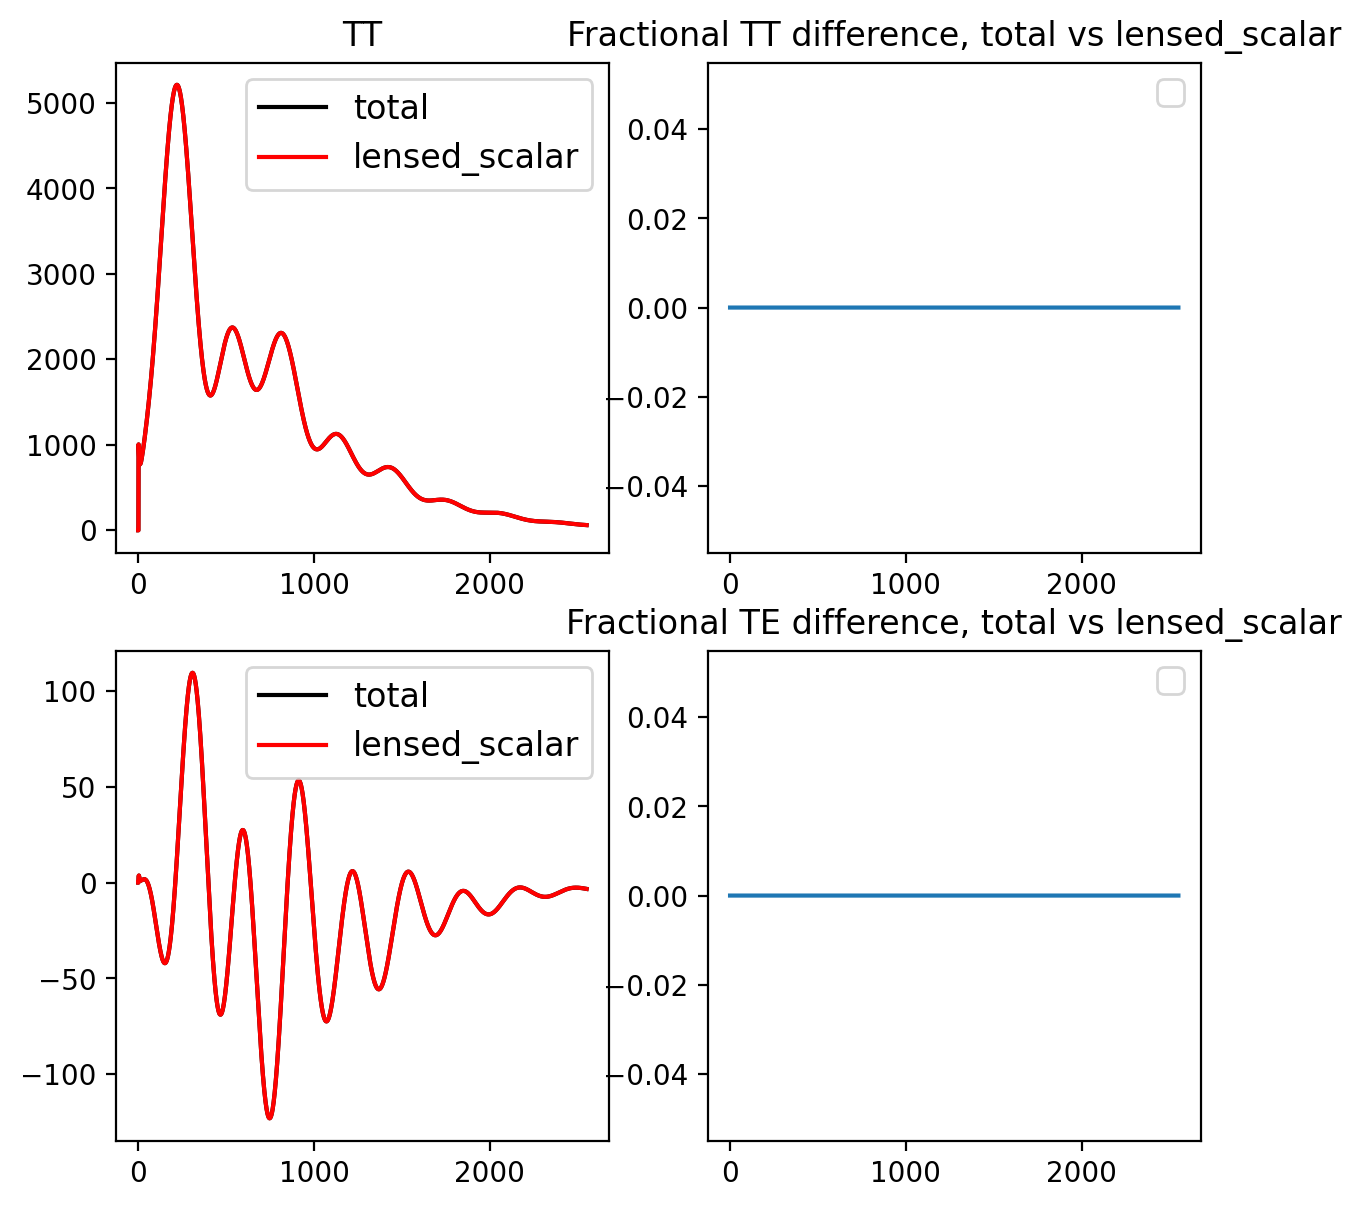

In [3]:
fig, ax = plt.subplots(2,2, figsize=(7,7))
ax[0,0].set_title('TT')
vals_and_colors = np.array([[67.4, 'green'],[73.3, 'blue']])
for H in [67.4]:
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=H)
    pars.set_for_lmax(2500, lens_potential_accuracy=0)
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')

    totCL = powers['total']
    unlensedCL=powers['unlensed_scalar']
    lensedCL = powers['lensed_scalar']
    ls = np.arange(totCL.shape[0])
    ax[0,0].plot(ls, totCL[:,0], color='k', label='total')
    ax[0,0].plot(ls, lensedCL[:,0], color='r', label ='lensed_scalar')

    ax[0,1].plot(ls[2:], 1-lensedCL[2:,0]/totCL[2:,0])
    ax[0,1].set_title('Fractional TT difference, total vs lensed_scalar')

    ax[1,0].plot(ls, totCL[:,3], color='k', label='total')
    ax[1,0].plot(ls, lensedCL[:,3], color='r', label ='lensed_scalar')

    ax[1,1].plot(ls[2:], 1-lensedCL[2:,3]/totCL[2:,3])
    ax[1,1].set_title('Fractional TE difference, total vs lensed_scalar')
for axl in np.array(ax).flatten():
    axl.legend(fontsize='large')
plt.show()

# Varying $H_0$
### CMB Power Spectra

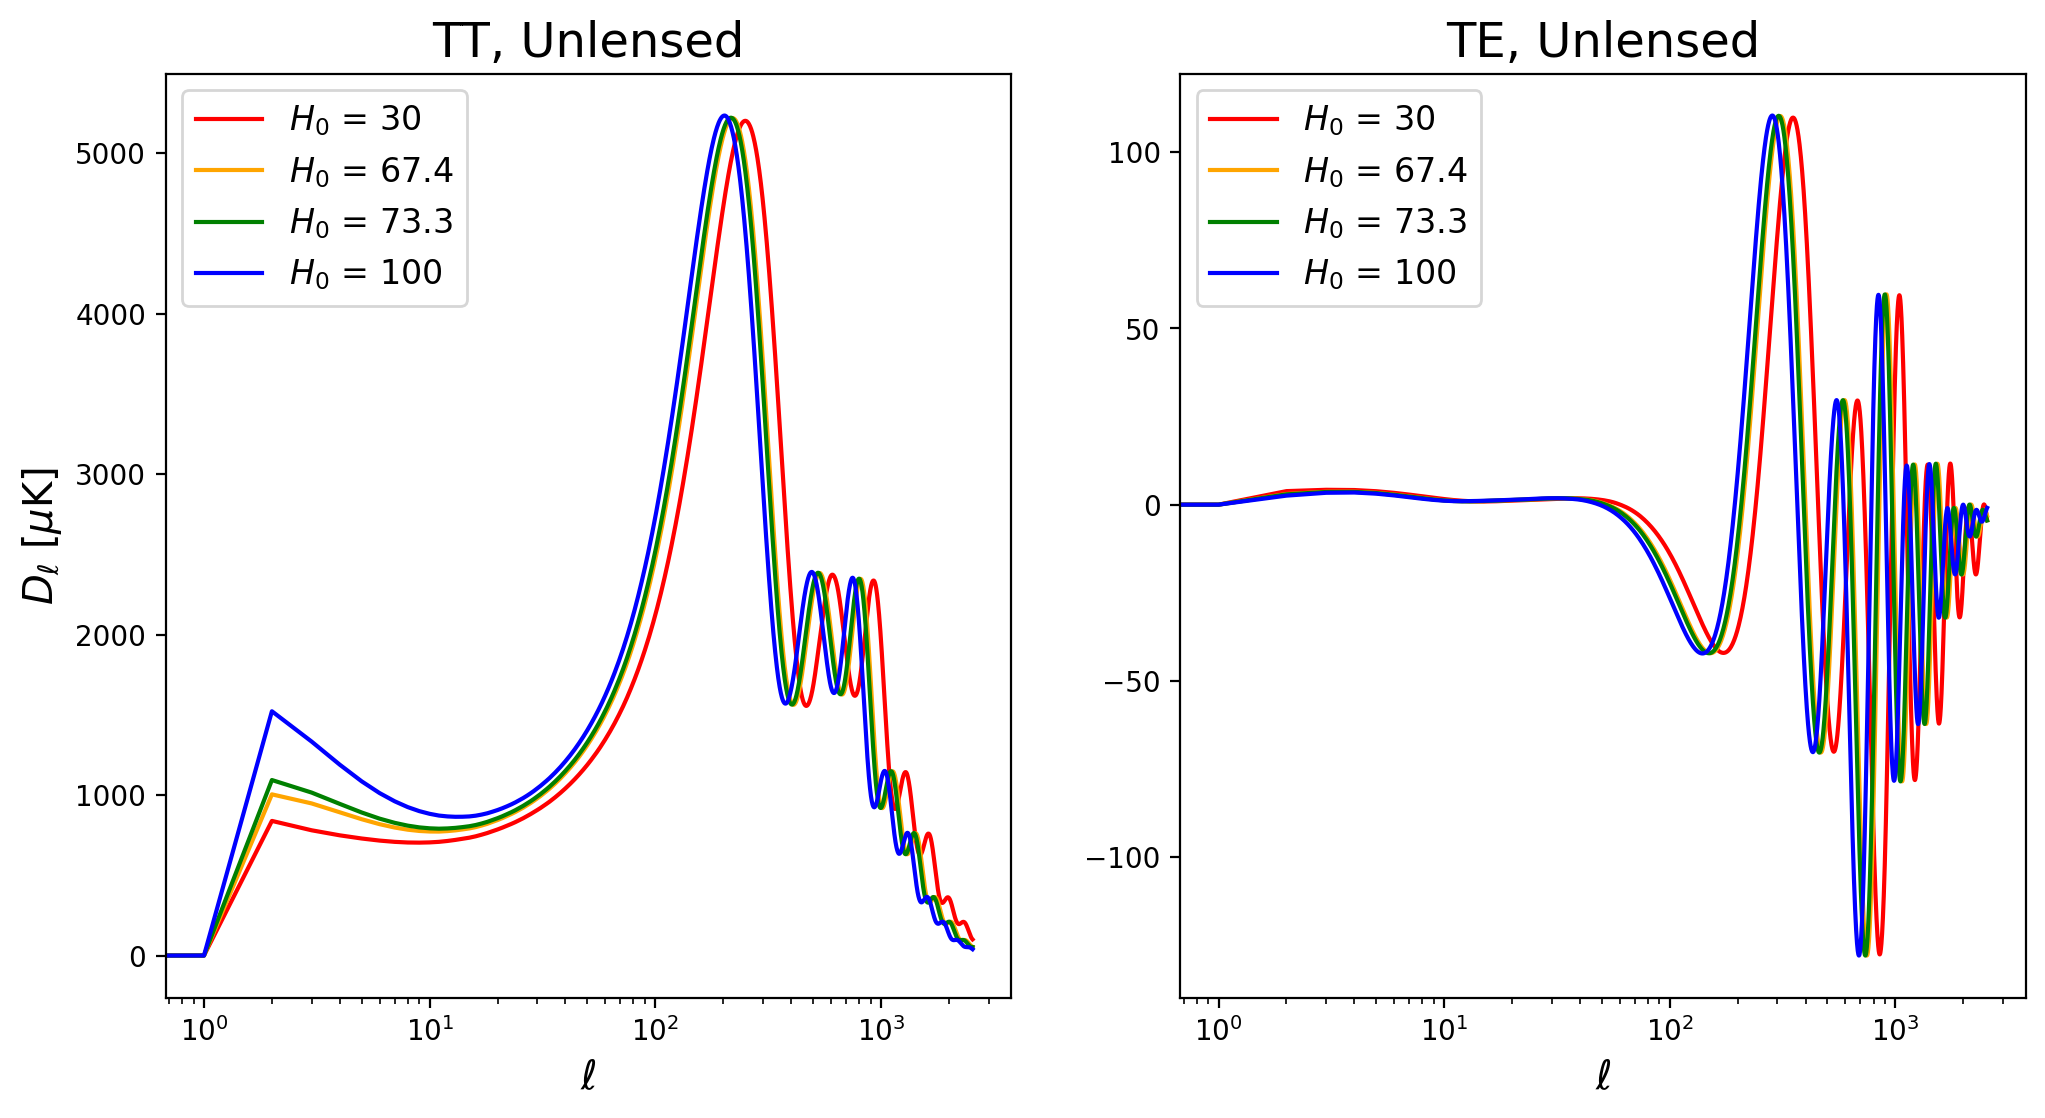

In [4]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].set_title('TT, Unlensed', fontsize='xx-large')
ax[1].set_title('TE, Unlensed', fontsize='xx-large')
#list of parameter values and their respective colors to be plotted, in the form [param, unlensed color, lensed color]
vals_and_colors = np.array([[30, 'red', 'darkred'],[67.4, 'orange', 'darkorange'],[73.3, 'green', 'darkgreen'], [100, 'blue', 'darkblue']])
for i in vals_and_colors:
    H = float(i[0])
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=H)
    pars.set_for_lmax(2500, lens_potential_accuracy=0)
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')

    unlensedCL=powers['unlensed_scalar']
    lensedCL = powers['lensed_scalar']
    ls = np.arange(unlensedCL.shape[0])
    ax[0].semilogx(ls, unlensedCL[:,0], color=i[1], label='$H_0$ = ' +i[0])
    #ax[0].plot(ls, lensedCL[:,0] , color=i[2], label ='Lensed, H_0 = ' +str(i[0]))

    ax[1].semilogx(ls, unlensedCL[:,3], color=i[1], label='$H_0$ = ' +i[0])
    #ax[1].plot(ls, lensedCL[:,3] , color=i[2], label ='Lensed, H_0 = ' +str(i[0]))
for axl in np.array(ax).flatten():
    axl.legend(fontsize='large')
    axl.set_xlabel('$\ell$', fontsize='x-large')
ax[0].set_ylabel('$D_\ell$ [$\mu$K]', fontsize='x-large')
plt.show()

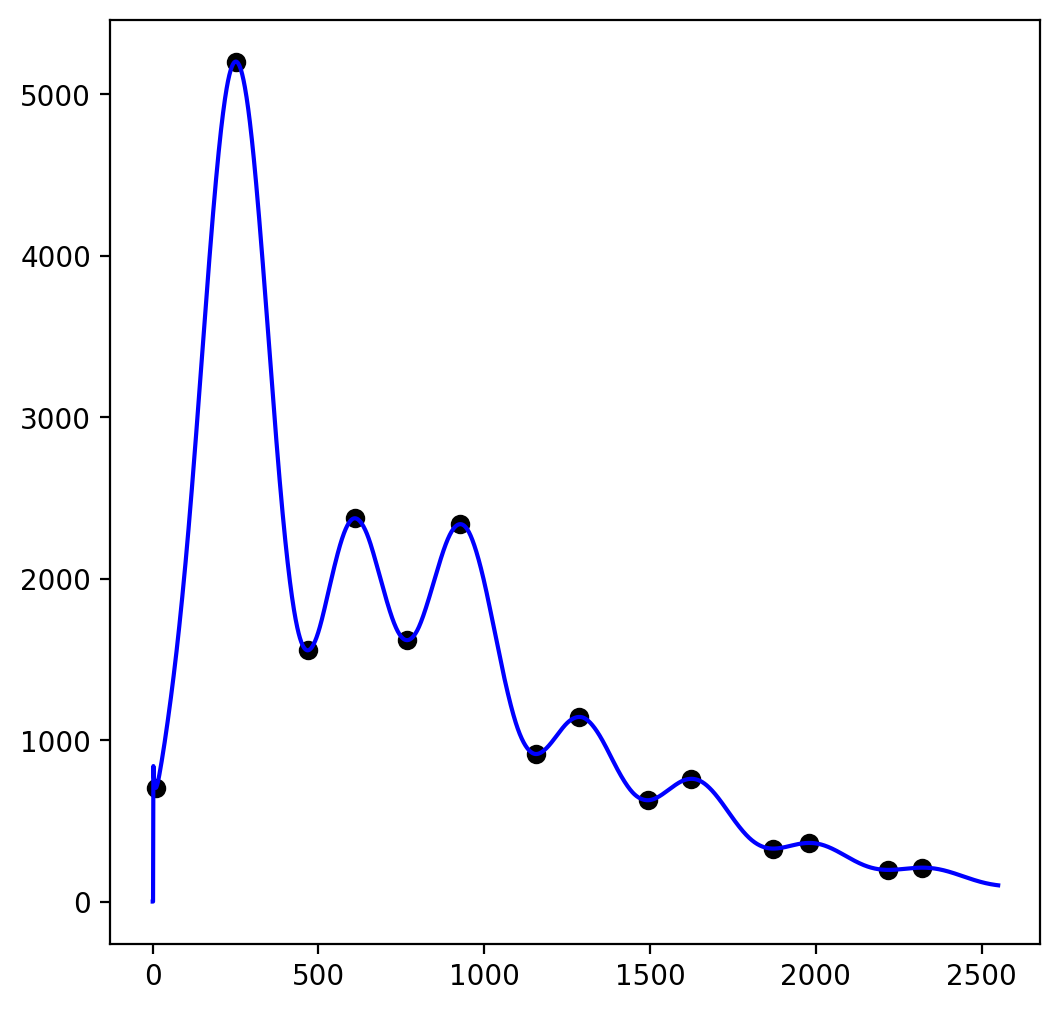

In [5]:
# Testing get_maxima and get_minima fcns
fig, ax = plt.subplots(1,1,figsize=(6,6))
pars = camb.CAMBparams()
pars.set_cosmology(H0=30)
pars.set_for_lmax(2500, lens_potential_accuracy=0)
results = camb.get_results(pars)
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')

unlensedCL=powers['unlensed_scalar']
lensedCL = powers['lensed_scalar']
ls = np.arange(unlensedCL.shape[0])
ax.plot(ls, unlensedCL[:,0], color=i[1], label='$H_0$ = ' +i[0])


maxima = get_maxima(unlensedCL[:,0], criteria = 5)
ax.scatter(maxima[:,1], maxima[:,0], color='k')

minima = get_minima(unlensedCL[:,0], criteria = 5)
ax.scatter(minima[:,1], minima[:,0], color='k')

#np.savetxt('30_maxima.csv', maxima, delimiter=',')
#np.savetxt('30_minima.csv', minima, delimiter=',')

plt.show()

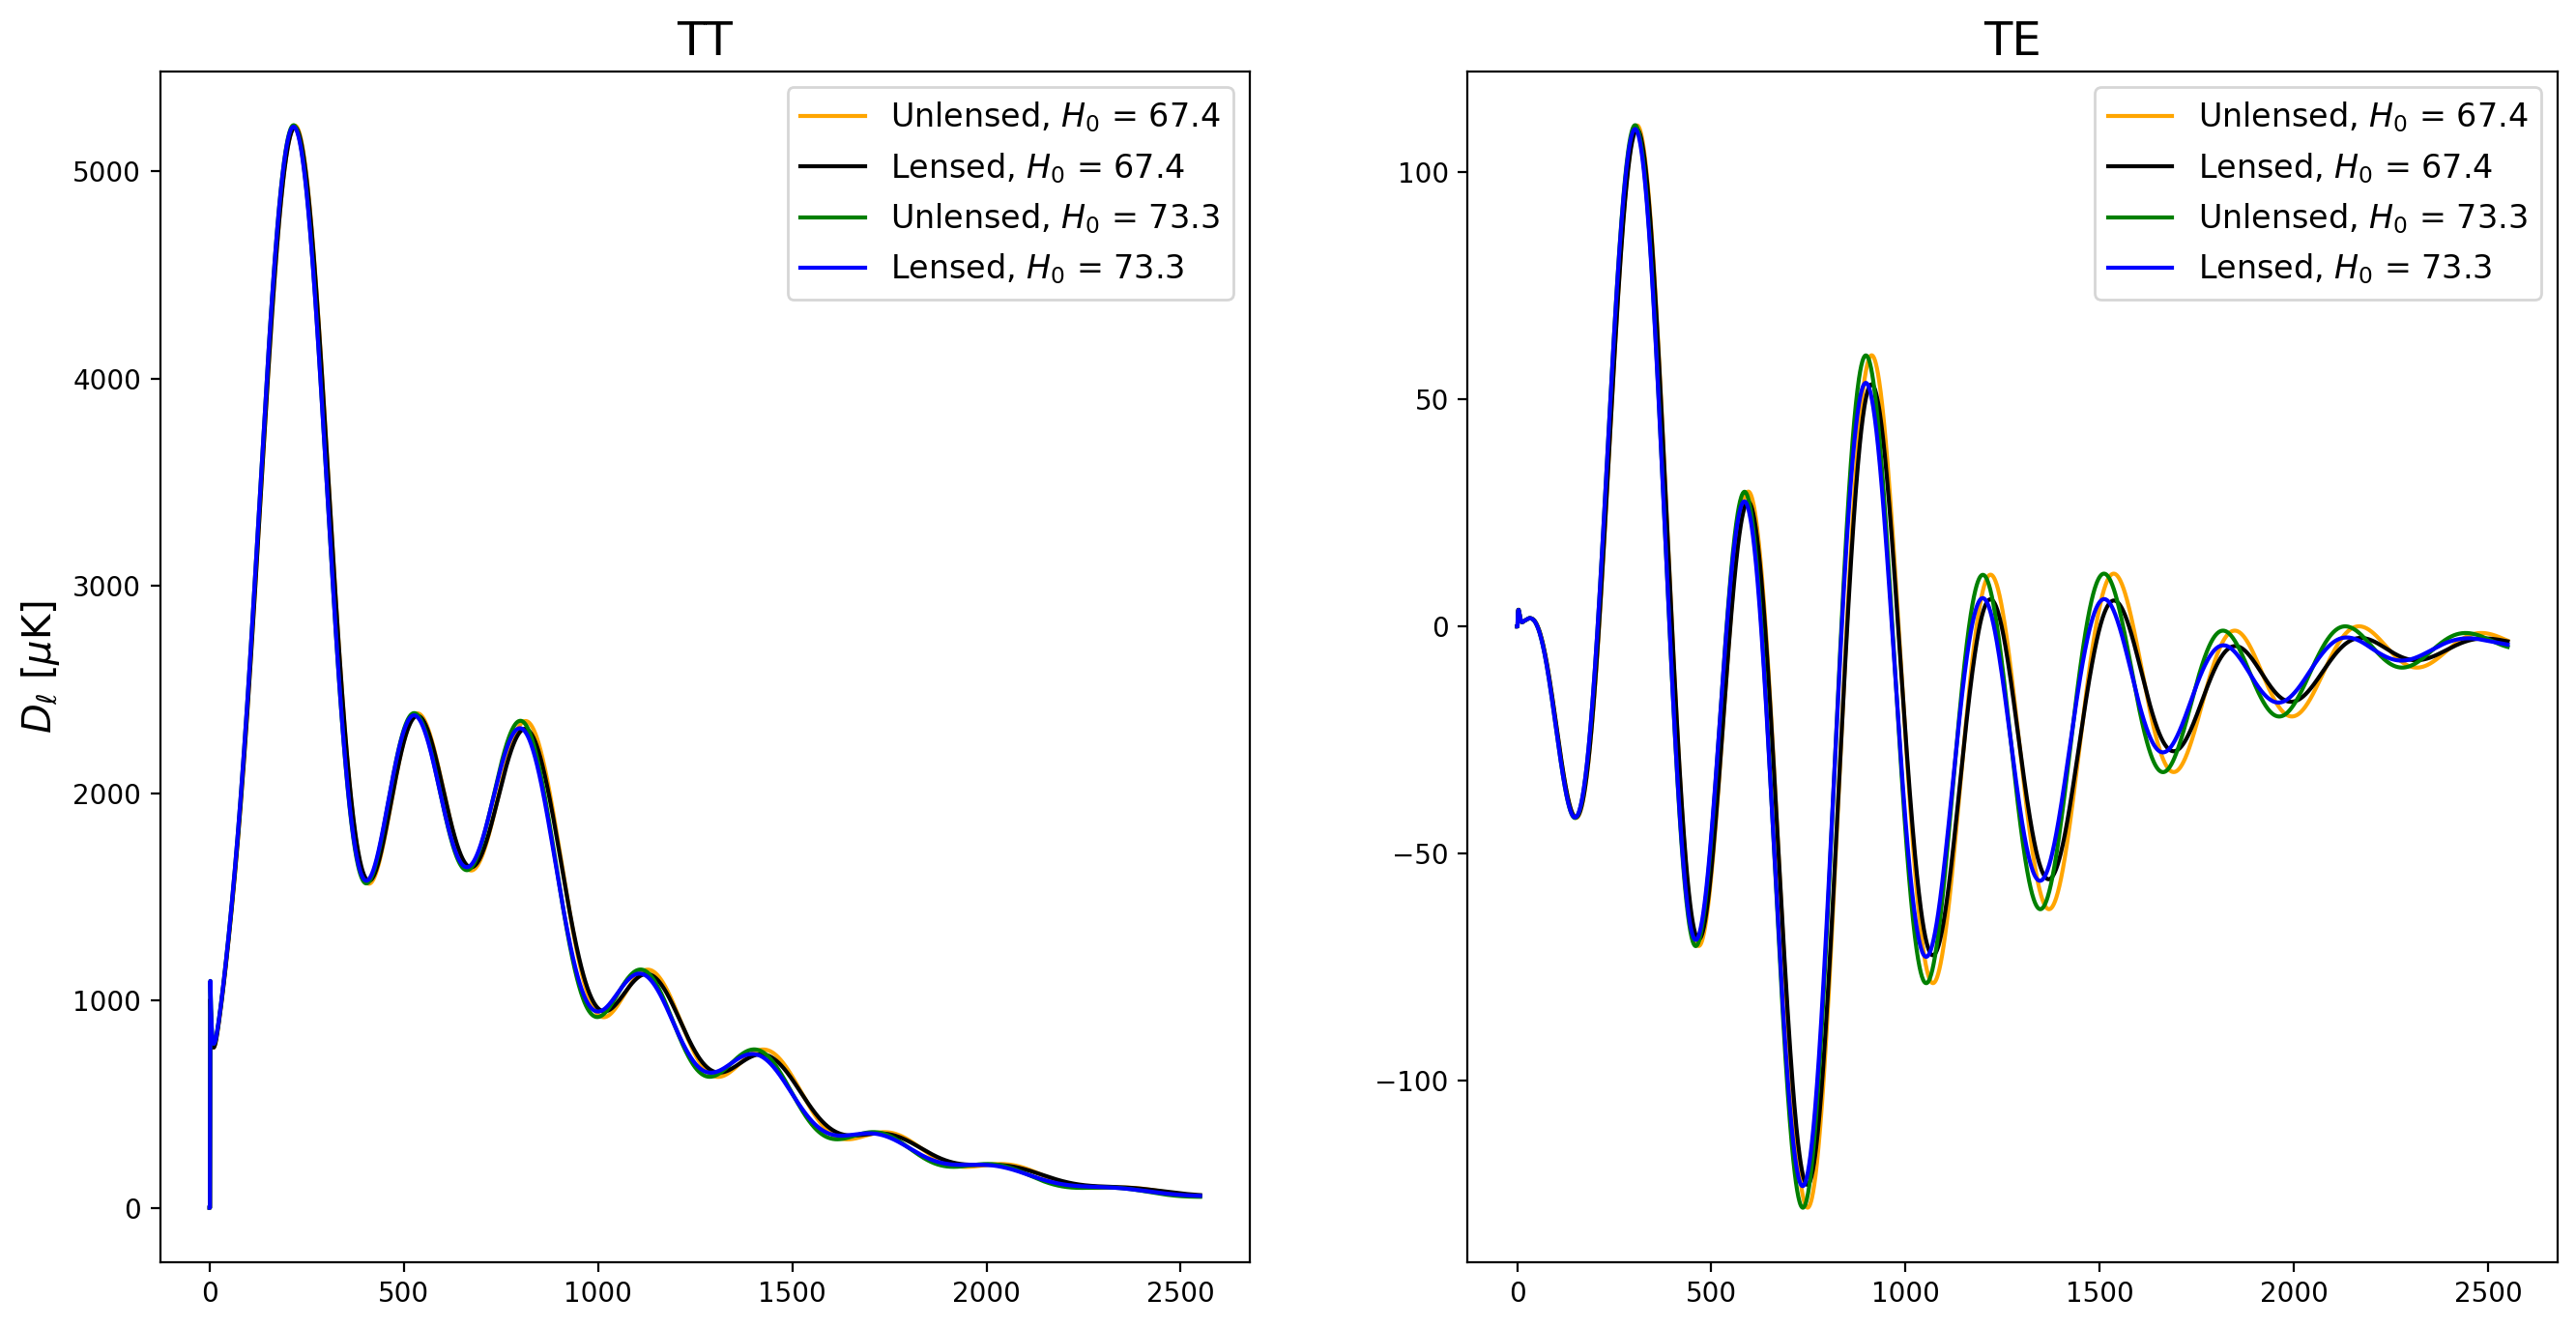

In [6]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].set_title('TT', fontsize='xx-large')
ax[1].set_title('TE', fontsize='xx-large')
#list of parameter values and respective colors to be plotted, in the form [param, unlensed color, lensed color]
vals_and_colors = np.array([[67.4, 'orange', 'black'],[73.3, 'green', 'blue']])
for i in vals_and_colors:
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=float(i[0]))
    pars.set_for_lmax(2500, lens_potential_accuracy=0)
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')

    unlensedCL=powers['unlensed_scalar']
    lensedCL = powers['lensed_scalar']
    ls = np.arange(unlensedCL.shape[0])
    ax[0].plot(ls, unlensedCL[:,0], color=i[1], label='Unlensed, $H_0$ = ' +str(i[0]))
    ax[0].plot(ls, lensedCL[:,0] , color=i[2], label ='Lensed, $H_0$ = ' +str(i[0]))

    ax[1].plot(ls, unlensedCL[:,3], color=i[1], label='Unlensed, $H_0$ = ' +str(i[0]))
    ax[1].plot(ls, lensedCL[:,3] , color=i[2], label ='Lensed, $H_0$ = ' +str(i[0]))
for axl in np.array(ax).flatten():
    axl.legend(fontsize='large')
ax[0].set_ylabel('$D_\ell$ [$\mu$K]', fontsize='x-large')
plt.show()

### Matter Power Spectra

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


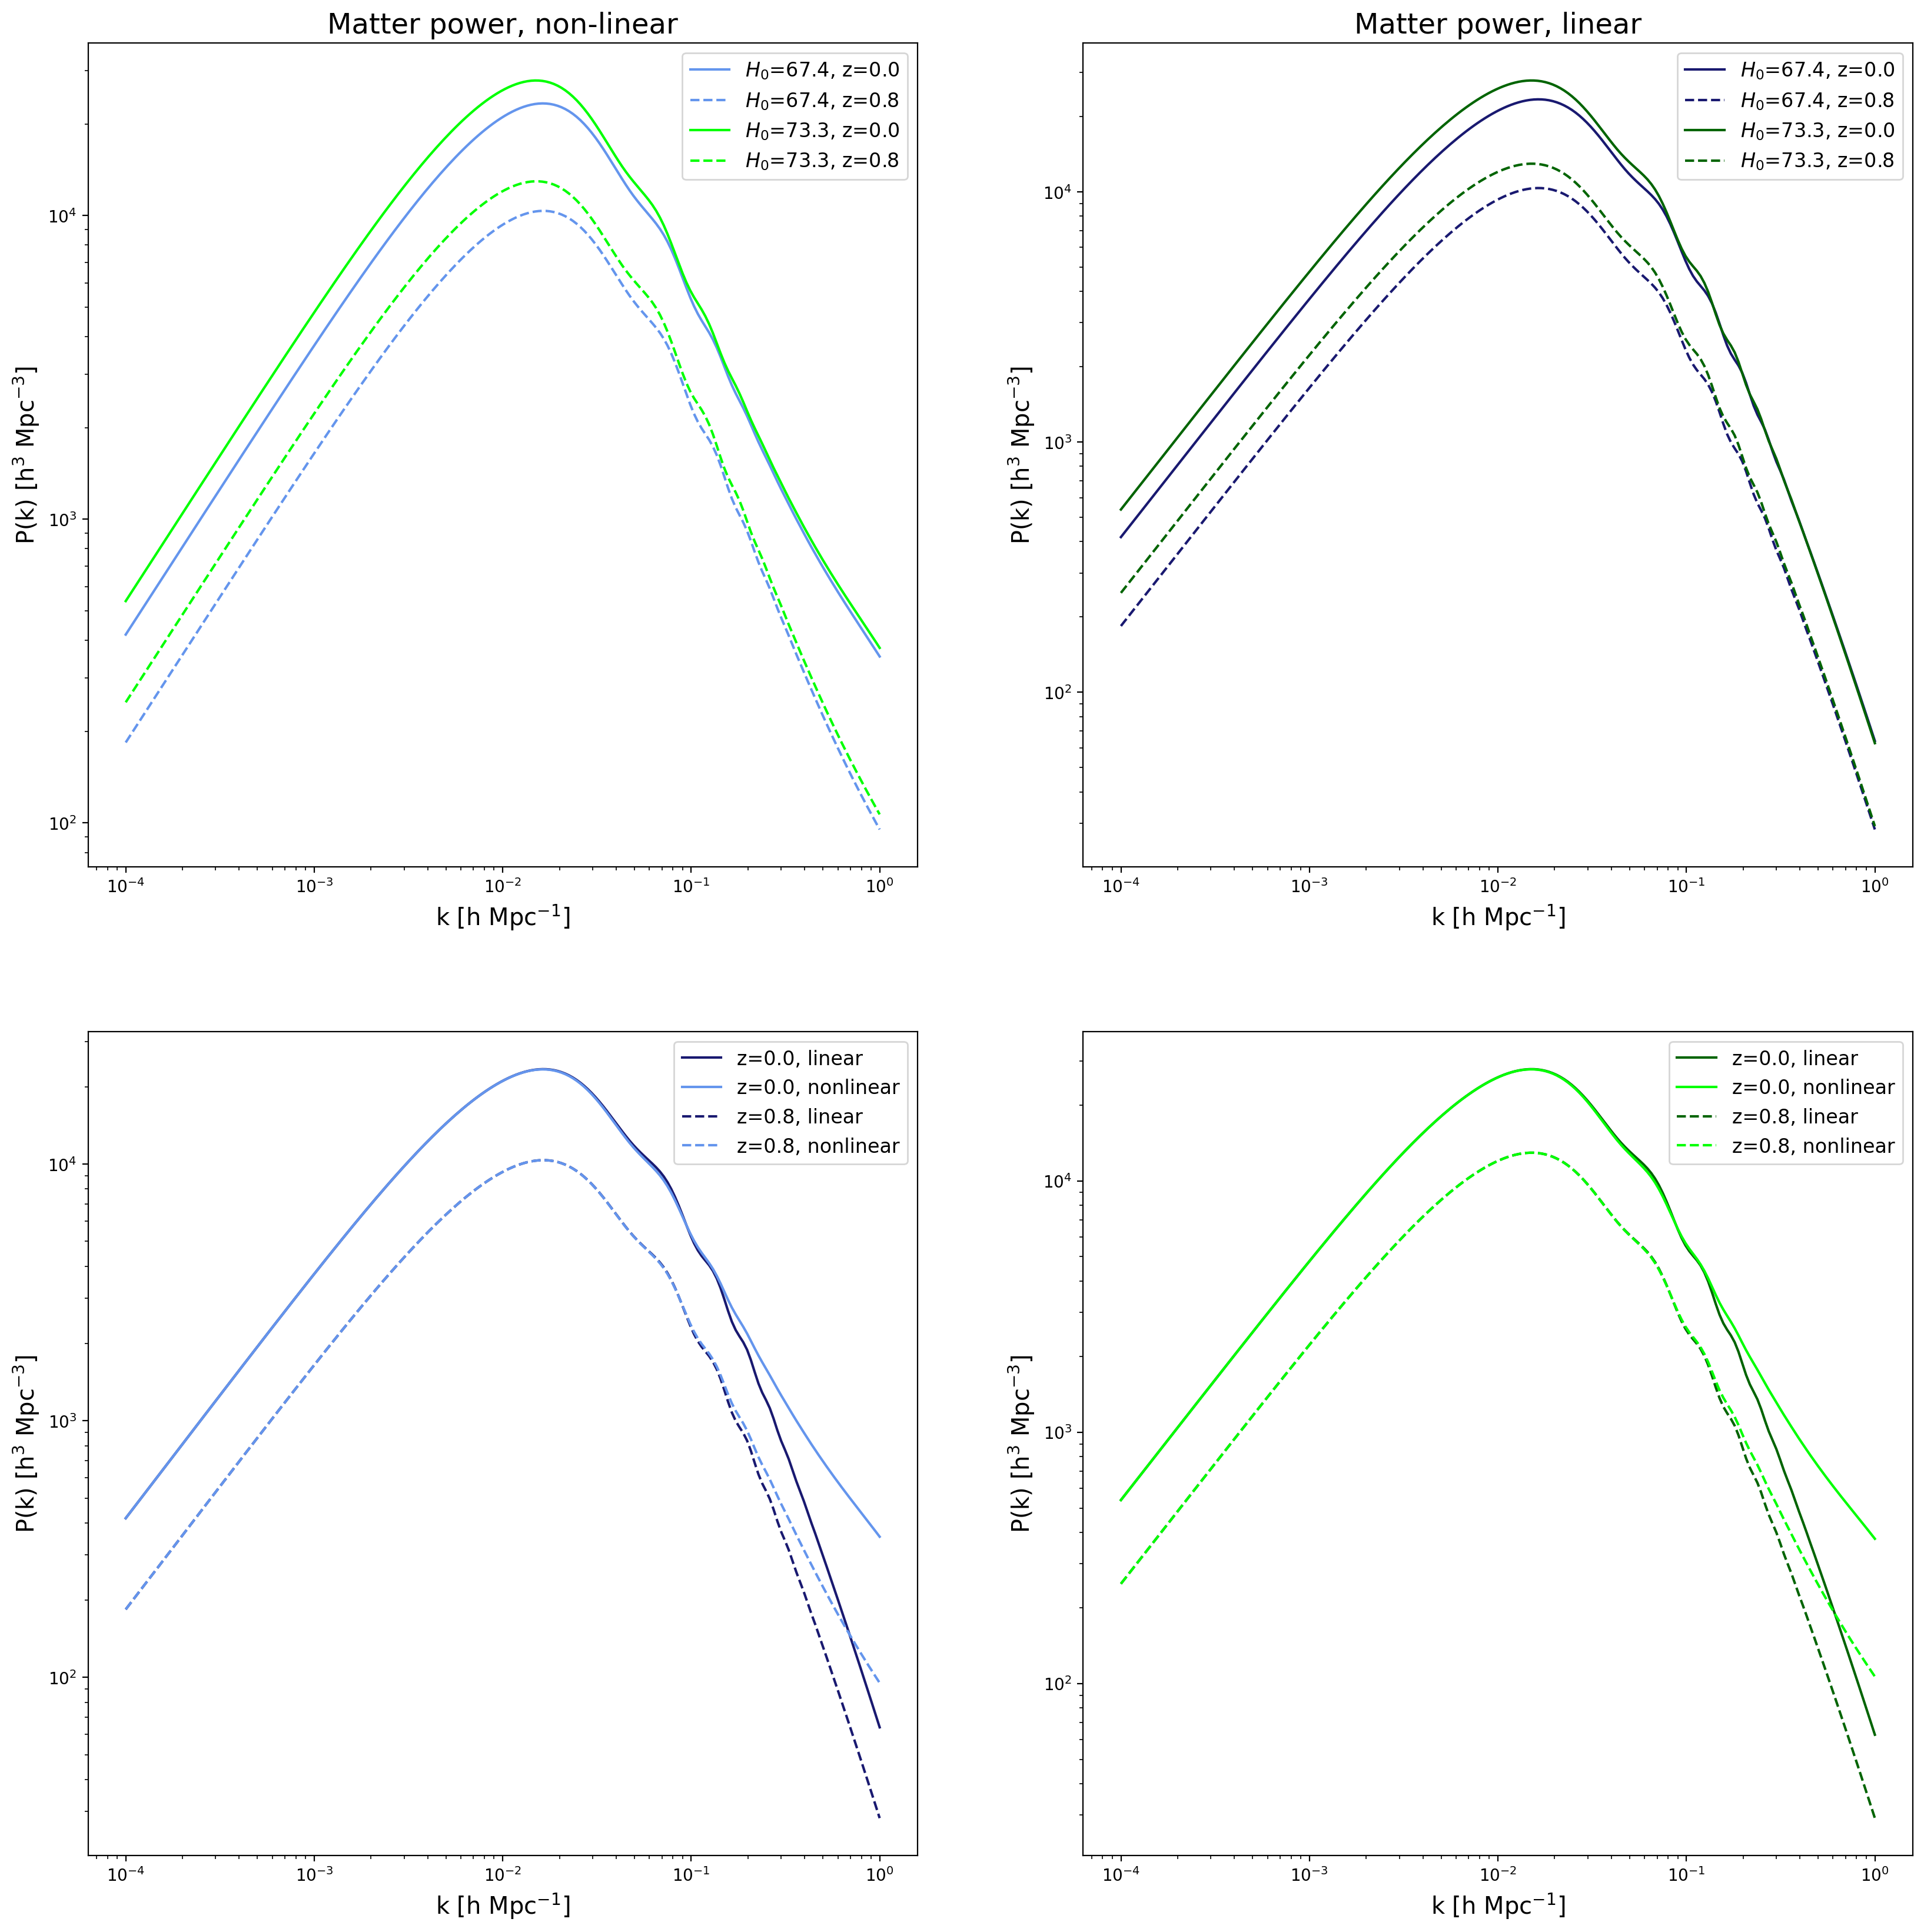

In [7]:
#Hubble tension values of H_0
fig, ax = plt.subplots(2,2, figsize=(20,20))
ax[0,0].set_title('Matter power, non-linear', fontsize='xx-large')
ax[0,1].set_title('Matter power, linear', fontsize='xx-large')
#list of parameter values and their respective colors to be plotted, in the form [param, non-linear color, linear color]
vals_and_colors = np.array([[67.4, 'cornflowerblue', 'midnightblue'],[73.3, 'lime', 'darkgreen']])
for i in vals_and_colors:
    H = float(i[0])
    pars = camb.CAMBparams()
    pars.set_cosmology(H0= H)
    #Note non-linear corrections couples to smaller scales than you want
    pars.set_matter_power(redshifts=[0., 0.8], kmax=2.0)

    #Linear spectra
    pars.NonLinear = model.NonLinear_none
    results = camb.get_results(pars)
    kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

    #Non-Linear spectra (Halofit)
    pars.NonLinear = model.NonLinear_both
    results.calc_power_spectra(pars)
    kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

    for j, (redshift, line) in enumerate(zip(z,['-','--'])):
        ax[0,1].loglog(kh, pk[j,:], color=i[2], ls = line, label = '$H_0$='+i[0]+', z=' + str(redshift))
        ax[0,0].loglog(kh_nonlin, pk_nonlin[j,:], color=i[1], ls = line, label = '$H_0$='+i[0]+', z=' + str(redshift))
        if i[0] == '67.4':
            ax[1,0].loglog(kh, pk[j,:], color=i[2], ls = line, label = 'z=' + str(redshift)+', linear')
            ax[1,0].loglog(kh_nonlin, pk_nonlin[j,:], color=i[1], ls = line, label = 'z=' + str(redshift)+', nonlinear')
        else:
            ax[1,1].loglog(kh, pk[j,:], color=i[2], ls = line, label = 'z=' + str(redshift)+', linear')
            ax[1,1].loglog(kh_nonlin, pk_nonlin[j,:], color=i[1], ls = line, label = 'z=' + str(redshift)+', nonlinear')
    #plt.title('Matter power at z=%s and z= %s'%tuple(z))


for axl in np.array(ax).flatten():
    axl.legend(fontsize='large')
    axl.set_xlabel('k [h Mpc$^{-1}$]', fontsize='x-large')
    axl.set_ylabel('P(k) [h$^3$ Mpc$^{-3}$]', fontsize='x-large')
plt.show()


Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


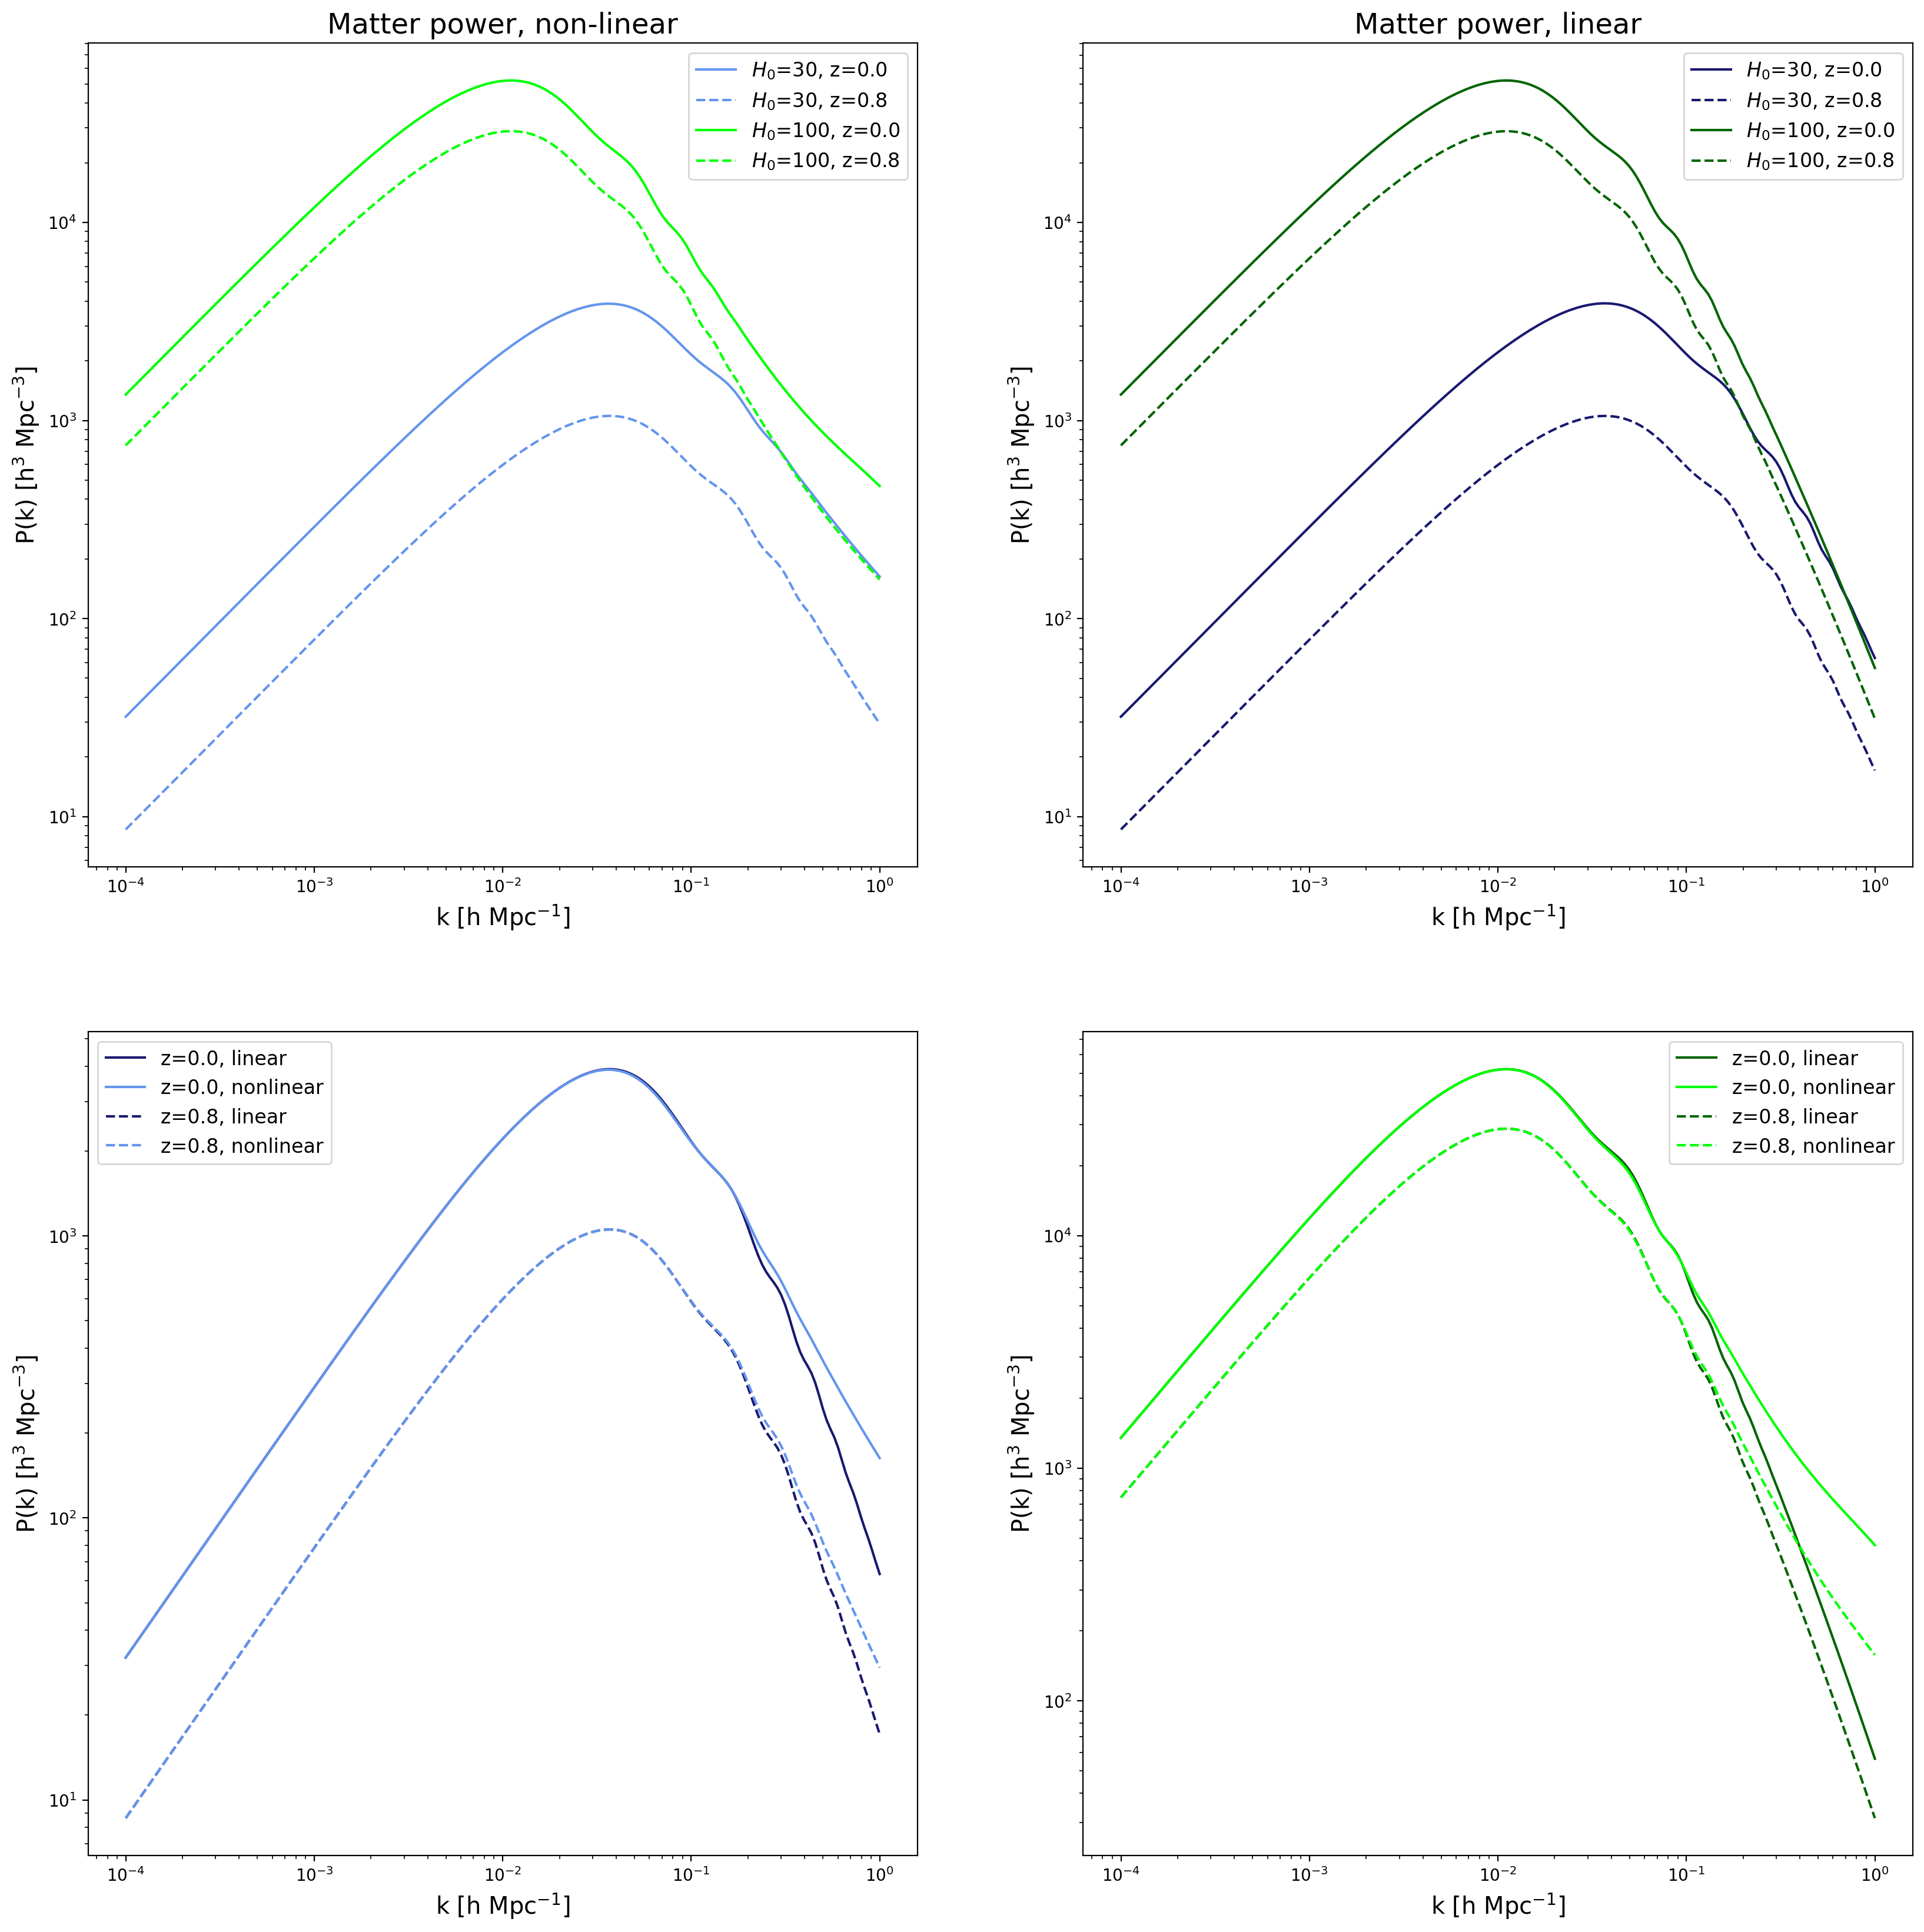

In [8]:
#Large and small values of H_0
fig, ax = plt.subplots(2,2, figsize=(20,20))
ax[0,0].set_title('Matter power, non-linear', fontsize='xx-large')
ax[0,1].set_title('Matter power, linear', fontsize='xx-large')
#list of parameter values and their respective colors to be plotted, in the form [param, non-linear color, linear color]
vals_and_colors = np.array([[30, 'cornflowerblue', 'midnightblue'],[100, 'lime', 'darkgreen']])
for i in vals_and_colors:
    H = float(i[0])
    pars = camb.CAMBparams()
    pars.set_cosmology(H0= H)
    #Note non-linear corrections couples to smaller scales than you want
    pars.set_matter_power(redshifts=[0., 0.8], kmax=2.0)

    #Linear spectra
    pars.NonLinear = model.NonLinear_none
    results = camb.get_results(pars)
    kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

    #Non-Linear spectra (Halofit)
    pars.NonLinear = model.NonLinear_both
    results.calc_power_spectra(pars)
    kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

    for j, (redshift, line) in enumerate(zip(z,['-','--'])):
        ax[0,1].loglog(kh, pk[j,:], color=i[2], ls = line, label = '$H_0$='+i[0]+', z=' + str(redshift))
        ax[0,0].loglog(kh_nonlin, pk_nonlin[j,:], color=i[1], ls = line, label = '$H_0$='+i[0]+', z=' + str(redshift))
        if H<70:
            ax[1,0].loglog(kh, pk[j,:], color=i[2], ls = line, label = 'z=' + str(redshift)+', linear')
            ax[1,0].loglog(kh_nonlin, pk_nonlin[j,:], color=i[1], ls = line, label = 'z=' + str(redshift)+', nonlinear')
        else:
            ax[1,1].loglog(kh, pk[j,:], color=i[2], ls = line, label = 'z=' + str(redshift)+', linear')
            ax[1,1].loglog(kh_nonlin, pk_nonlin[j,:], color=i[1], ls = line, label = 'z=' + str(redshift)+', nonlinear')
    #plt.title('Matter power at z=%s and z= %s'%tuple(z))


for axl in np.array(ax).flatten():
    axl.legend(fontsize='large')
    axl.set_xlabel('k [h Mpc$^{-1}$]', fontsize='x-large')
    axl.set_ylabel('P(k) [h$^3$ Mpc$^{-3}$]', fontsize='x-large')
plt.show()

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


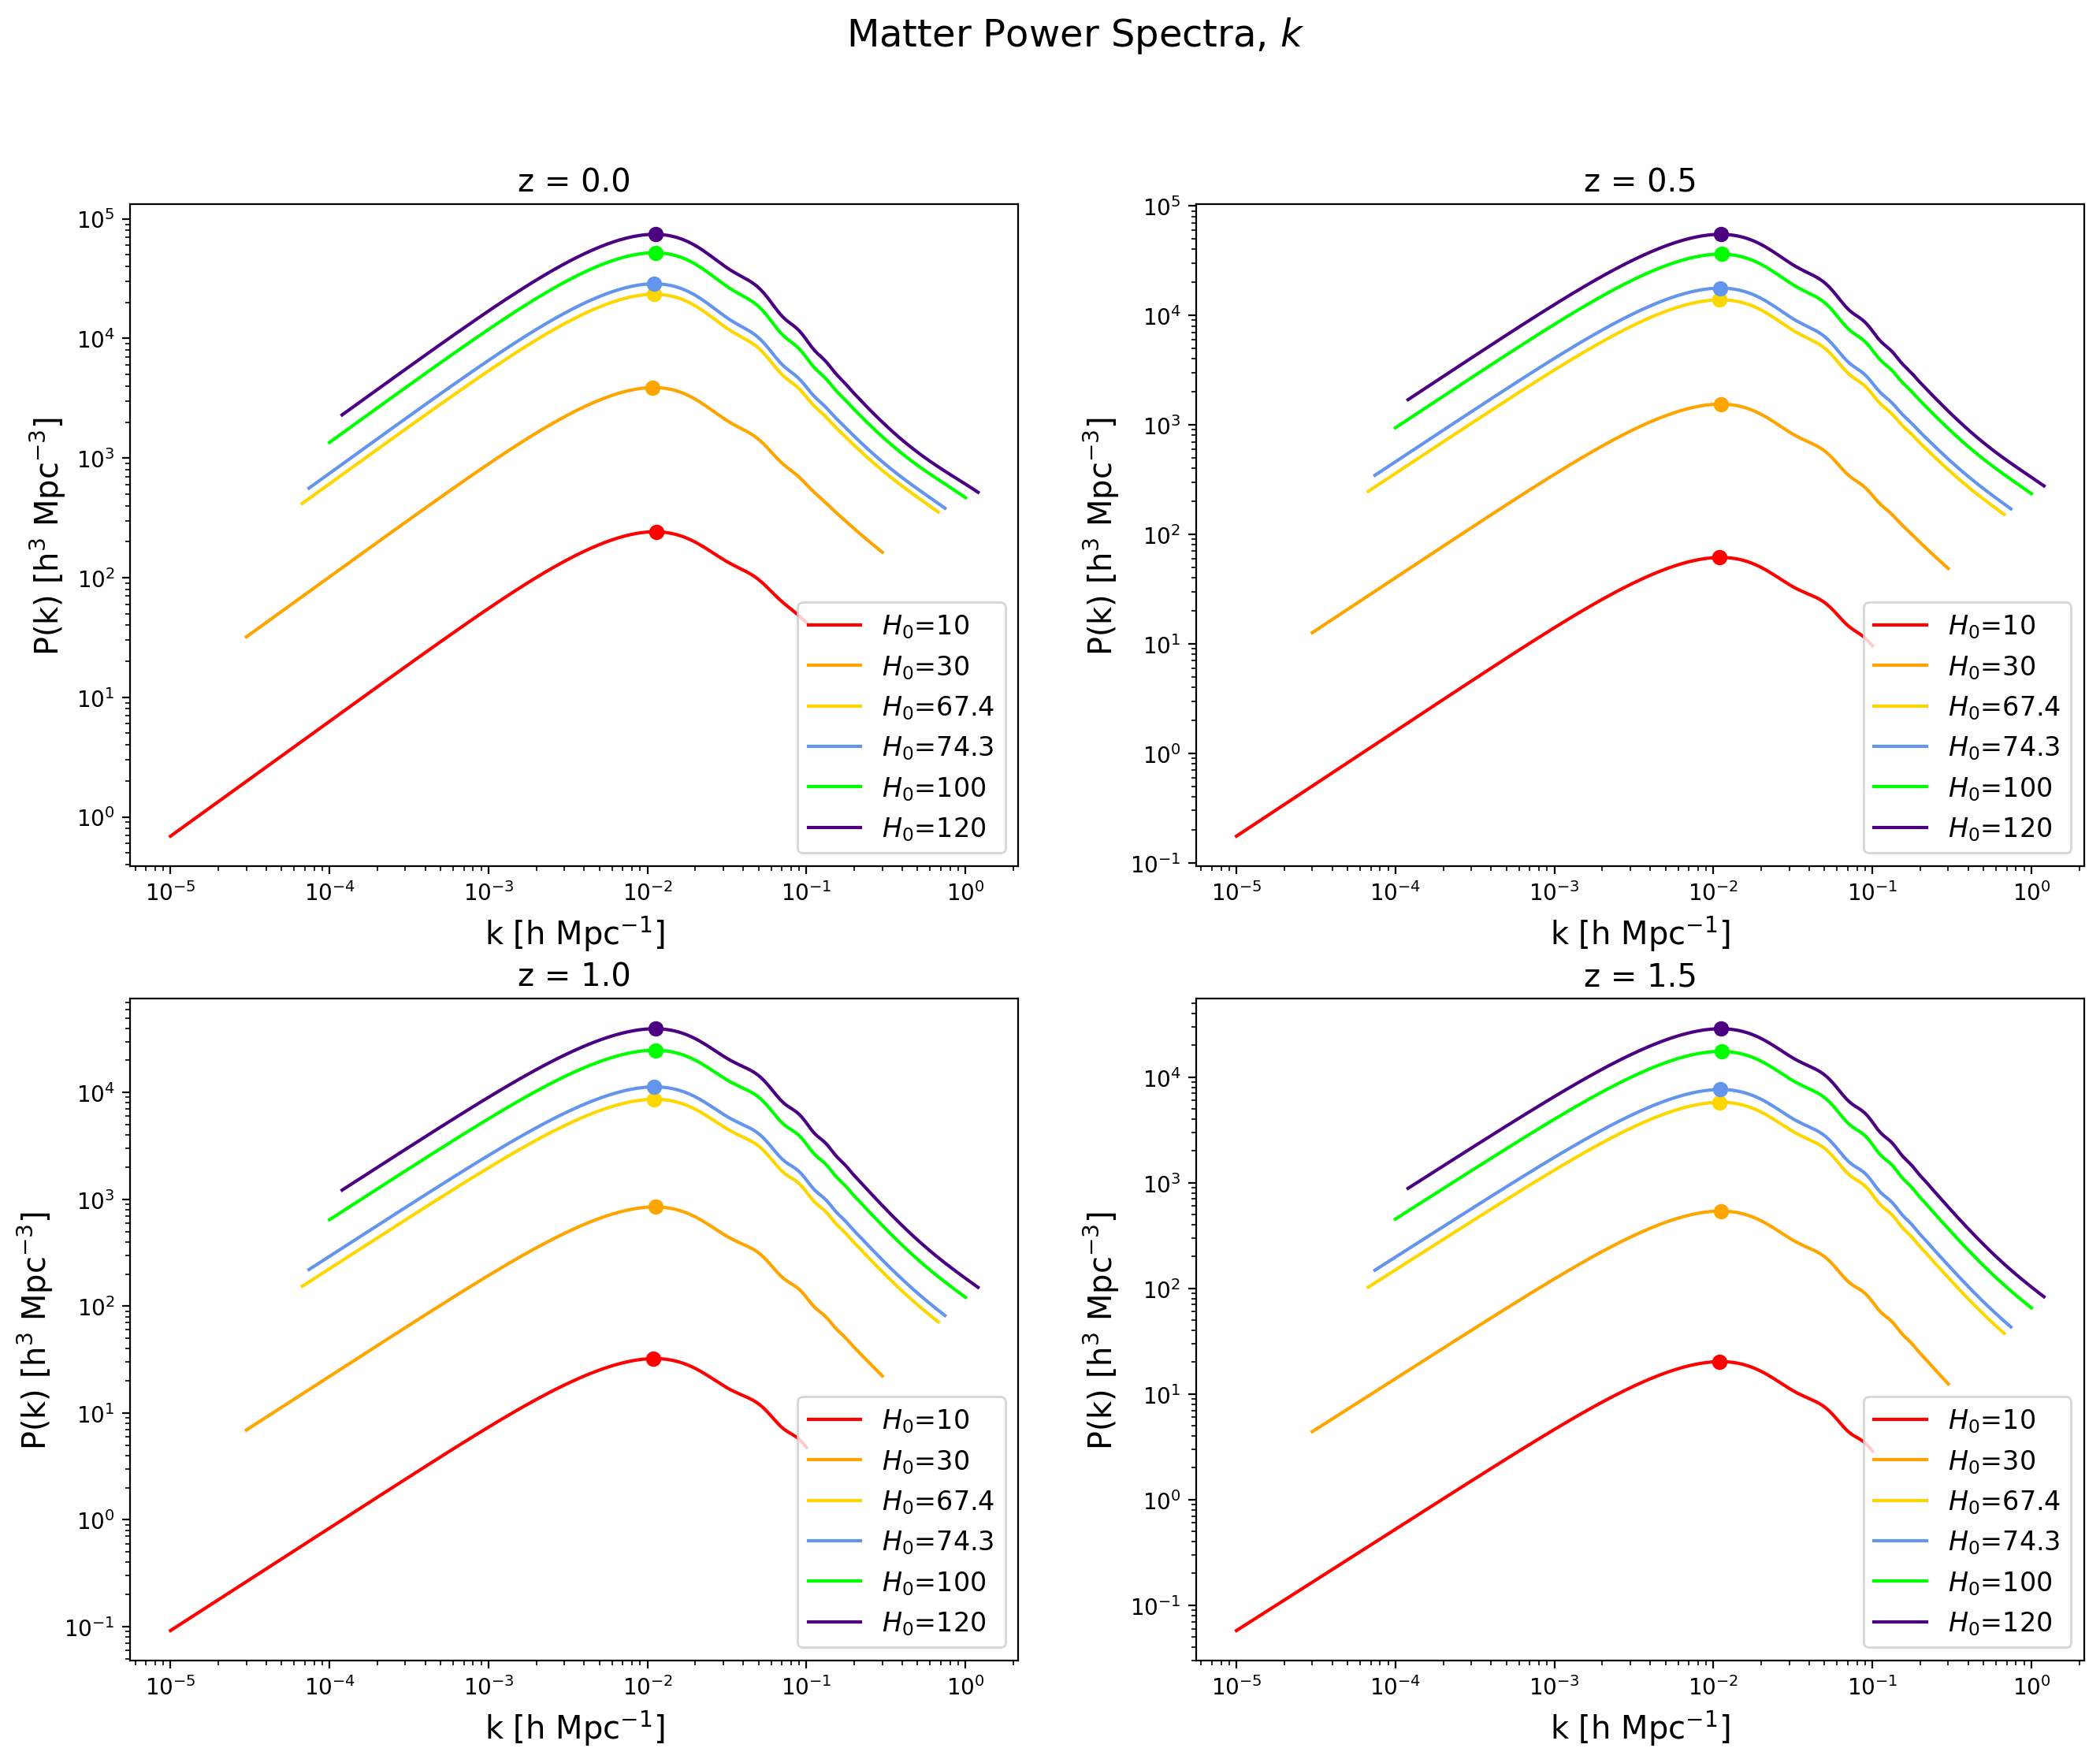

In [9]:
# Comparing power spectra with the factor of h restored on the x-axis

fig, ax = plt.subplots(2,2, figsize=(16,12))
fig.suptitle('Matter Power Spectra, $k$', fontsize='xx-large')
#list of parameter values and their respective colors to be plotted, in the form [param, non-linear color]
first_peak_pos = [[],[],[],[]]
vals_and_colors = np.array([[10, 'red'],[30, 'orange'],[67.4, 'gold'],[74.3, 'cornflowerblue'], [100, 'lime'], [120, 'indigo']])
for i in vals_and_colors:
    H = float(i[0])
    pars = camb.CAMBparams()
    pars.set_cosmology(H0= H)
    pars.set_matter_power(redshifts=[0., .5, 1, 1.5], kmax=2.0)

    #Non-Linear spectra (Halofit)
    pars.NonLinear = model.NonLinear_both
    results = camb.get_results(pars)
    results.calc_power_spectra(pars)
    kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

    for j, (redshift, line) in enumerate(zip(z_nonlin,['-','-', '-', '-'])):
        ax[min(1,j-j%2),j%2].loglog(kh_nonlin*H/100, pk_nonlin[j,:], color=i[1], ls = '-', label = '$H_0$='+i[0])
        ax[min(1,j-j%2),j%2].set_title('z = '+str(redshift), fontsize='x-large')
        maxima = get_maxima(pk_nonlin[j,:], criteria=3)
        first_peak_pos[j].append(redshift)
        #It looks like get_matter_power_interpolator has an option to get results in units of k instead of k/h,
        #while get_matter_power_spectrum does not, so we just restore the factor of h manually here.
        first_peak_pos[j].append(kh_nonlin[int(maxima[0,1])]*H/100)
        ax[min(1,j-j%2),j%2].scatter(kh_nonlin[int(maxima[0,1])]*H/100, maxima[0,0], color = i[1])
        
    #plt.title('Matter power at z=%s and z= %s'%tuple(z))


for axl in np.array(ax).flatten():
    axl.legend(fontsize='large')
    axl.set_xlabel('k [h Mpc$^{-1}$]', fontsize='x-large')
    axl.set_ylabel('P(k) [h$^3$ Mpc$^{-3}$]', fontsize='x-large')
plt.show()

In [10]:
#np.savetxt('MatterPowerMaximaPos.csv', np.array(first_peak_pos), delimiter=',')

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


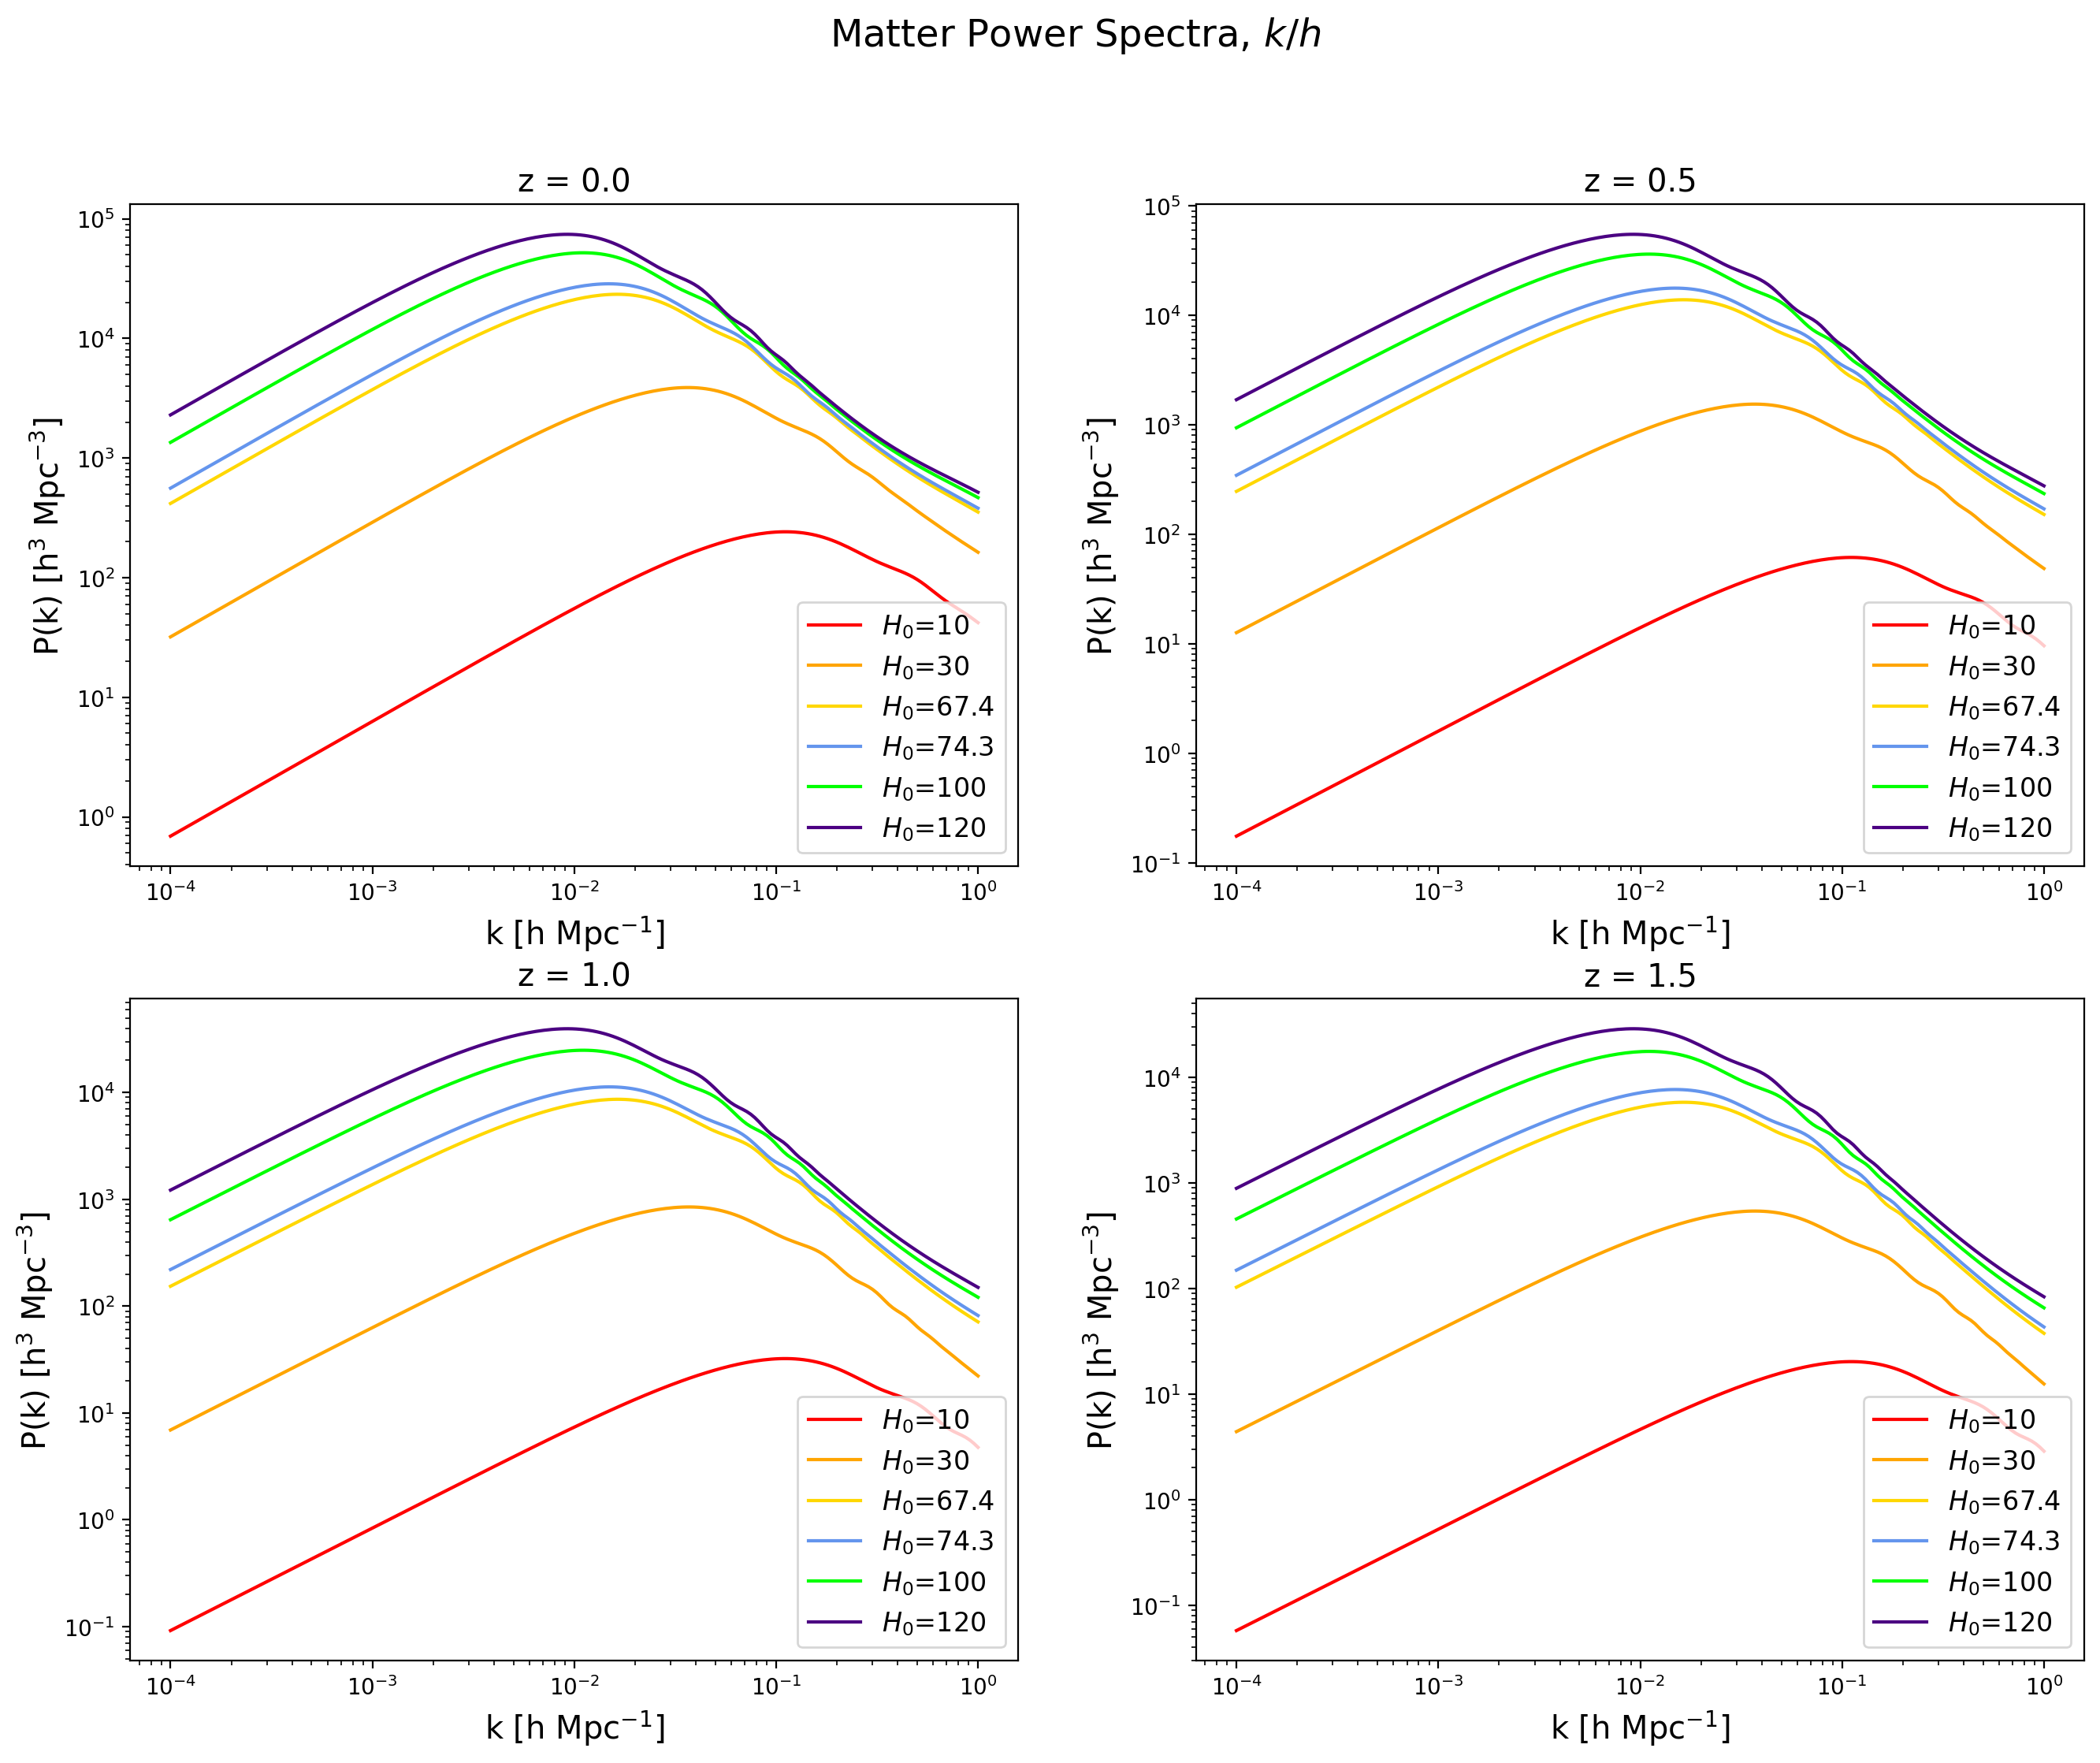

In [11]:
# Power spectra w/ k/h x-axis at various z values

fig, ax = plt.subplots(2,2, figsize=(16,12))
fig.suptitle('Matter Power Spectra, $k/h$', fontsize='xx-large')
#list of parameter values and their respective colors to be plotted, in the form [param, non-linear color]
vals_and_colors = np.array([[10, 'red'],[30, 'orange'],[67.4, 'gold'],[74.3, 'cornflowerblue'], [100, 'lime'], [120, 'indigo']])
for i in vals_and_colors:
    H = float(i[0])
    pars = camb.CAMBparams()
    pars.set_cosmology(H0= H)
    pars.set_matter_power(redshifts=[0., .5, 1, 1.5], kmax=2.0)

    #Non-Linear spectra (Halofit)
    pars.NonLinear = model.NonLinear_both
    results = camb.get_results(pars)
    results.calc_power_spectra(pars)
    kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

    for j, (redshift, line) in enumerate(zip(z_nonlin,['-','-', '-', '-'])):
        ax[min(1,j-j%2),j%2].loglog(kh_nonlin, pk_nonlin[j,:], color=i[1], ls = '-', label = '$H_0$='+i[0])
        ax[min(1,j-j%2), j%2].set_title('z = '+str(redshift), fontsize='x-large')
        
    #plt.title('Matter power at z=%s and z= %s'%tuple(z))


for axl in np.array(ax).flatten():
    axl.legend(fontsize='large')
    axl.set_xlabel('k [h Mpc$^{-1}$]', fontsize='x-large')
    axl.set_ylabel('P(k) [h$^3$ Mpc$^{-3}$]', fontsize='x-large')
plt.show()

Text(0, 0.5, '$\\frac{P(k)\\vert_{H_0=67.001}-P(k)\\vert_{H_0=67}}{P(k)\\vert_{H_0=67.001}}$')

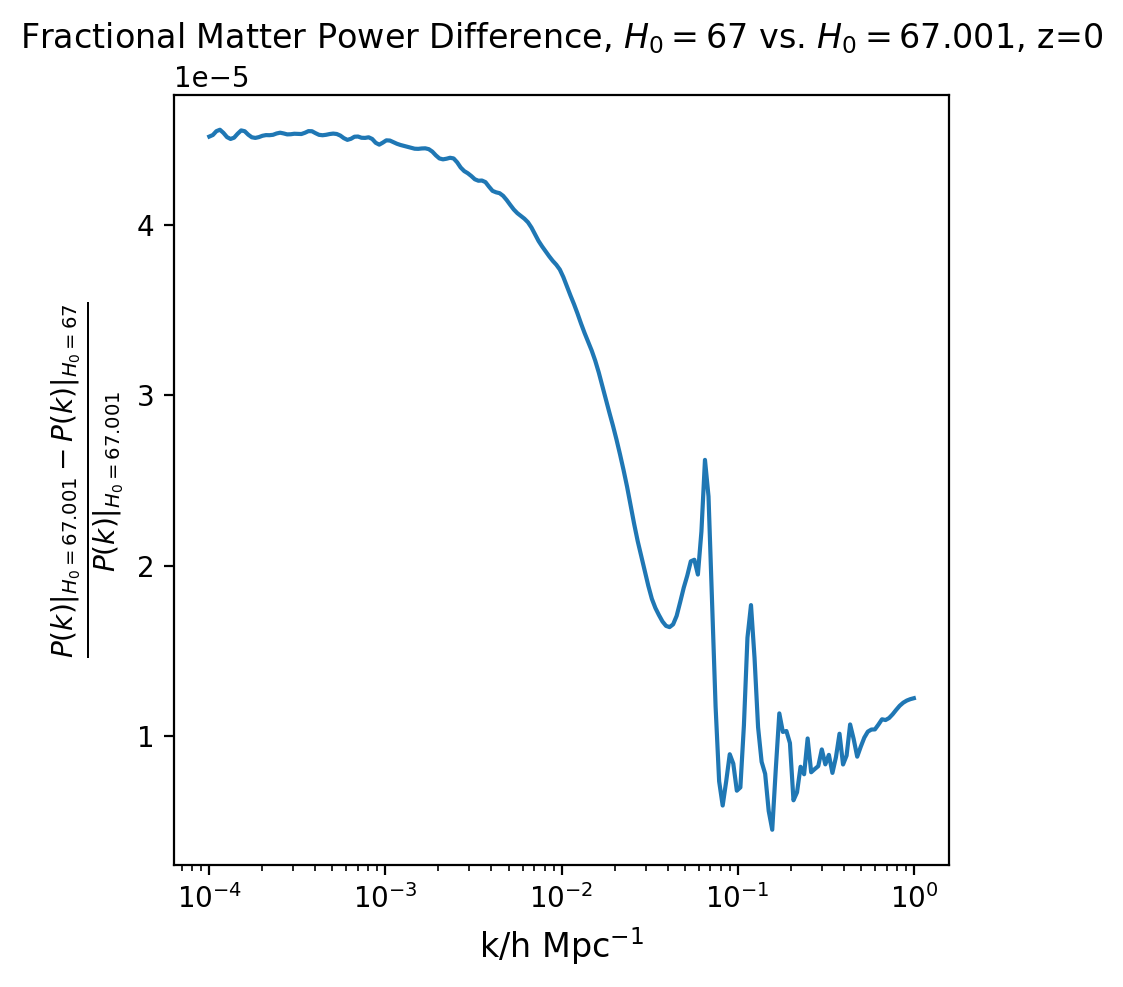

In [12]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.set_title('Fractional Matter Power Difference, $H_0=67$ vs. $H_0=67.001$, z=0')

H = 67
pars = camb.CAMBparams()
pars.set_cosmology(H0= H)
pars.set_matter_power(redshifts=[0], kmax=2.0)

#Non-Linear spectra (Halofit)
pars.NonLinear = model.NonLinear_both
results = camb.get_results(pars)
results.calc_power_spectra(pars)
kh_nonlin, z_nonlin, pk_nonlin_smaller = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

H = 67.001
pars = camb.CAMBparams()
pars.set_cosmology(H0= H)
pars.set_matter_power(redshifts=[0], kmax=2.0)

#Non-Linear spectra (Halofit)
pars.NonLinear = model.NonLinear_both
results = camb.get_results(pars)
results.calc_power_spectra(pars)
kh_nonlin, z_nonlin, pk_nonlin_bigger = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

ax.semilogx(kh_nonlin, 1-pk_nonlin_smaller[0,:]/pk_nonlin_bigger[0,:], ls = '-', label = '$H_0$='+i[0])

ax.set_xlabel('k/h Mpc$^{-1}$', fontsize='large')
ax.set_ylabel(r'$\frac{P(k)\vert_{H_0=67.001}-P(k)\vert_{H_0=67}}{P(k)\vert_{H_0=67.001}}$', fontsize='x-large')

# Varying $\Omega_ch^2$

## CMB Power Spectra

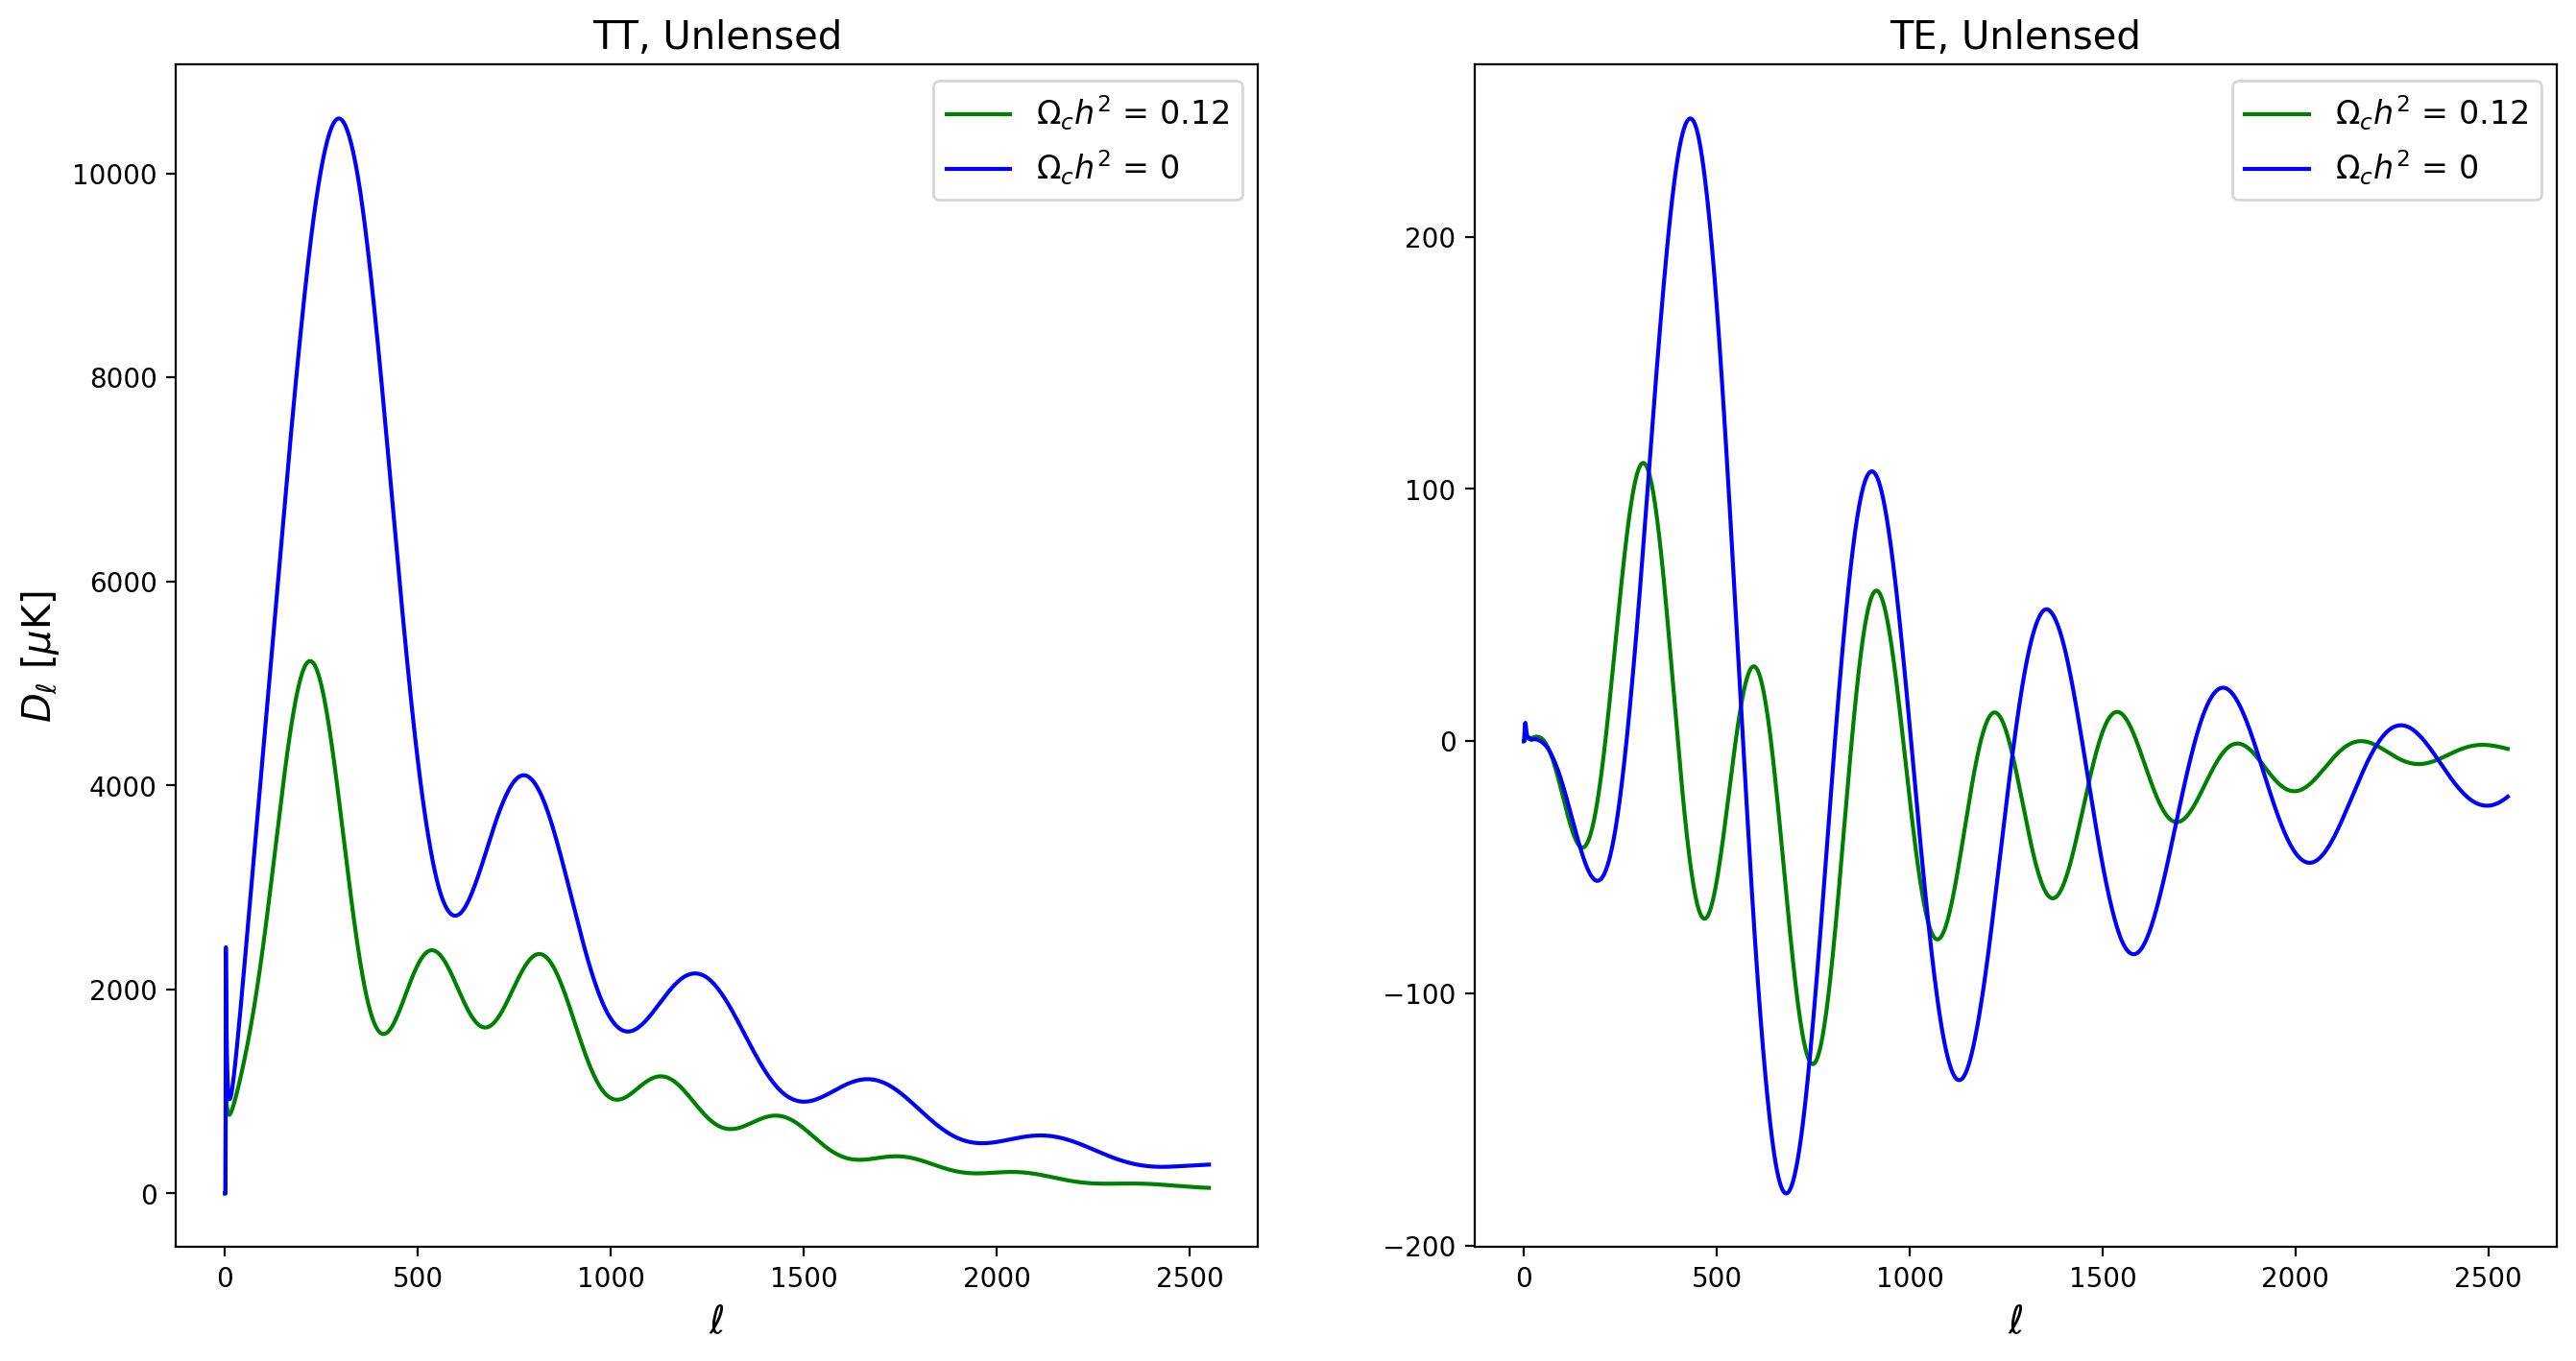

In [13]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].set_title('TT, Unlensed', fontsize='x-large')
ax[1].set_title('TE, Unlensed', fontsize='x-large')
#list of parameter values and their respective colors to be plotted, in the form [param, unlensed color, lensed color]
#vals_and_colors = np.array([[0, 'red', 'darkred'],[.1, 'orange', 'darkorange'],[.12, 'green', 'darkgreen'], [.14, 'blue', 'darkblue']])
vals_and_colors = np.array([[.12, 'green', 'darkgreen'], [0, 'blue', 'darkblue']])
for i in vals_and_colors:
    omch2 = float(i[0])
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=67, omch2=omch2)
    pars.set_for_lmax(2500, lens_potential_accuracy=0)
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')

    unlensedCL=powers['unlensed_scalar']
    lensedCL = powers['lensed_scalar']
    ls = np.arange(unlensedCL.shape[0])
    ax[0].plot(ls, unlensedCL[:,0], color=i[1], label=r'$\Omega_ch^2$ = ' +i[0])
    #ax[0].plot(ls, lensedCL[:,0] , color=i[2], label ='Lensed, H_0 = ' +str(i[0]))

    ax[1].plot(ls, unlensedCL[:,3], color=i[1], label=r'$\Omega_ch^2$ = ' +i[0])
    #ax[1].plot(ls, lensedCL[:,3] , color=i[2], label ='Lensed, H_0 = ' +str(i[0]))
    
    ax[1].plot()
for axl in np.array(ax).flatten():
    axl.legend(fontsize='large')
    axl.set_xlabel('$\ell$', fontsize='x-large')
ax[0].set_ylabel('$D_\ell$ [$\mu$K]', fontsize='x-large')
plt.show()

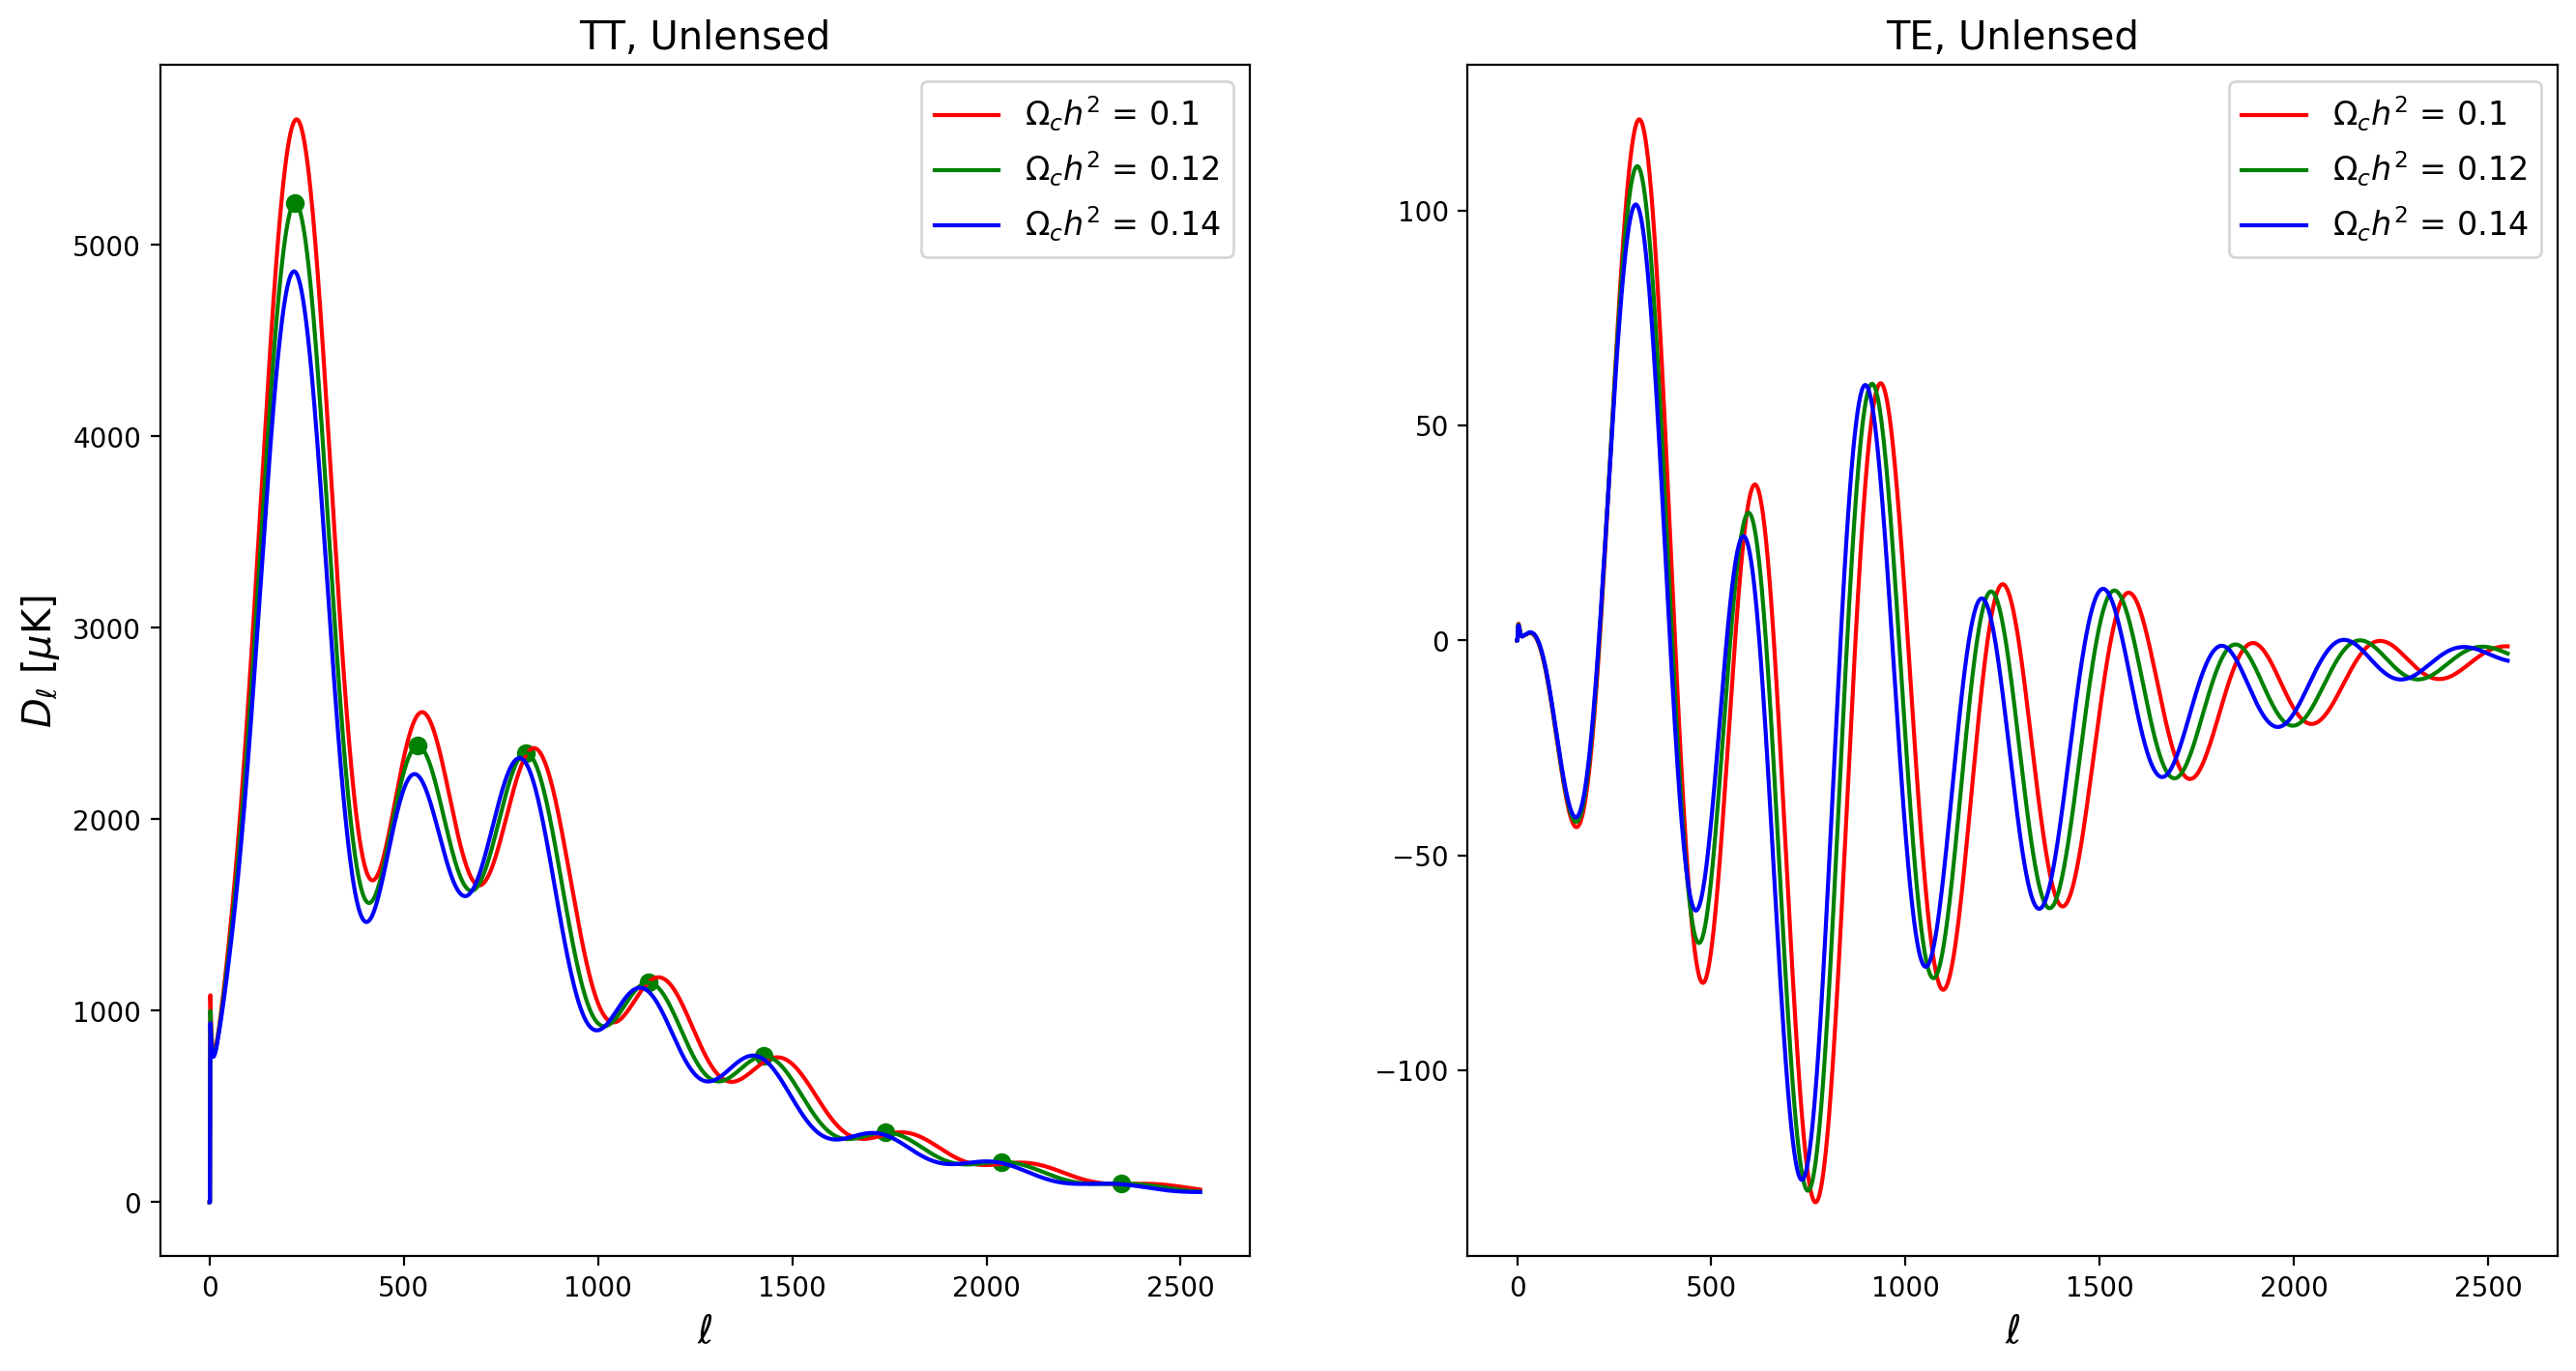

[[5219.55185149  220.        ]
 [2384.32345004  536.        ]
 [2347.54407266  814.        ]
 [1148.23957974 1129.        ]
 [ 763.14638743 1427.        ]
 [ 364.47287608 1739.        ]
 [ 210.76245084 2038.        ]
 [  97.3814993  2347.        ]]


In [14]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].set_title('TT, Unlensed', fontsize='x-large')
ax[1].set_title('TE, Unlensed', fontsize='x-large')
#list of parameter values and their respective colors to be plotted, in the form [param, unlensed color, lensed color]
#vals_and_colors = np.array([[0, 'red', 'darkred'],[.1, 'orange', 'darkorange'],[.12, 'green', 'darkgreen'], [.14, 'blue', 'darkblue']])
vals_and_colors = np.array([[.10, 'red', 'darkred'],[.12, 'green', 'darkgreen'], [.14, 'blue', 'darkblue']])
maxima = None
for i in vals_and_colors:
    param = float(i[0])
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=67, omch2=param)
    pars.set_for_lmax(2500, lens_potential_accuracy=0)
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')

    unlensedCL=powers['unlensed_scalar']
    lensedCL = powers['lensed_scalar']
    ls = np.arange(unlensedCL.shape[0])
    ax[0].plot(ls, unlensedCL[:,0], color=i[1], label=r'$\Omega_ch^2$ = ' +i[0])
    if param==.12:
        maxima = get_maxima(unlensedCL[:,0], criteria = 5)
        ax[0].scatter(maxima[:,1], maxima[:,0], color='green')
    #ax[0].plot(ls, lensedCL[:,0] , color=i[2], label ='Lensed, H_0 = ' +str(i[0]))

    ax[1].plot(ls, unlensedCL[:,3], color=i[1], label=r'$\Omega_ch^2$ = ' +i[0])
    #ax[1].plot(ls, lensedCL[:,3] , color=i[2], label ='Lensed, H_0 = ' +str(i[0]))
    
    ax[1].plot()
for axl in np.array(ax).flatten():
    axl.legend(fontsize='large')
    axl.set_xlabel('$\ell$', fontsize='x-large')
ax[0].set_ylabel('$D_\ell$ [$\mu$K]', fontsize='x-large')
plt.show()
print(maxima)

In [15]:
print((1-2347.54407266/2384.32345004)*100)

1.5425498322965692


## Matter Power Spectra

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


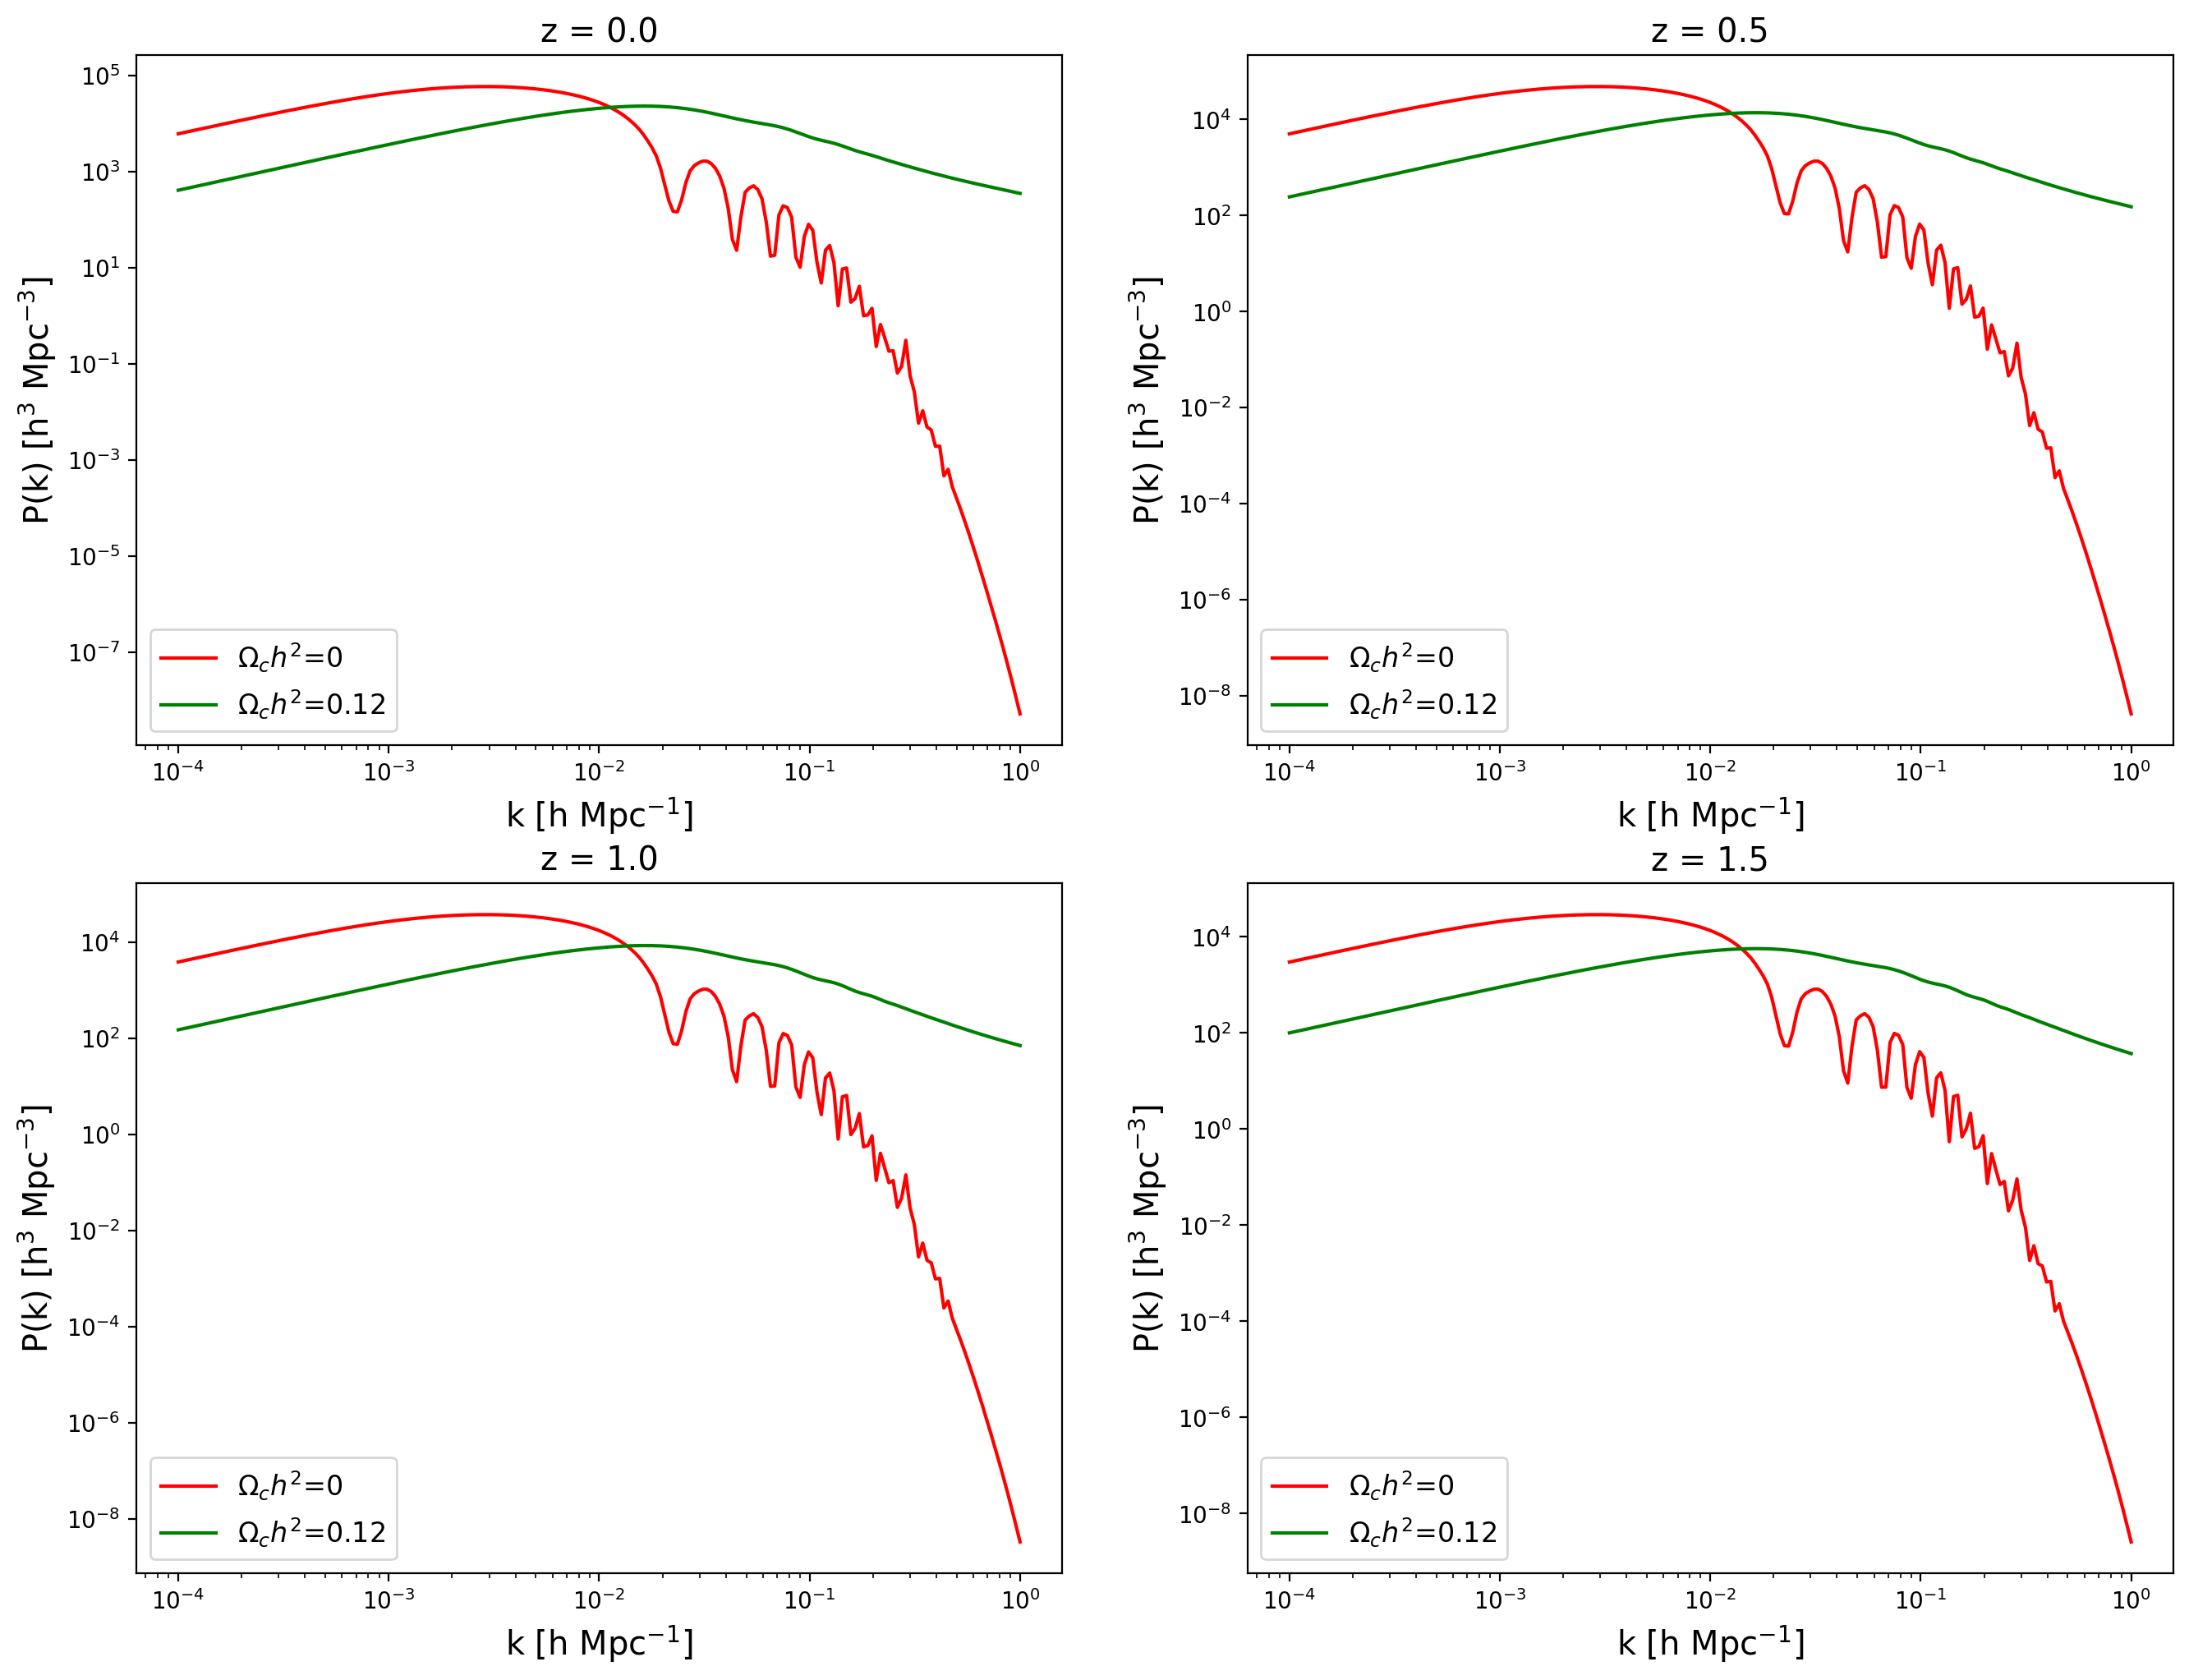

In [16]:
# Power spectra w/ k/h x-axis at various z values

fig, ax = plt.subplots(2,2, figsize=(16,12))
#list of parameter values and their respective colors to be plotted, in the form [param, non-linear color]
vals_and_colors = np.array([[0, 'red', 'darkred'],[.12, 'green', 'darkgreen']])
for i in vals_and_colors:
    param = float(i[0])
    pars = camb.CAMBparams()
    pars.set_cosmology(H0 = 67, omch2 = param)
    pars.set_matter_power(redshifts=[0., .5, 1, 1.5], kmax=2.0)

    #Non-Linear spectra (Halofit)
    pars.NonLinear = model.NonLinear_both
    results = camb.get_results(pars)
    results.calc_power_spectra(pars)
    kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

    for j, (redshift, line) in enumerate(zip(z_nonlin,['-','-', '-', '-'])):
        ax[min(1,j-j%2),j%2].loglog(kh_nonlin, pk_nonlin[j,:], color=i[1], ls = '-', label = r'$\Omega_ch^2$='+i[0])
        ax[min(1,j-j%2), j%2].set_title('z = '+str(redshift), fontsize='x-large')
        
    #plt.title('Matter power at z=%s and z= %s'%tuple(z))


for axl in np.array(ax).flatten():
    axl.legend(fontsize='large')
    axl.set_xlabel('k [h Mpc$^{-1}$]', fontsize='x-large')
    axl.set_ylabel('P(k) [h$^3$ Mpc$^{-3}$]', fontsize='x-large')
plt.show()

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


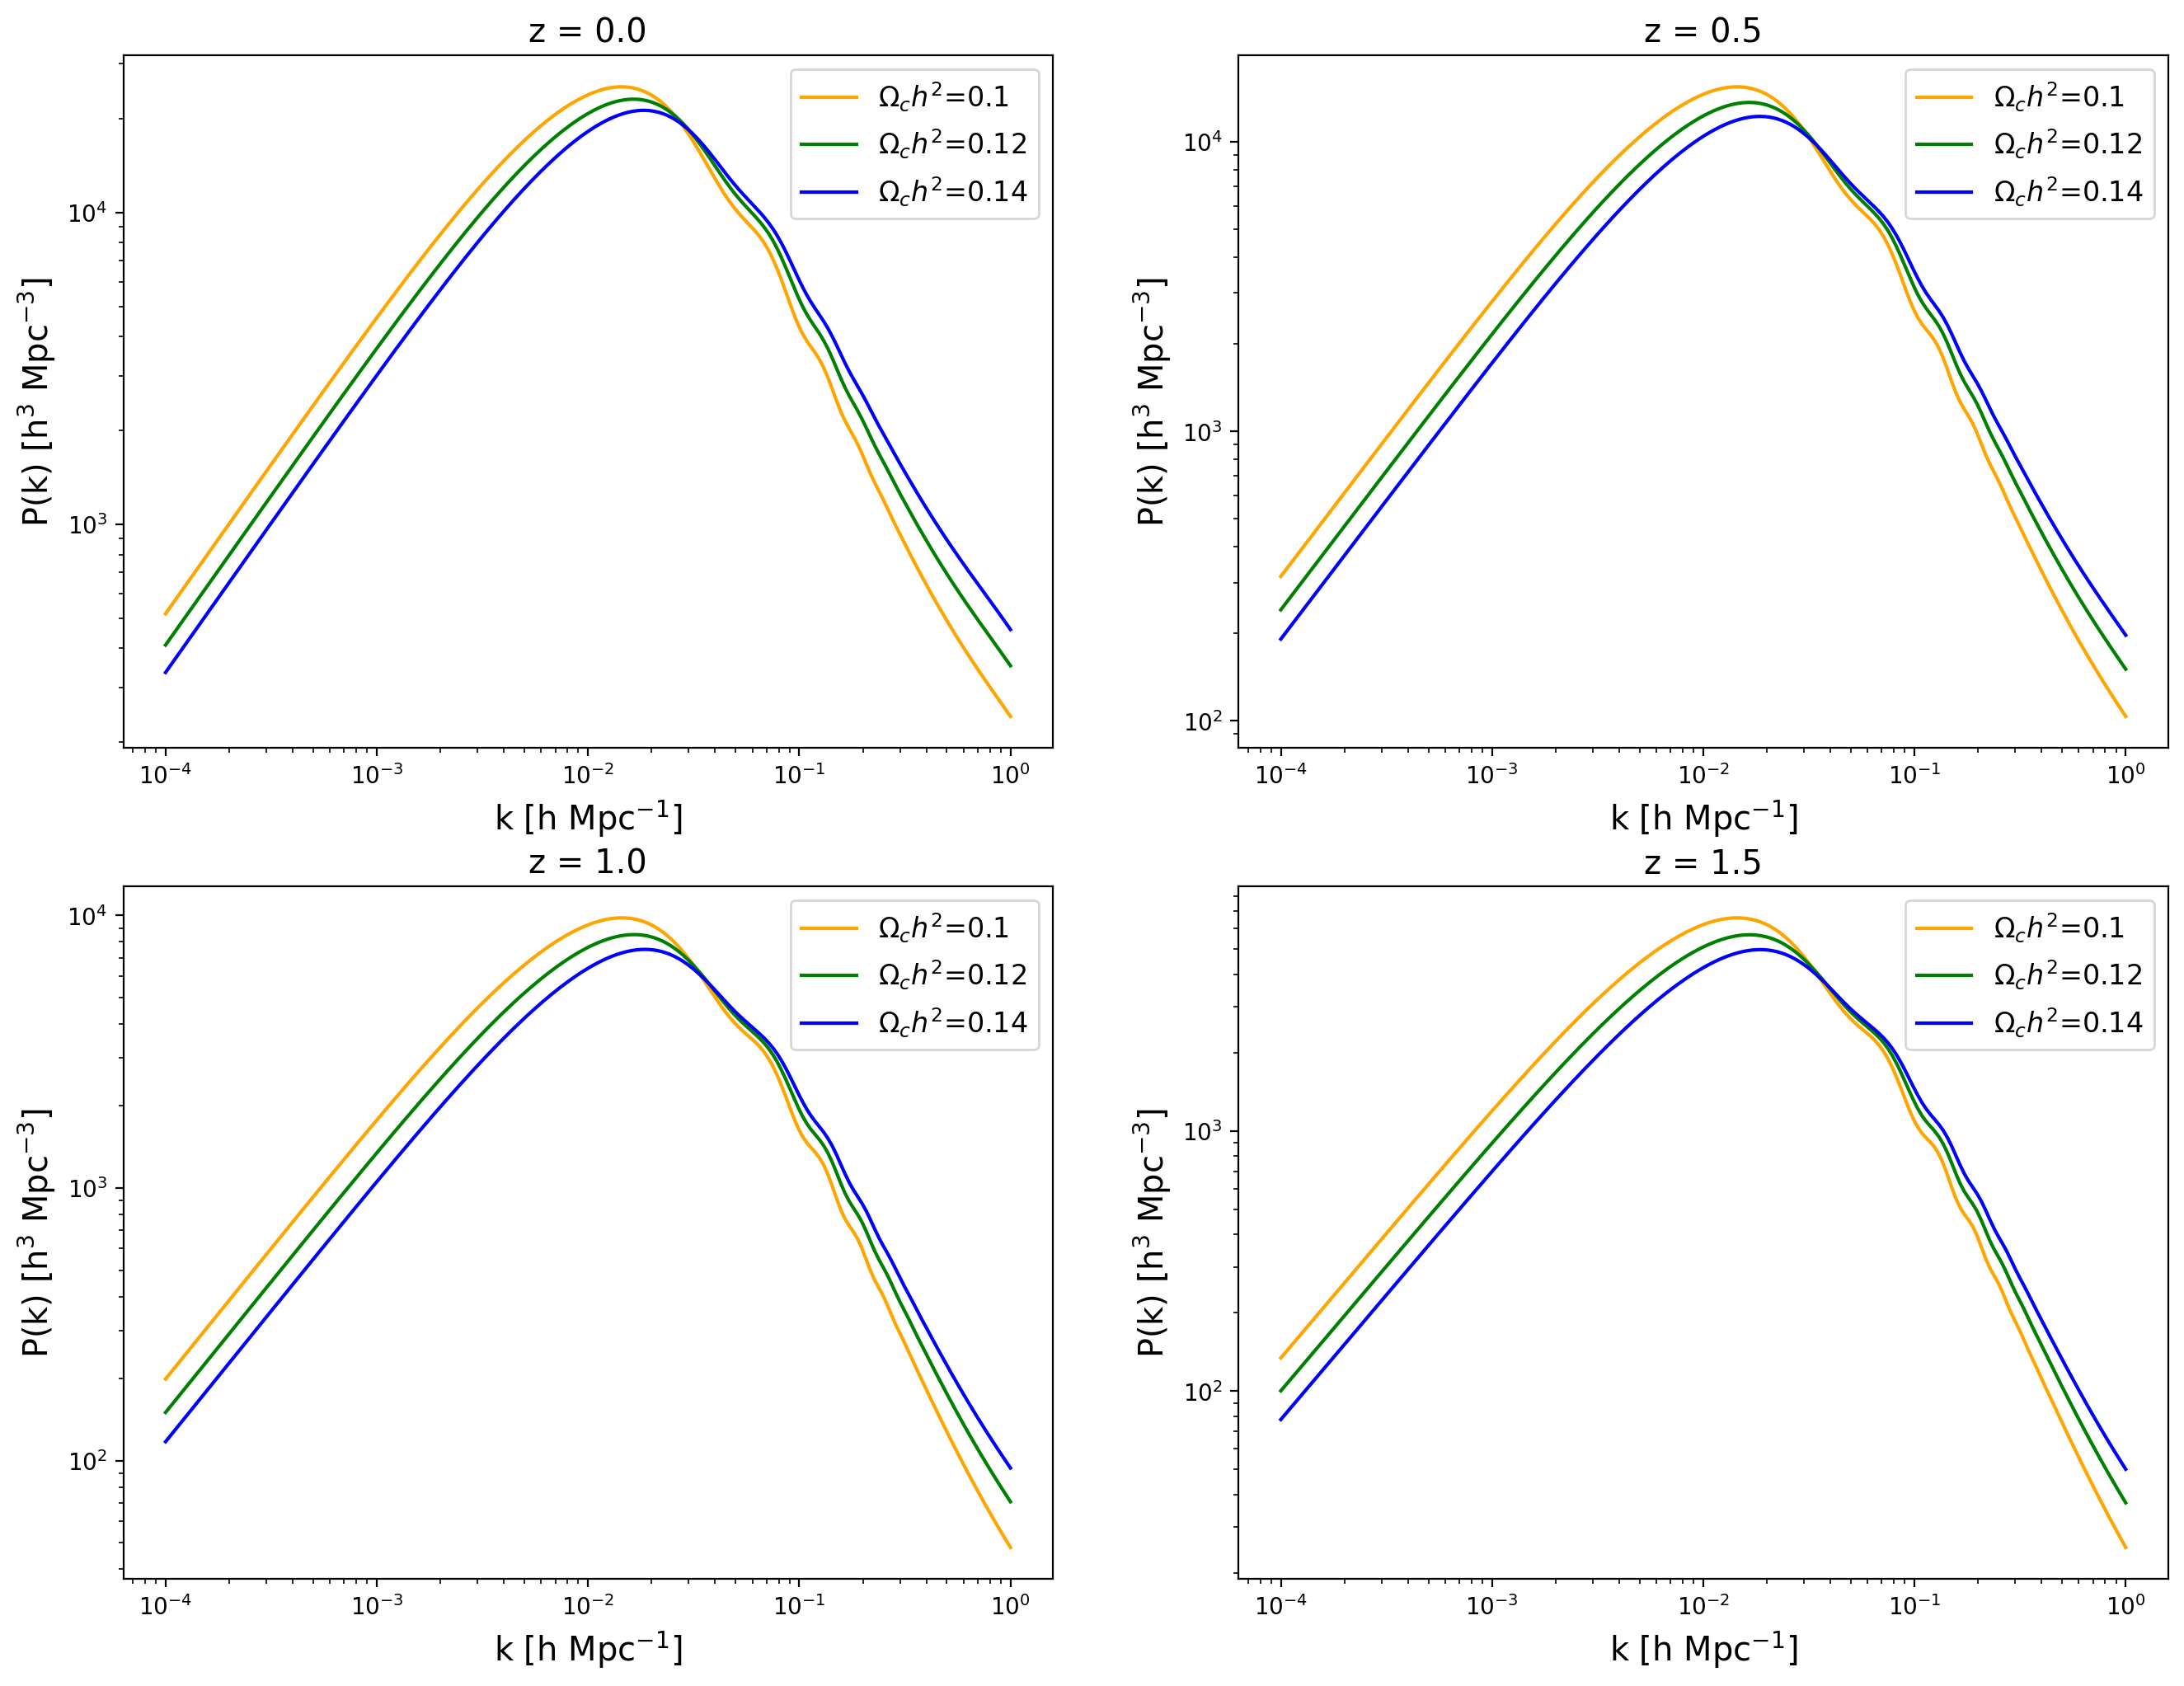

In [17]:
# Matter power spectra w/ k/h x-axis at various z values

fig, ax = plt.subplots(2,2, figsize=(16,12))
#list of parameter values and their respective colors to be plotted, in the form [param, non-linear color]
vals_and_colors = np.array([[.1, 'orange', 'darkorange'],[.12, 'green', 'darkgreen'], [.14, 'blue', 'darkblue']])
for i in vals_and_colors:
    param = float(i[0])
    pars = camb.CAMBparams()
    pars.set_cosmology(H0 = 67, omch2 = param)
    pars.set_matter_power(redshifts=[0., .5, 1, 1.5], kmax=2.0)

    #Non-Linear spectra (Halofit)
    pars.NonLinear = model.NonLinear_both
    results = camb.get_results(pars)
    results.calc_power_spectra(pars)
    kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

    for j, (redshift, line) in enumerate(zip(z_nonlin,['-','-', '-', '-'])):
        ax[min(1,j-j%2),j%2].loglog(kh_nonlin, pk_nonlin[j,:], color=i[1], ls = '-', label = r'$\Omega_ch^2$='+i[0])
        ax[min(1,j-j%2), j%2].set_title('z = '+str(redshift), fontsize='x-large')
        
    #plt.title('Matter power at z=%s and z= %s'%tuple(z))


for axl in np.array(ax).flatten():
    axl.legend(fontsize='large')
    axl.set_xlabel('k [h Mpc$^{-1}$]', fontsize='x-large')
    axl.set_ylabel('P(k) [h$^3$ Mpc$^{-3}$]', fontsize='x-large')
plt.show()

# Varying $\Omega_bh^2$

## CMB Power Spectra

In [18]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=67)
print(pars.ombh2)

0.022


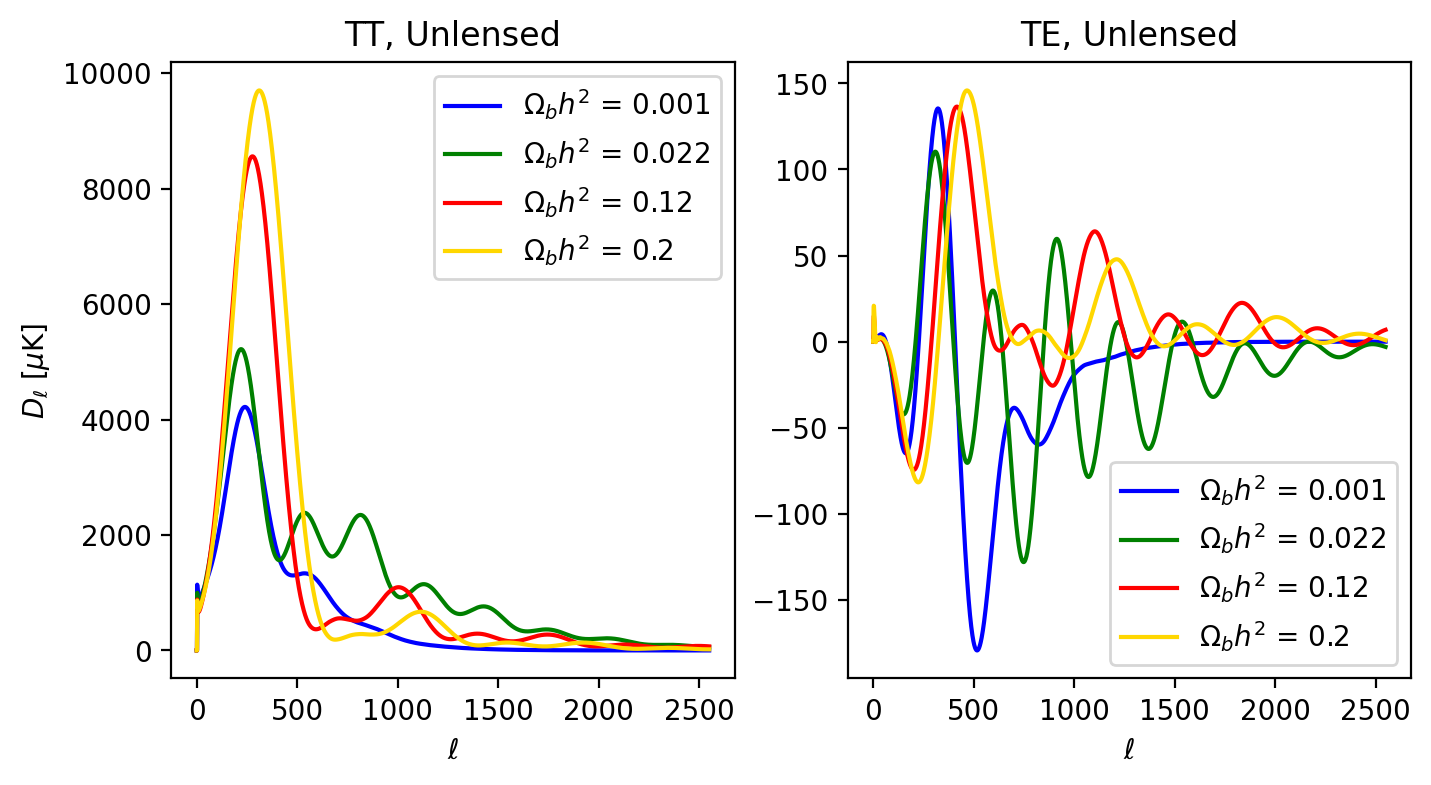

In [19]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].set_title('TT, Unlensed')
ax[1].set_title('TE, Unlensed')
#list of parameter values and their respective colors to be plotted, in the form [param, unlensed color, lensed color]
vals_and_colors = np.array([[.001, 'blue', 'darkblue'], [.022, 'green', 'darkgreen'], [.12, 'red','darkred'], [.2, 'gold', 'yellow']])
for i in vals_and_colors:
    param = float(i[0])
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=67, ombh2=param)
    pars.set_for_lmax(2500, lens_potential_accuracy=0)
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')

    unlensedCL=powers['unlensed_scalar']
    lensedCL = powers['lensed_scalar']
    ls = np.arange(unlensedCL.shape[0])
    ax[0].plot(ls, unlensedCL[:,0], color=i[1], label=r'$\Omega_bh^2$ = ' +i[0])
    #ax[0].plot(ls, lensedCL[:,0] , color=i[2], label ='Lensed, H_0 = ' +str(i[0]))

    ax[1].plot(ls, unlensedCL[:,3], color=i[1], label=r'$\Omega_bh^2$ = ' +i[0])
    #ax[1].plot(ls, lensedCL[:,3] , color=i[2], label ='Lensed, H_0 = ' +str(i[0]))
    
    ax[1].plot()
for axl in np.array(ax).flatten():
    axl.legend()
    axl.set_xlabel('$\ell$')
ax[0].set_ylabel('$D_\ell$ [$\mu$K]')
plt.show()

Note: For very small $\Omega_bh^2$ (i.e. .0001), `calc_power_spectrum` fails to run, `calc_transfers` throws error "ThemoData Init: failed to find end of recombination". Additionally, `get_results` throws some error when $\Omega_bh^2=0.$

## Matter Power Spectra

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


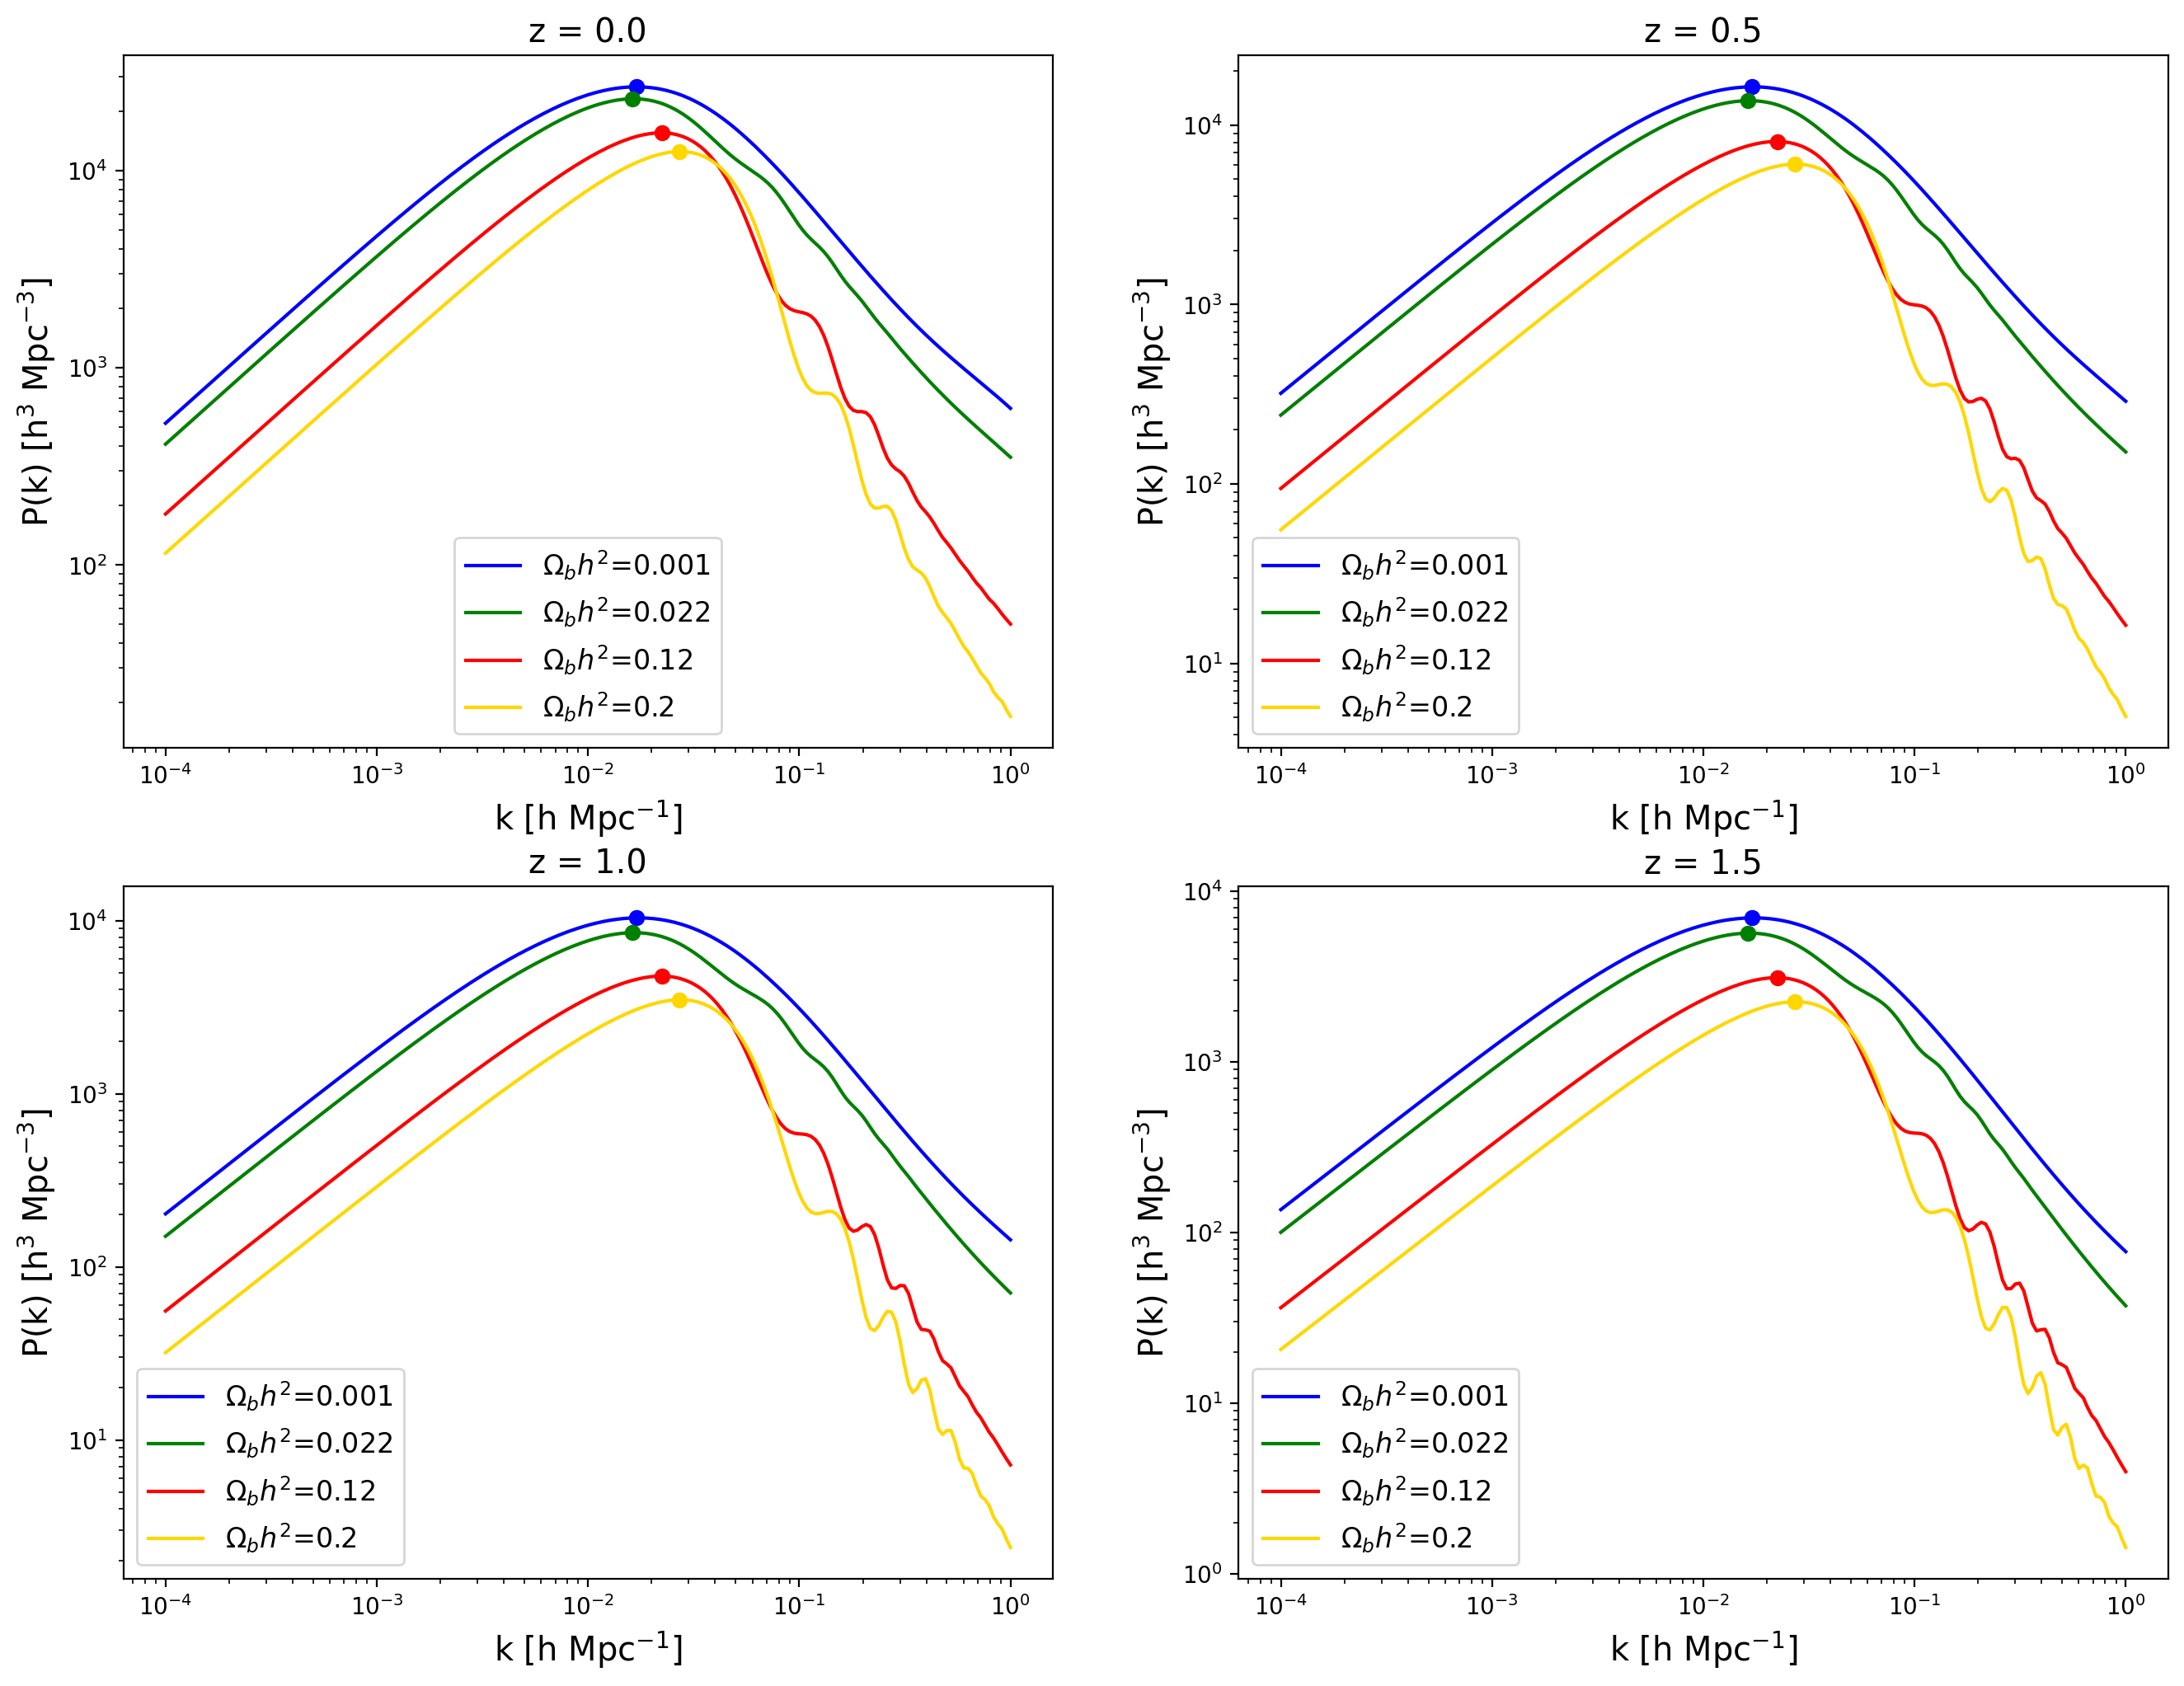

In [20]:
# Matter power spectra w/ k/h x-axis at various z values

fig, ax = plt.subplots(2,2, figsize=(16,12))
#list of parameter values and their respective colors to be plotted, in the form [param, non-linear color]
vals_and_colors = np.array([[.001, 'blue', 'darkblue'], [.022, 'green', 'darkgreen'], [.12, 'red','darkred'], [.2, 'gold', 'yellow']])
first_peak_pos = [[],[],[],[]]
for i in vals_and_colors:
    param = float(i[0])
    pars = camb.CAMBparams()
    pars.set_cosmology(H0 = 67, ombh2 = param)
    pars.set_matter_power(redshifts=[0., .5, 1, 1.5], kmax=2.0)

    #Non-Linear spectra (Halofit)
    pars.NonLinear = model.NonLinear_both
    results = camb.get_results(pars)
    results.calc_power_spectra(pars)
    kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

    for j, (redshift, line) in enumerate(zip(z_nonlin,['-','-', '-', '-'])):
        ax[min(1,j-j%2),j%2].loglog(kh_nonlin, pk_nonlin[j,:], color=i[1], ls = '-', label = r'$\Omega_bh^2$='+i[0])
        ax[min(1,j-j%2), j%2].set_title('z = '+str(redshift), fontsize='x-large')
        maxima = get_maxima(pk_nonlin[j,:], criteria=3)
        first_peak_pos[j].append(redshift)
        #It looks like get_matter_power_interpolator has an option to get results in units of k instead of k/h,
        #while get_matter_power_spectrum does not, so we just restore the factor of h manually here.
        first_peak_pos[j].append(kh_nonlin[int(maxima[0,1])])
        ax[min(1,j-j%2),j%2].scatter(kh_nonlin[int(maxima[0,1])], maxima[0,0], color = i[1])
        
    #plt.title('Matter power at z=%s and z= %s'%tuple(z))


for axl in np.array(ax).flatten():
    axl.legend(fontsize='large')
    axl.set_xlabel('k [h Mpc$^{-1}$]', fontsize='x-large')
    axl.set_ylabel('P(k) [h$^3$ Mpc$^{-3}$]', fontsize='x-large')
plt.show()

# Varying $\Omega_k$

## CMB Power Spectra

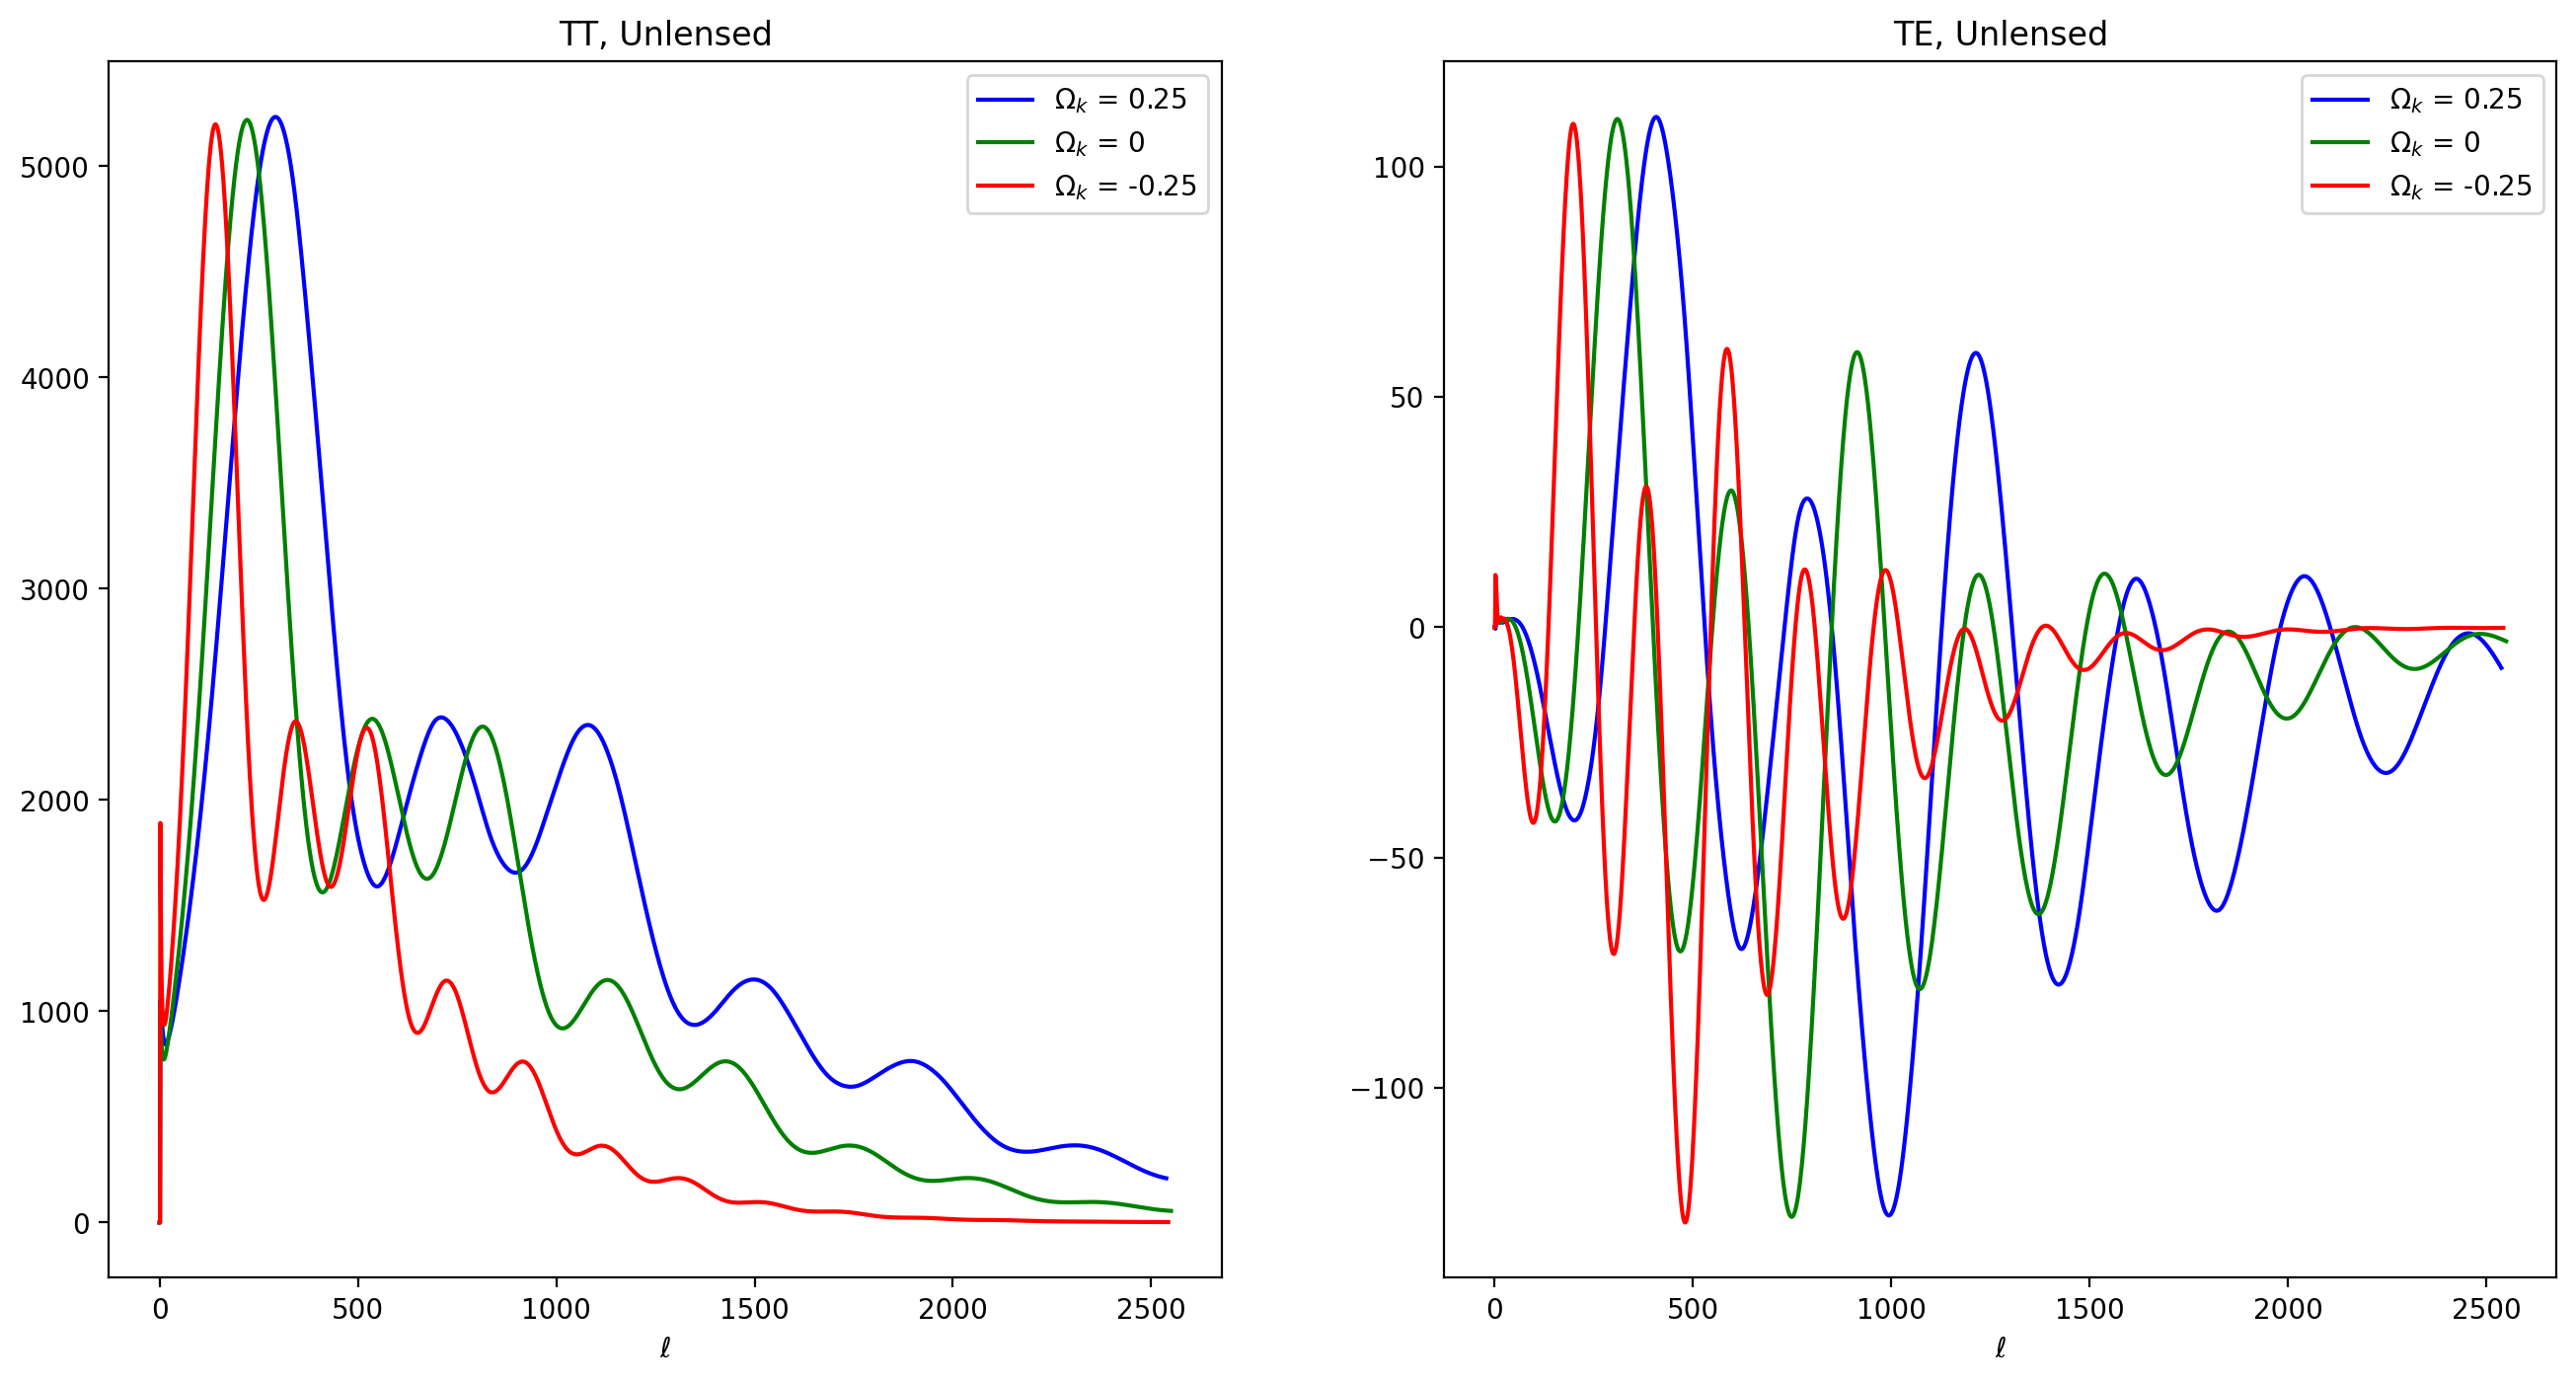

In [21]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].set_title('TT, Unlensed')
ax[1].set_title('TE, Unlensed')
#list of parameter values and their respective colors to be plotted, in the form [param, unlensed color, lensed color]
vals_and_colors = np.array([[0.25, 'blue', 'darkblue'], [0, 'green', 'darkgreen'], [-.25, 'red','darkred']])
for i in vals_and_colors:
    param = float(i[0])
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=67, omk=param)
    pars.set_for_lmax(2500, lens_potential_accuracy=0)
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')

    unlensedCL=powers['unlensed_scalar']
    lensedCL = powers['lensed_scalar']
    ls = np.arange(unlensedCL.shape[0])
    ax[0].plot(ls, unlensedCL[:,0], color=i[1], label=r'$\Omega_k$ = ' +i[0])
    #ax[0].plot(ls, lensedCL[:,0] , color=i[2], label ='Lensed, H_0 = ' +str(i[0]))

    ax[1].plot(ls, unlensedCL[:,3], color=i[1], label=r'$\Omega_k$ = ' +i[0])
    #ax[1].plot(ls, lensedCL[:,3] , color=i[2], label ='Lensed, H_0 = ' +str(i[0]))
    
    ax[1].plot()
for axl in np.array(ax).flatten():
    axl.legend()
    axl.set_xlabel('$\ell$')
plt.show()

## Matter Power Spectra

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


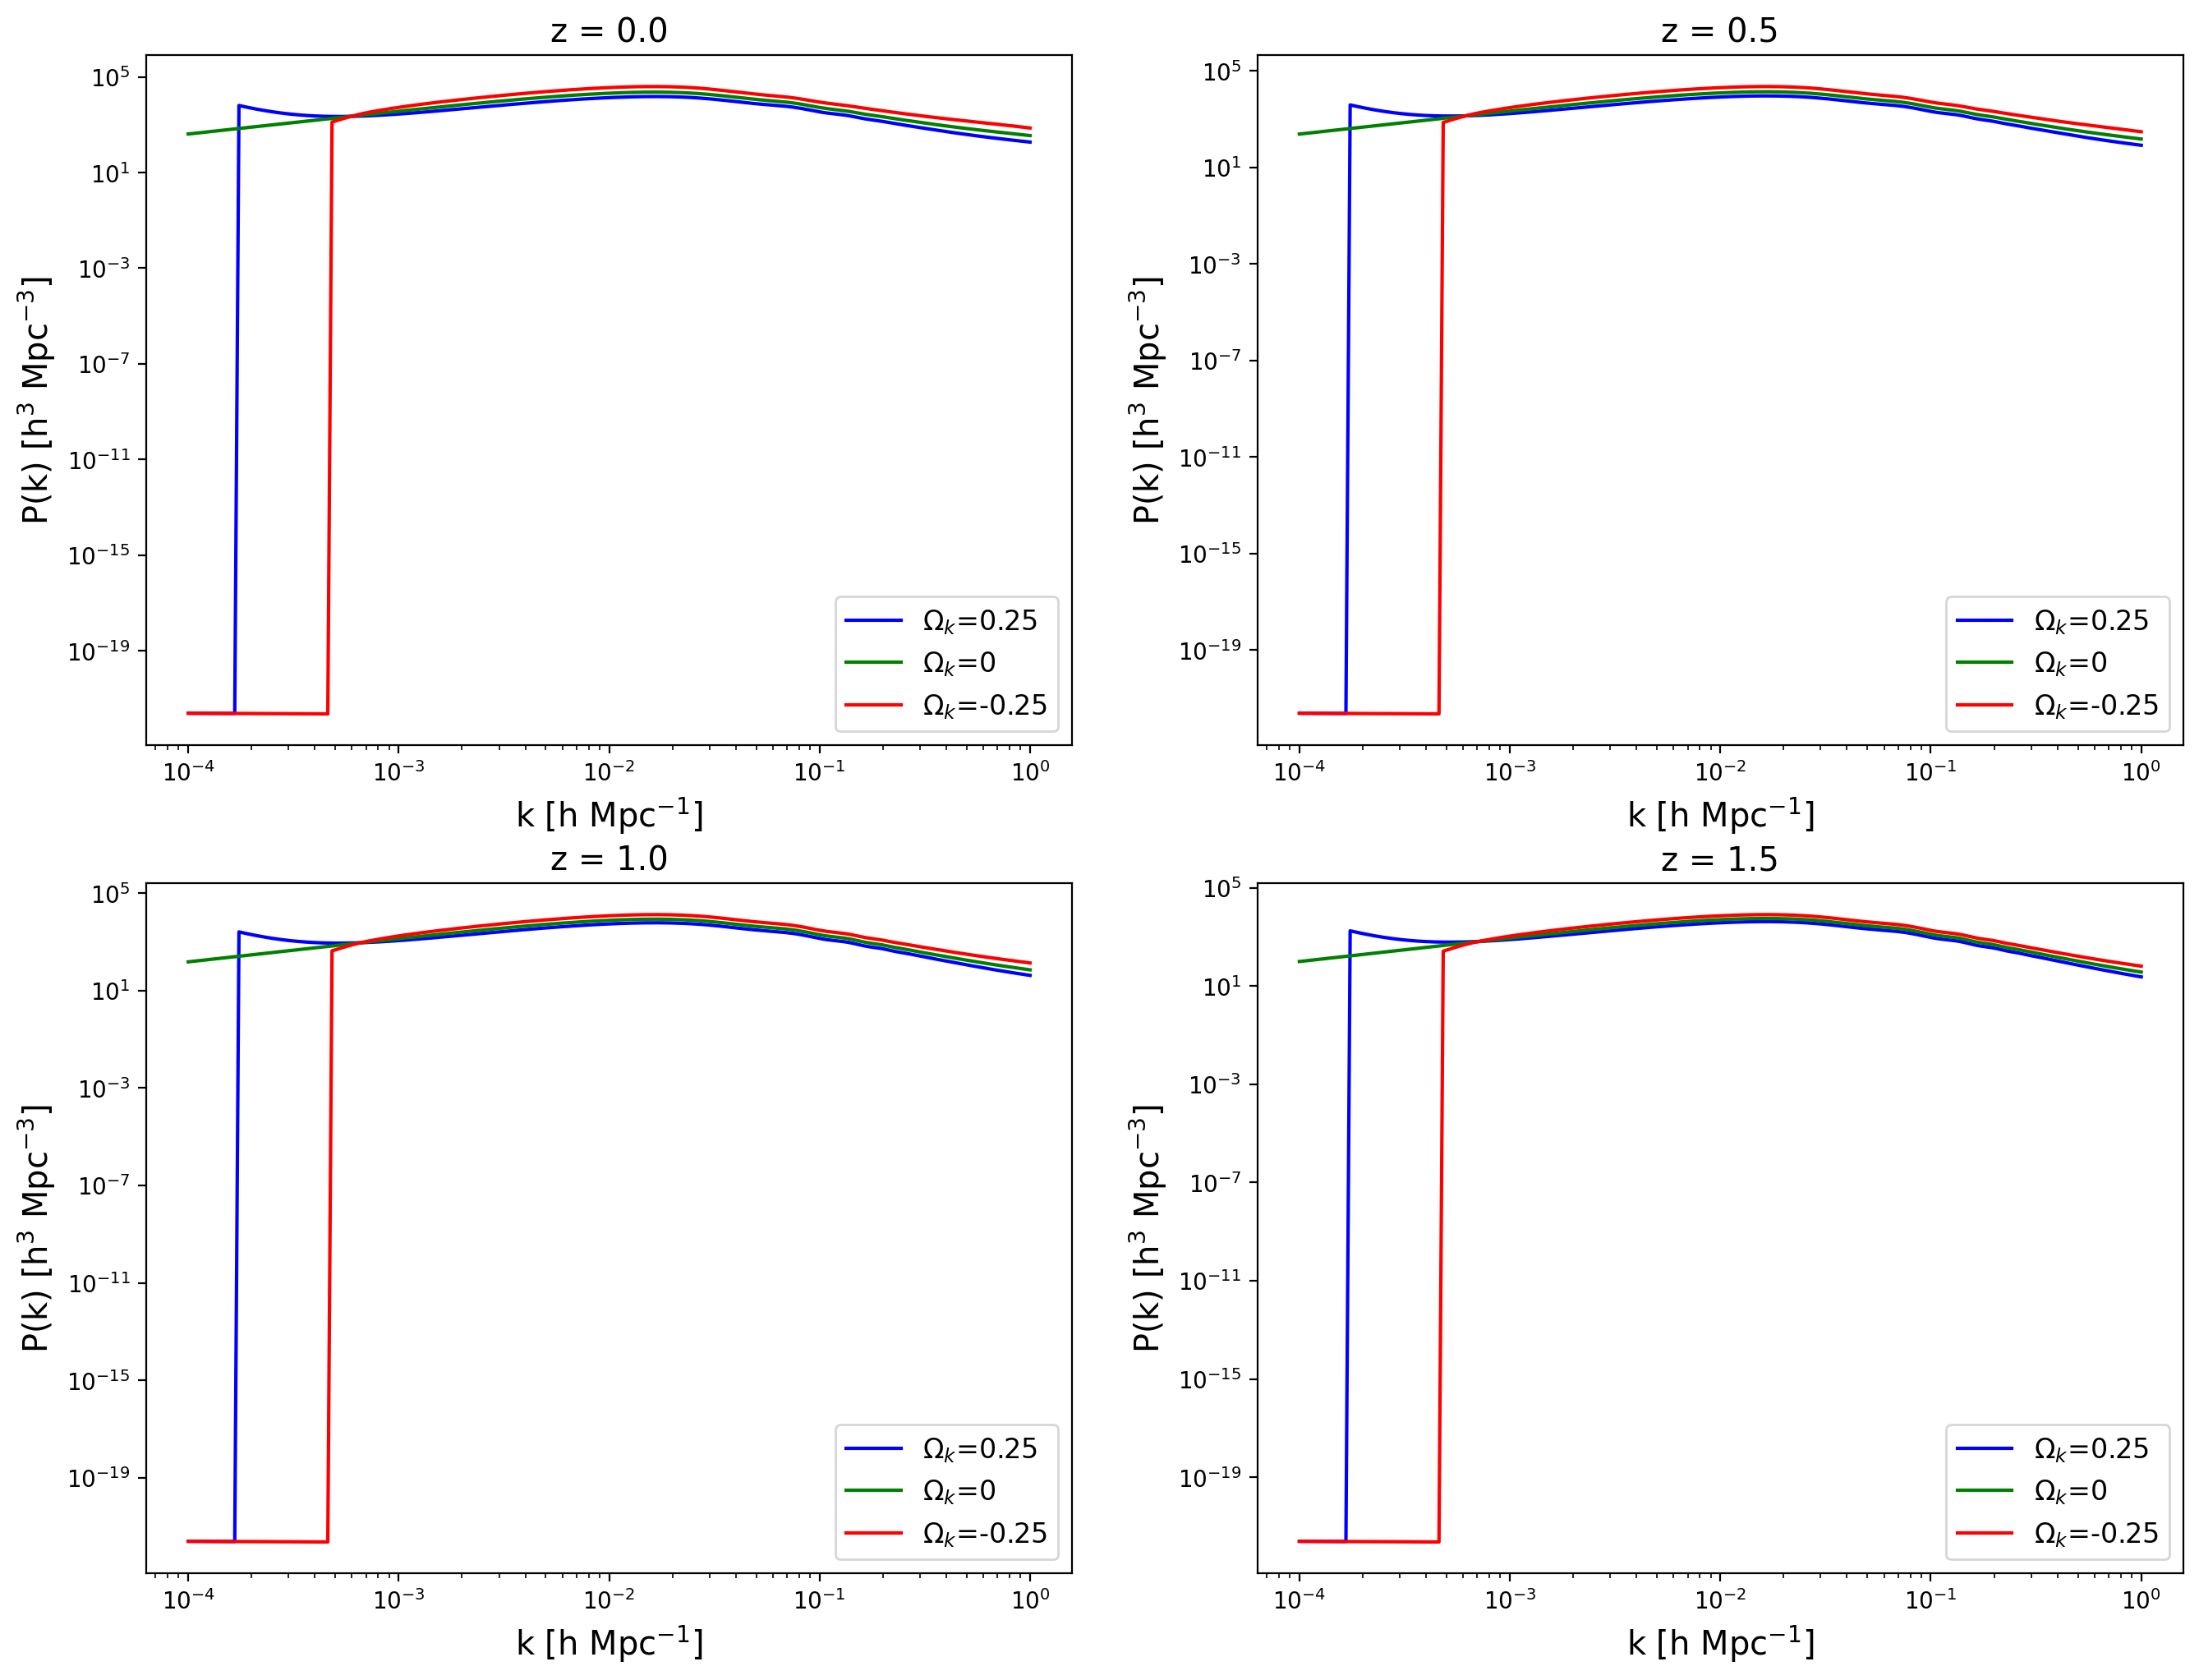

In [22]:
# Matter power spectra w/ k/h x-axis at various z values

fig, ax = plt.subplots(2,2, figsize=(16,12))
#list of parameter values and their respective colors to be plotted, in the form [param, non-linear color]
vals_and_colors = np.array([[0.25, 'blue', 'darkblue'], [0, 'green', 'darkgreen'], [-.25, 'red','darkred']])
first_peak_pos = [[],[],[],[]]
for i in vals_and_colors:
    param = float(i[0])
    pars = camb.CAMBparams()
    pars.set_cosmology(H0 = 67, omk = param)
    pars.set_matter_power(redshifts=[0., .5, 1, 1.5], kmax=2.0)

    #Non-Linear spectra (Halofit)
    pars.NonLinear = model.NonLinear_both
    results = camb.get_results(pars)
    results.calc_power_spectra(pars)
    kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

    for j, (redshift, line) in enumerate(zip(z_nonlin,['-','-', '-', '-'])):
        ax[min(1,j-j%2),j%2].loglog(kh_nonlin, pk_nonlin[j,:], color=i[1], ls = '-', label = r'$\Omega_k$='+i[0])
        ax[min(1,j-j%2), j%2].set_title('z = '+str(redshift), fontsize='x-large')
        #maxima = get_maxima(pk_nonlin[j,:], criteria=3)
        #first_peak_pos[j].append(redshift)
        #first_peak_pos[j].append(kh_nonlin[int(maxima[0,1])])
        #ax[min(1,j-j%2),j%2].scatter(kh_nonlin[int(maxima[0,1])], maxima[0,0], color = i[1])
        
    #plt.title('Matter power at z=%s and z= %s'%tuple(z))


for axl in np.array(ax).flatten():
    axl.legend(fontsize='large')
    axl.set_xlabel('k [h Mpc$^{-1}$]', fontsize='x-large')
    axl.set_ylabel('P(k) [h$^3$ Mpc$^{-3}$]', fontsize='x-large')
plt.show()

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


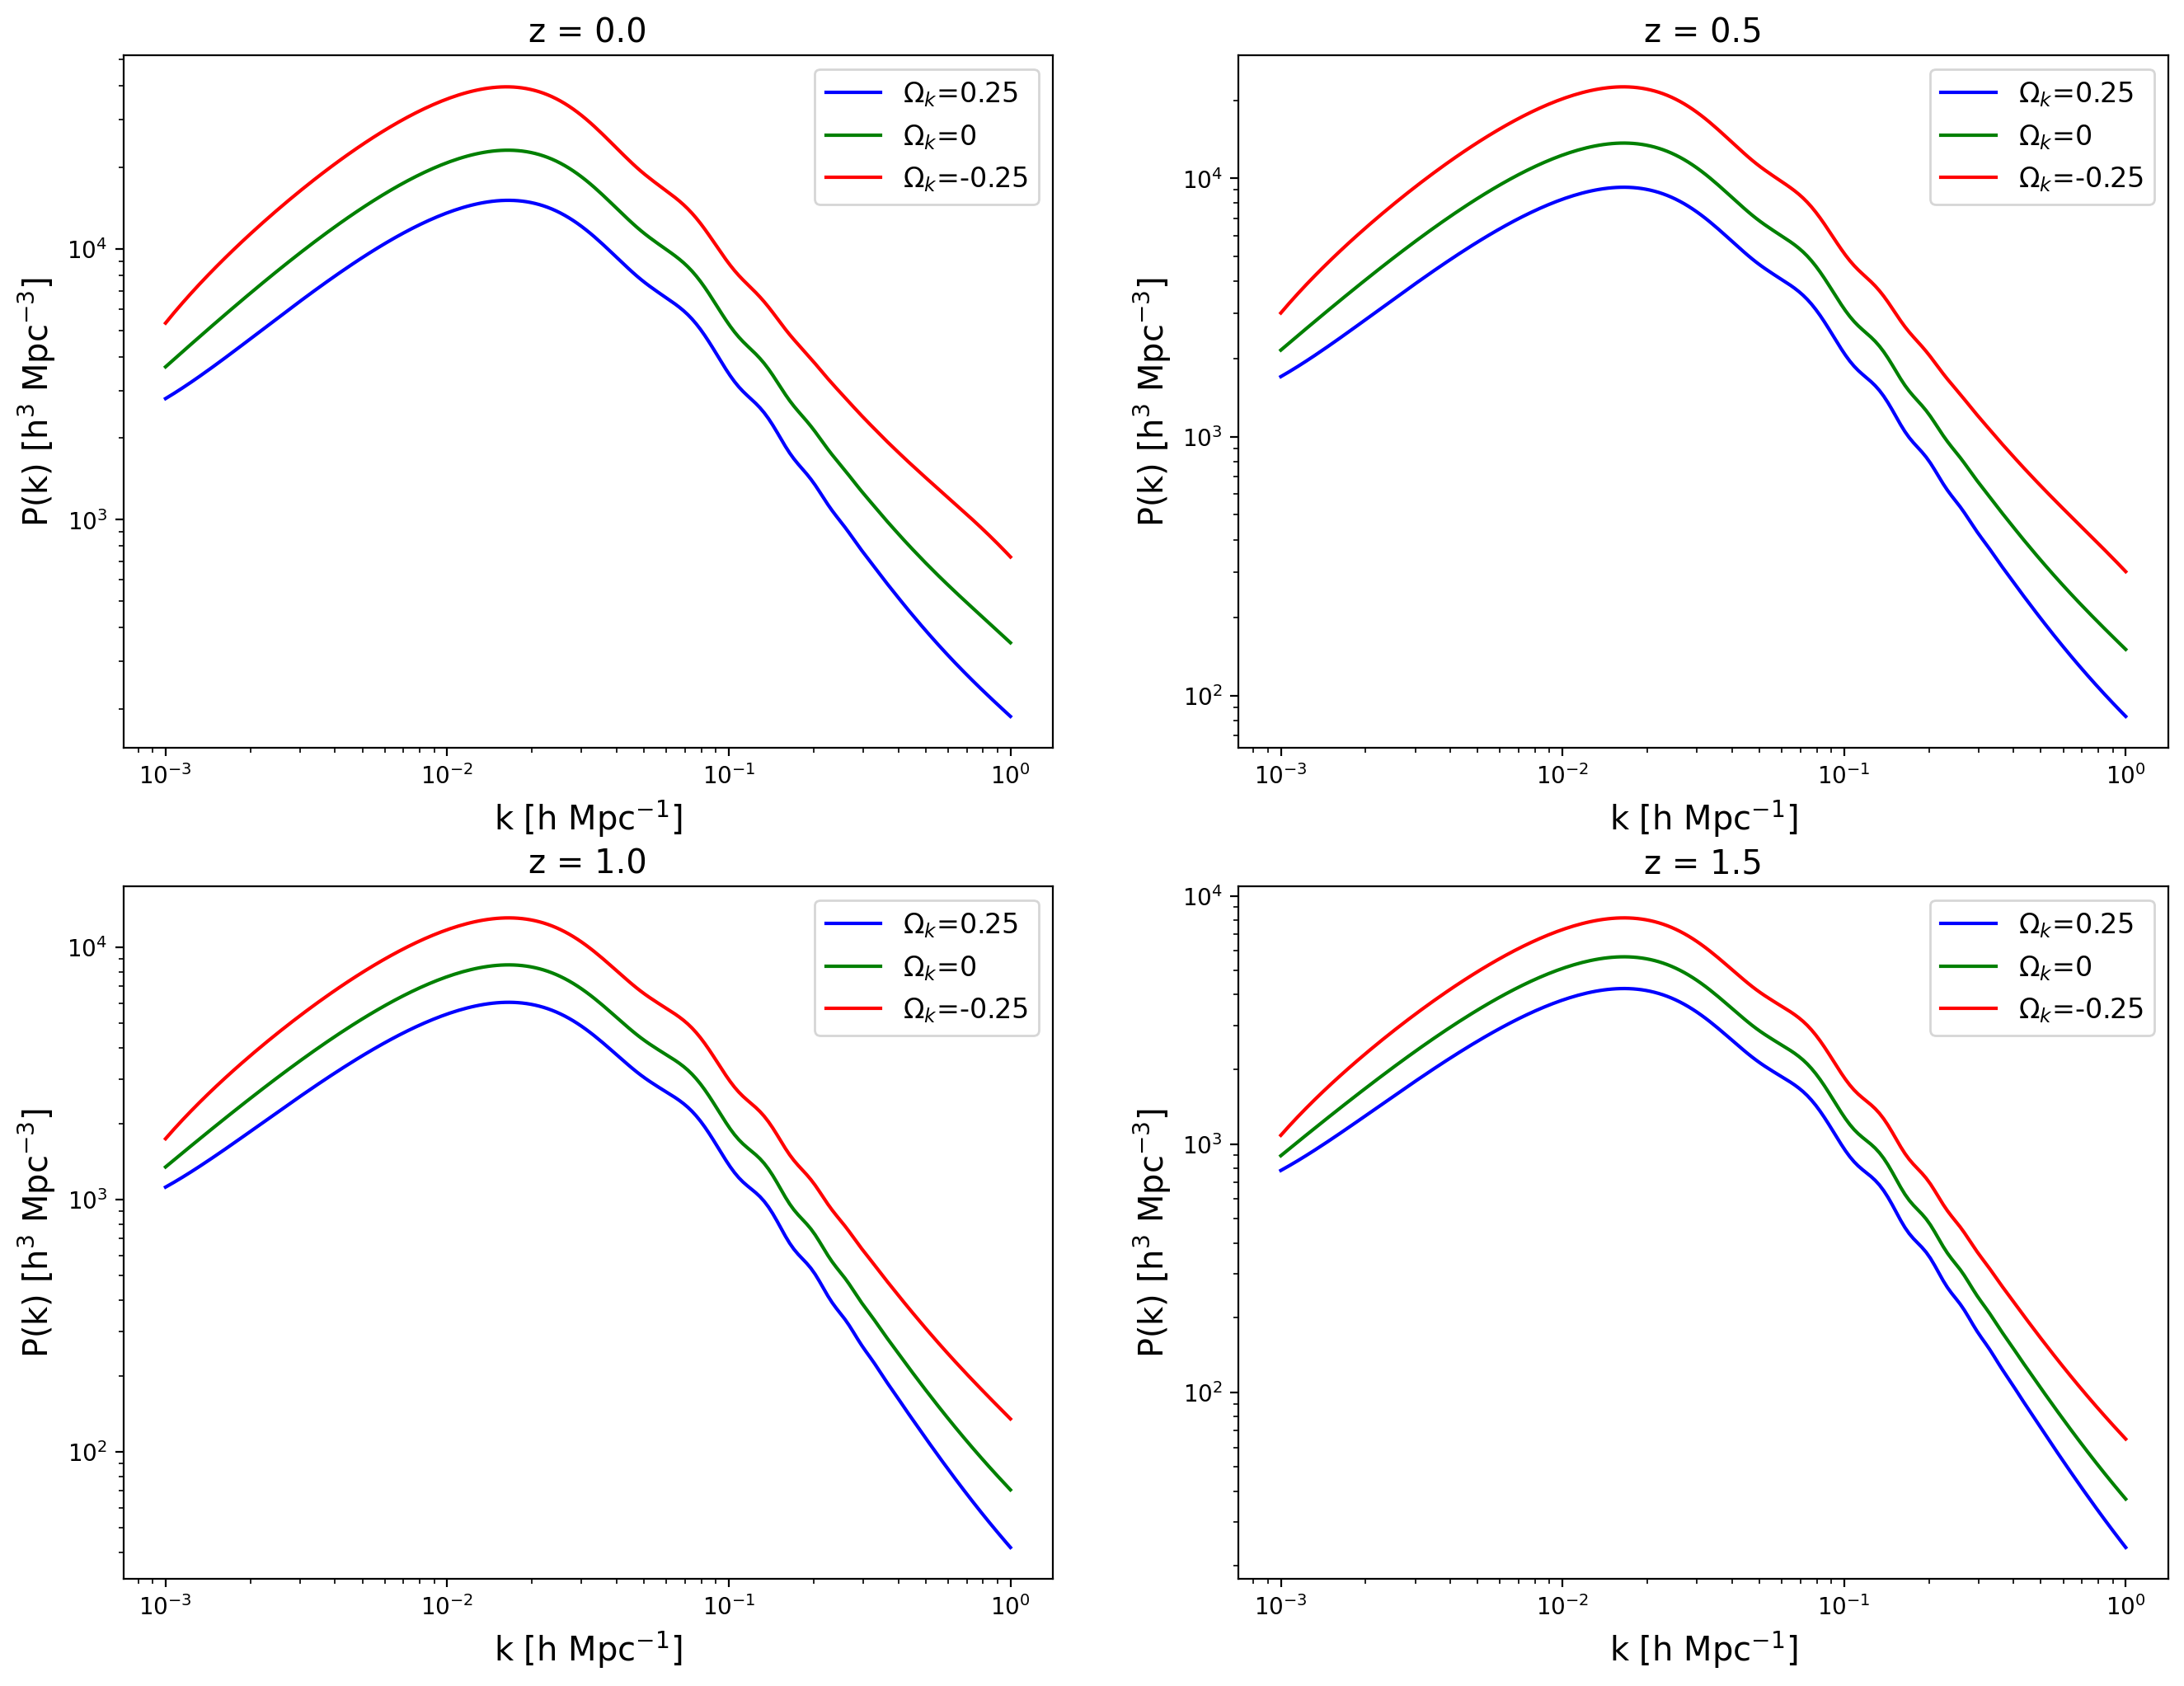

In [23]:
# Matter power spectra w/ k/h x-axis at various z values

fig, ax = plt.subplots(2,2, figsize=(16,12))
#list of parameter values and their respective colors to be plotted, in the form [param, non-linear color]
vals_and_colors = np.array([[0.25, 'blue', 'darkblue'], [0, 'green', 'darkgreen'], [-.25, 'red','darkred']])
first_peak_pos = [[],[],[],[]]
for i in vals_and_colors:
    param = float(i[0])
    pars = camb.CAMBparams()
    pars.set_cosmology(H0 = 67, omk = param)
    pars.set_matter_power(redshifts=[0., .5, 1, 1.5], kmax=2.0)

    #Non-Linear spectra (Halofit)
    pars.NonLinear = model.NonLinear_both
    results = camb.get_results(pars)
    results.calc_power_spectra(pars)
    kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-3, maxkh=1, npoints = 200)

    for j, (redshift, line) in enumerate(zip(z_nonlin,['-','-', '-', '-'])):
        ax[min(1,j-j%2),j%2].loglog(kh_nonlin, pk_nonlin[j,:], color=i[1], ls = '-', label = r'$\Omega_k$='+i[0])
        ax[min(1,j-j%2), j%2].set_title('z = '+str(redshift), fontsize='x-large')
        #maxima = get_maxima(pk_nonlin[j,:], criteria=3)
        #first_peak_pos[j].append(redshift)
        #first_peak_pos[j].append(kh_nonlin[int(maxima[0,1])])
        #ax[min(1,j-j%2),j%2].scatter(kh_nonlin[int(maxima[0,1])], maxima[0,0], color = i[1])
        
    #plt.title('Matter power at z=%s and z= %s'%tuple(z))


for axl in np.array(ax).flatten():
    axl.legend(fontsize='large')
    axl.set_xlabel('k [h Mpc$^{-1}$]', fontsize='x-large')
    axl.set_ylabel('P(k) [h$^3$ Mpc$^{-3}$]', fontsize='x-large')
plt.show()

# Varying $A_s$

## CMB Power Spectra

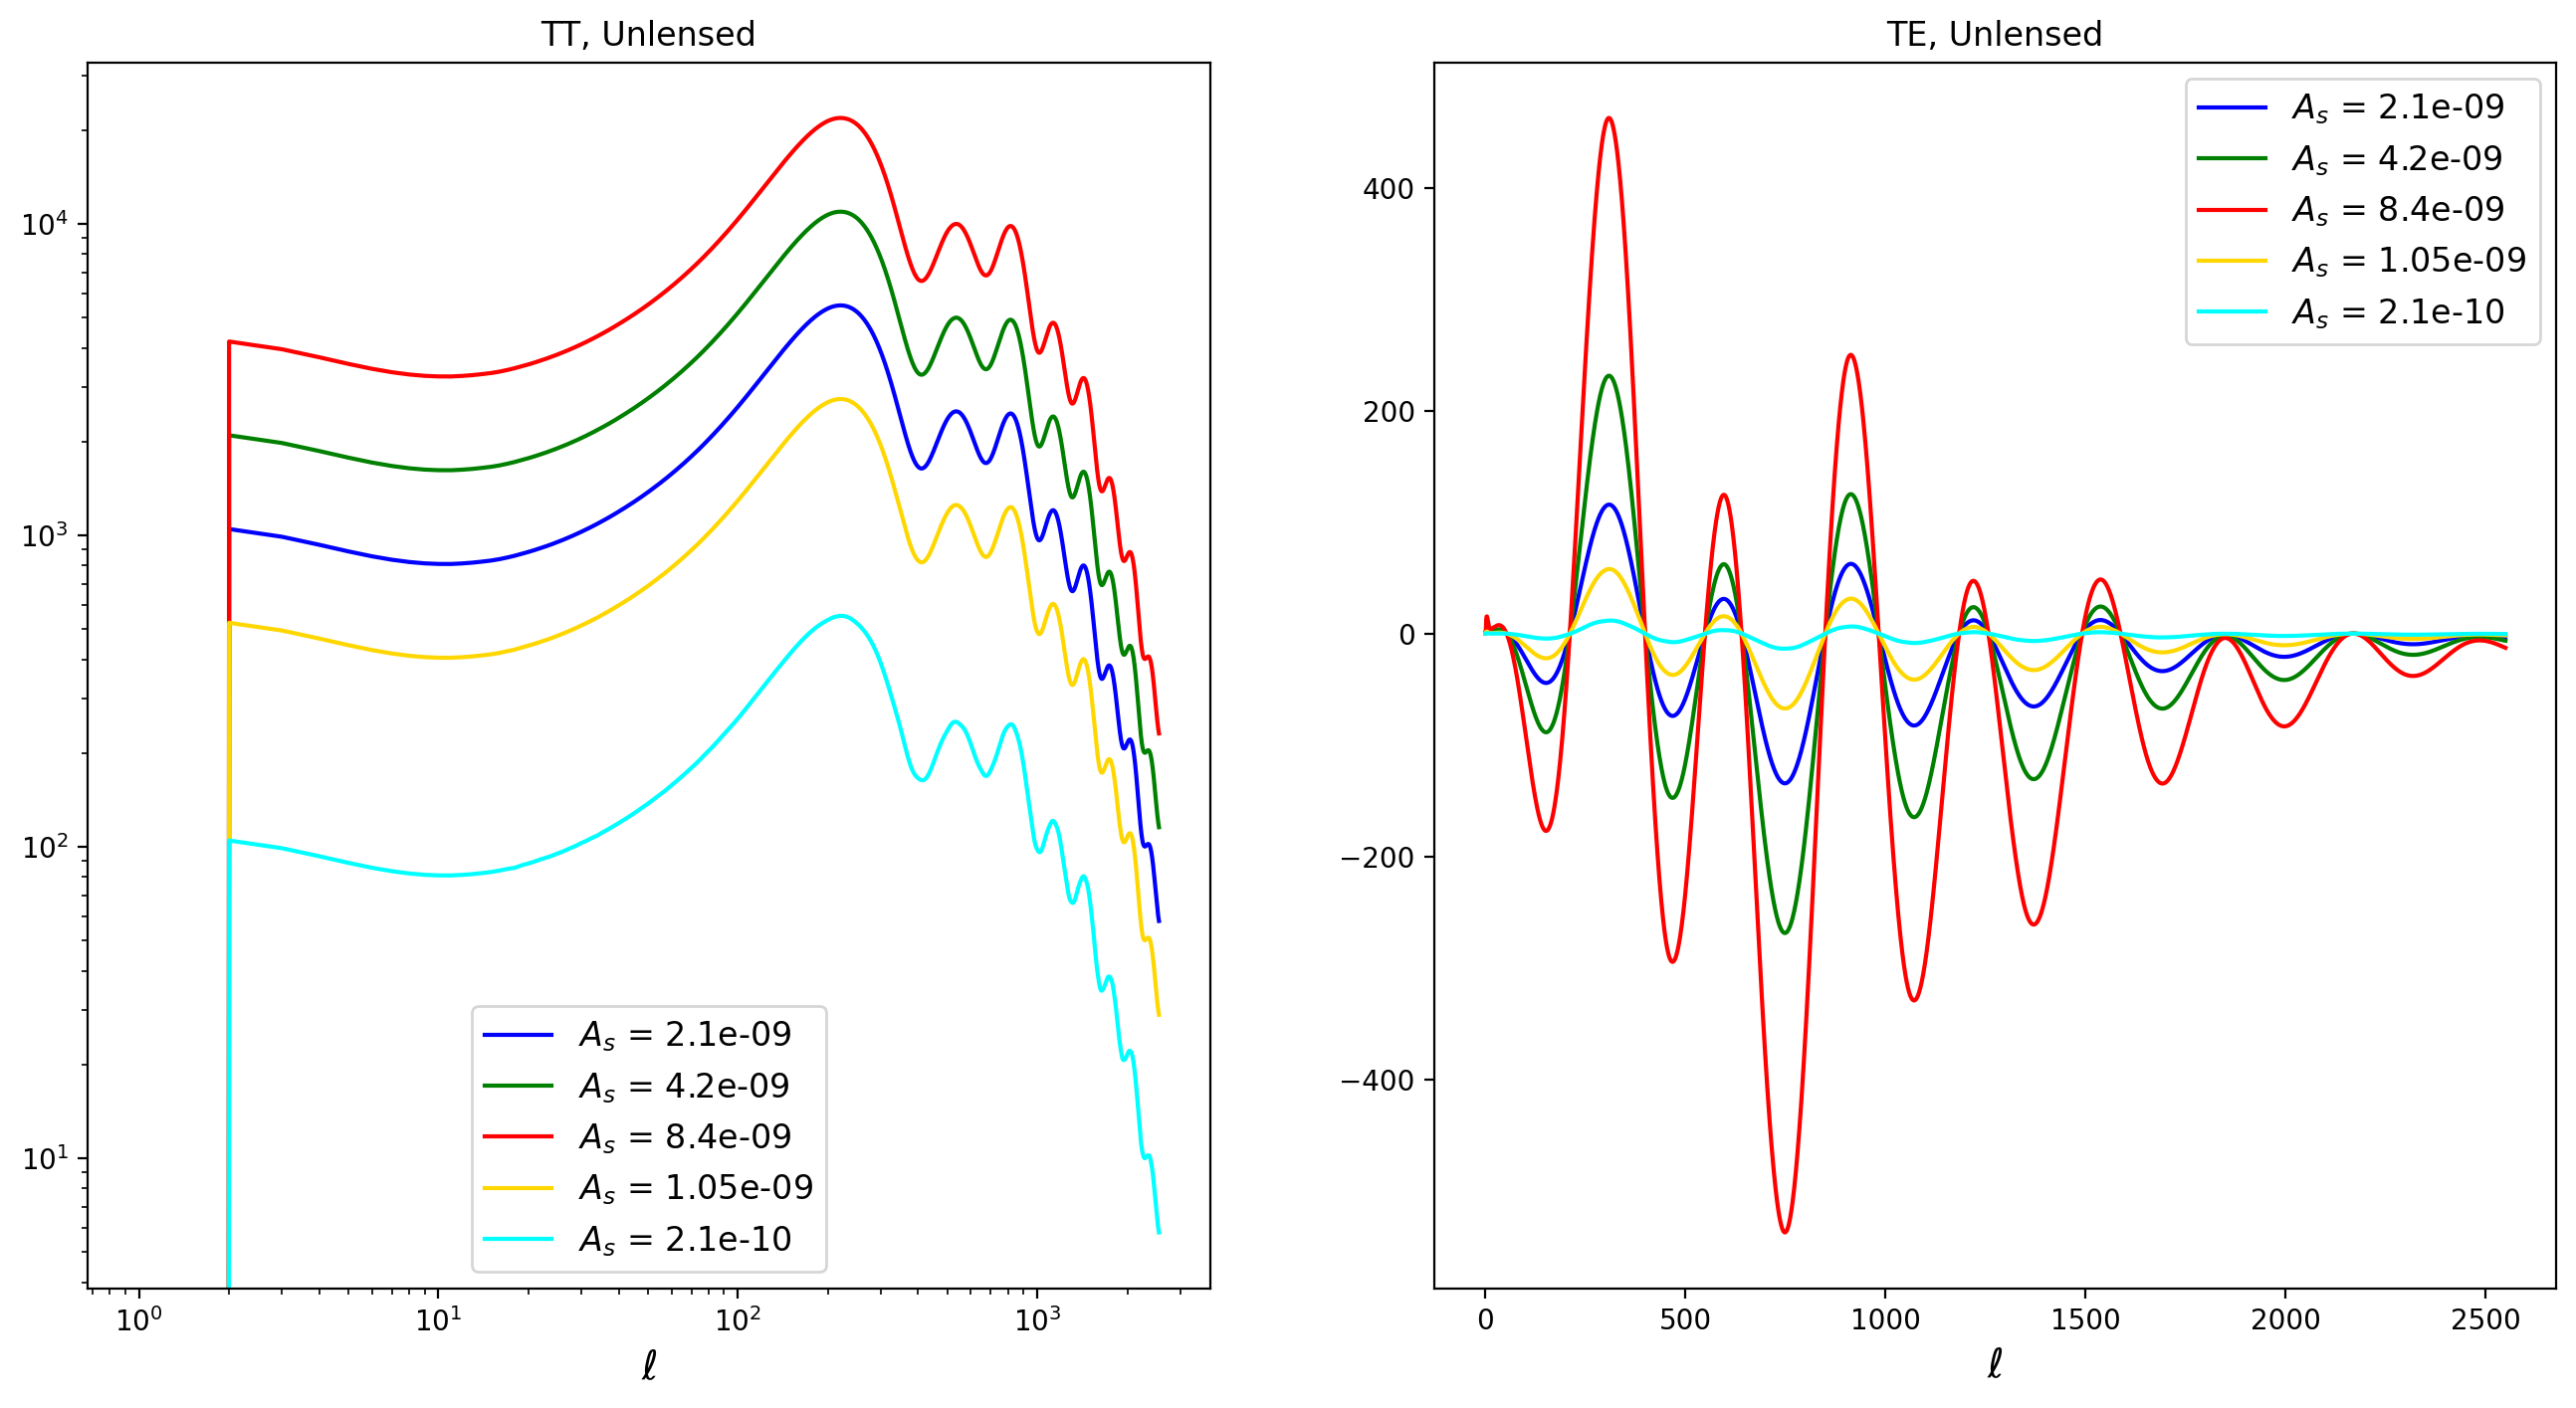

In [24]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].set_title('TT, Unlensed')
ax[1].set_title('TE, Unlensed')
#list of parameter values and their respective colors to be plotted, in the form [param, unlensed color, lensed color]
vals_and_colors = np.array([[2.1e-9, 'blue', 'darkblue'], [4.2e-9, 'green', 'darkgreen'], [8.4e-9, 'red','darkred'], [1.05e-9, 'gold', 'black'], [2.1e-10, 'cyan', 'black']])
for i in vals_and_colors:
    param = float(i[0])
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=67)
    pars.InitPower.set_params(As=param)
    pars.set_for_lmax(2500, lens_potential_accuracy=0)
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')

    unlensedCL=powers['unlensed_scalar']
    lensedCL = powers['lensed_scalar']
    ls = np.arange(unlensedCL.shape[0])
    ax[0].loglog(ls, unlensedCL[:,0], color=i[1], label=r'$A_s$ = ' +i[0])
    #ax[0].plot(ls, lensedCL[:,0] , color=i[2], label ='Lensed, H_0 = ' +str(i[0]))

    ax[1].plot(ls, unlensedCL[:,3], color=i[1], label=r'$A_s$ = ' +i[0])
    #ax[1].plot(ls, lensedCL[:,3] , color=i[2], label ='Lensed, H_0 = ' +str(i[0]))
    
    ax[1].plot()
for axl in np.array(ax).flatten():
    axl.legend(fontsize='large')
    axl.set_xlabel('$\ell$', fontsize='x-large')
plt.show()

## Matter Power Spectra

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


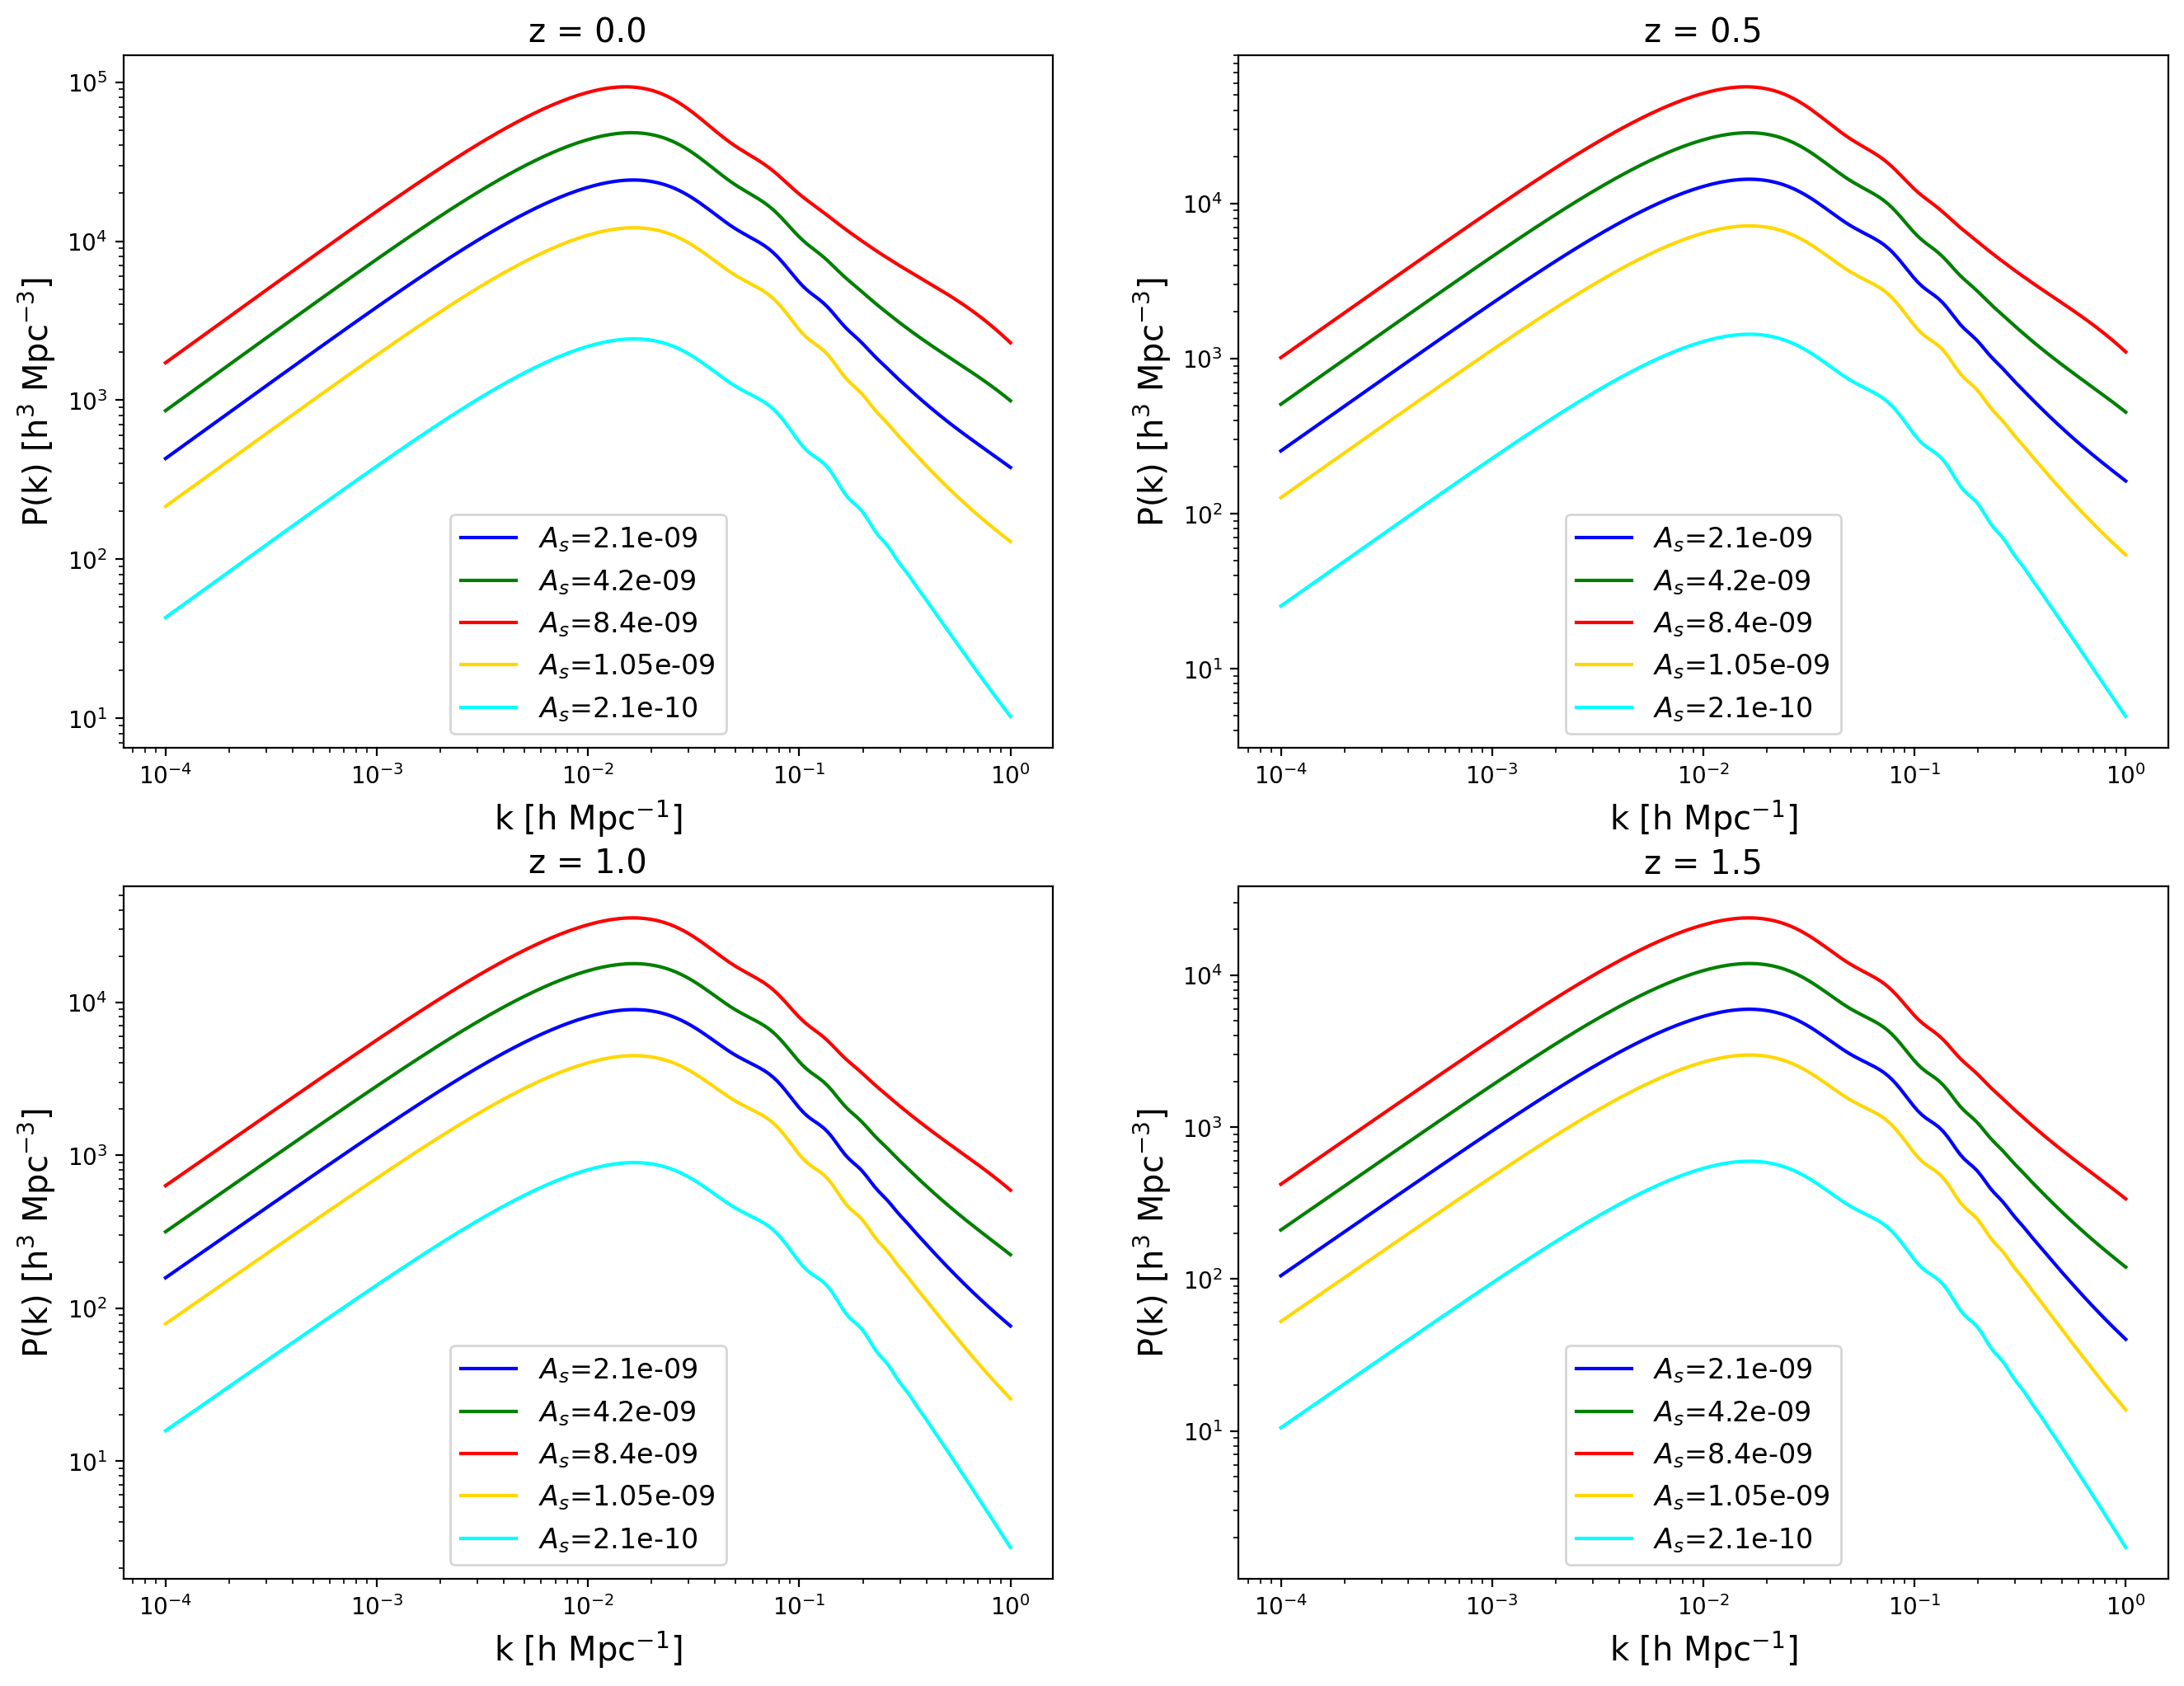

In [25]:
fig, ax = plt.subplots(2,2, figsize=(16,12))
#list of parameter values and their respective colors to be plotted, in the form [param, non-linear color]
#vals_and_colors = np.array([[2.1e-9, 'blue', 'darkblue'], [5e-9, 'green', 'darkgreen'], [2.1e-10, 'red','darkred'], [1.05e-9, 'gold', 'black']])
vals_and_colors = np.array([[2.1e-9, 'blue', 'darkblue'], [4.2e-9, 'green', 'darkgreen'], [8.4e-9, 'red','darkred'], [1.05e-9, 'gold', 'black'], [2.1e-10, 'cyan', 'black']])
first_peak_pos = [[],[],[],[]]
for i in vals_and_colors:
    param = float(i[0])
    pars = camb.CAMBparams()
    pars.set_cosmology(H0 = 67)
    pars.InitPower.set_params(As=param)
    pars.set_matter_power(redshifts=[0., .5, 1, 1.5], kmax=2.0)

    #Non-Linear spectra (Halofit)
    pars.NonLinear = model.NonLinear_both
    results = camb.get_results(pars)
    results.calc_power_spectra(pars)
    kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

    for j, (redshift, line) in enumerate(zip(z_nonlin,['-','-', '-', '-'])):
        ax[min(1,j-j%2),j%2].loglog(kh_nonlin, pk_nonlin[j,:], color=i[1], ls = '-', label = r'$A_s$='+i[0])
        ax[min(1,j-j%2), j%2].set_title('z = '+str(redshift), fontsize='x-large')
        #maxima = get_maxima(pk_nonlin[j,:], criteria=3)
        #first_peak_pos[j].append(redshift)
        #first_peak_pos[j].append(kh_nonlin[int(maxima[0,1])])
        #ax[min(1,j-j%2),j%2].scatter(kh_nonlin[int(maxima[0,1])], maxima[0,0], color = i[1])
        
    #plt.title('Matter power at z=%s and z= %s'%tuple(z))


for axl in np.array(ax).flatten():
    axl.legend(fontsize='large')
    axl.set_xlabel('k [h Mpc$^{-1}$]', fontsize='x-large')
    axl.set_ylabel('P(k) [h$^3$ Mpc$^{-3}$]', fontsize='x-large')
plt.show()

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


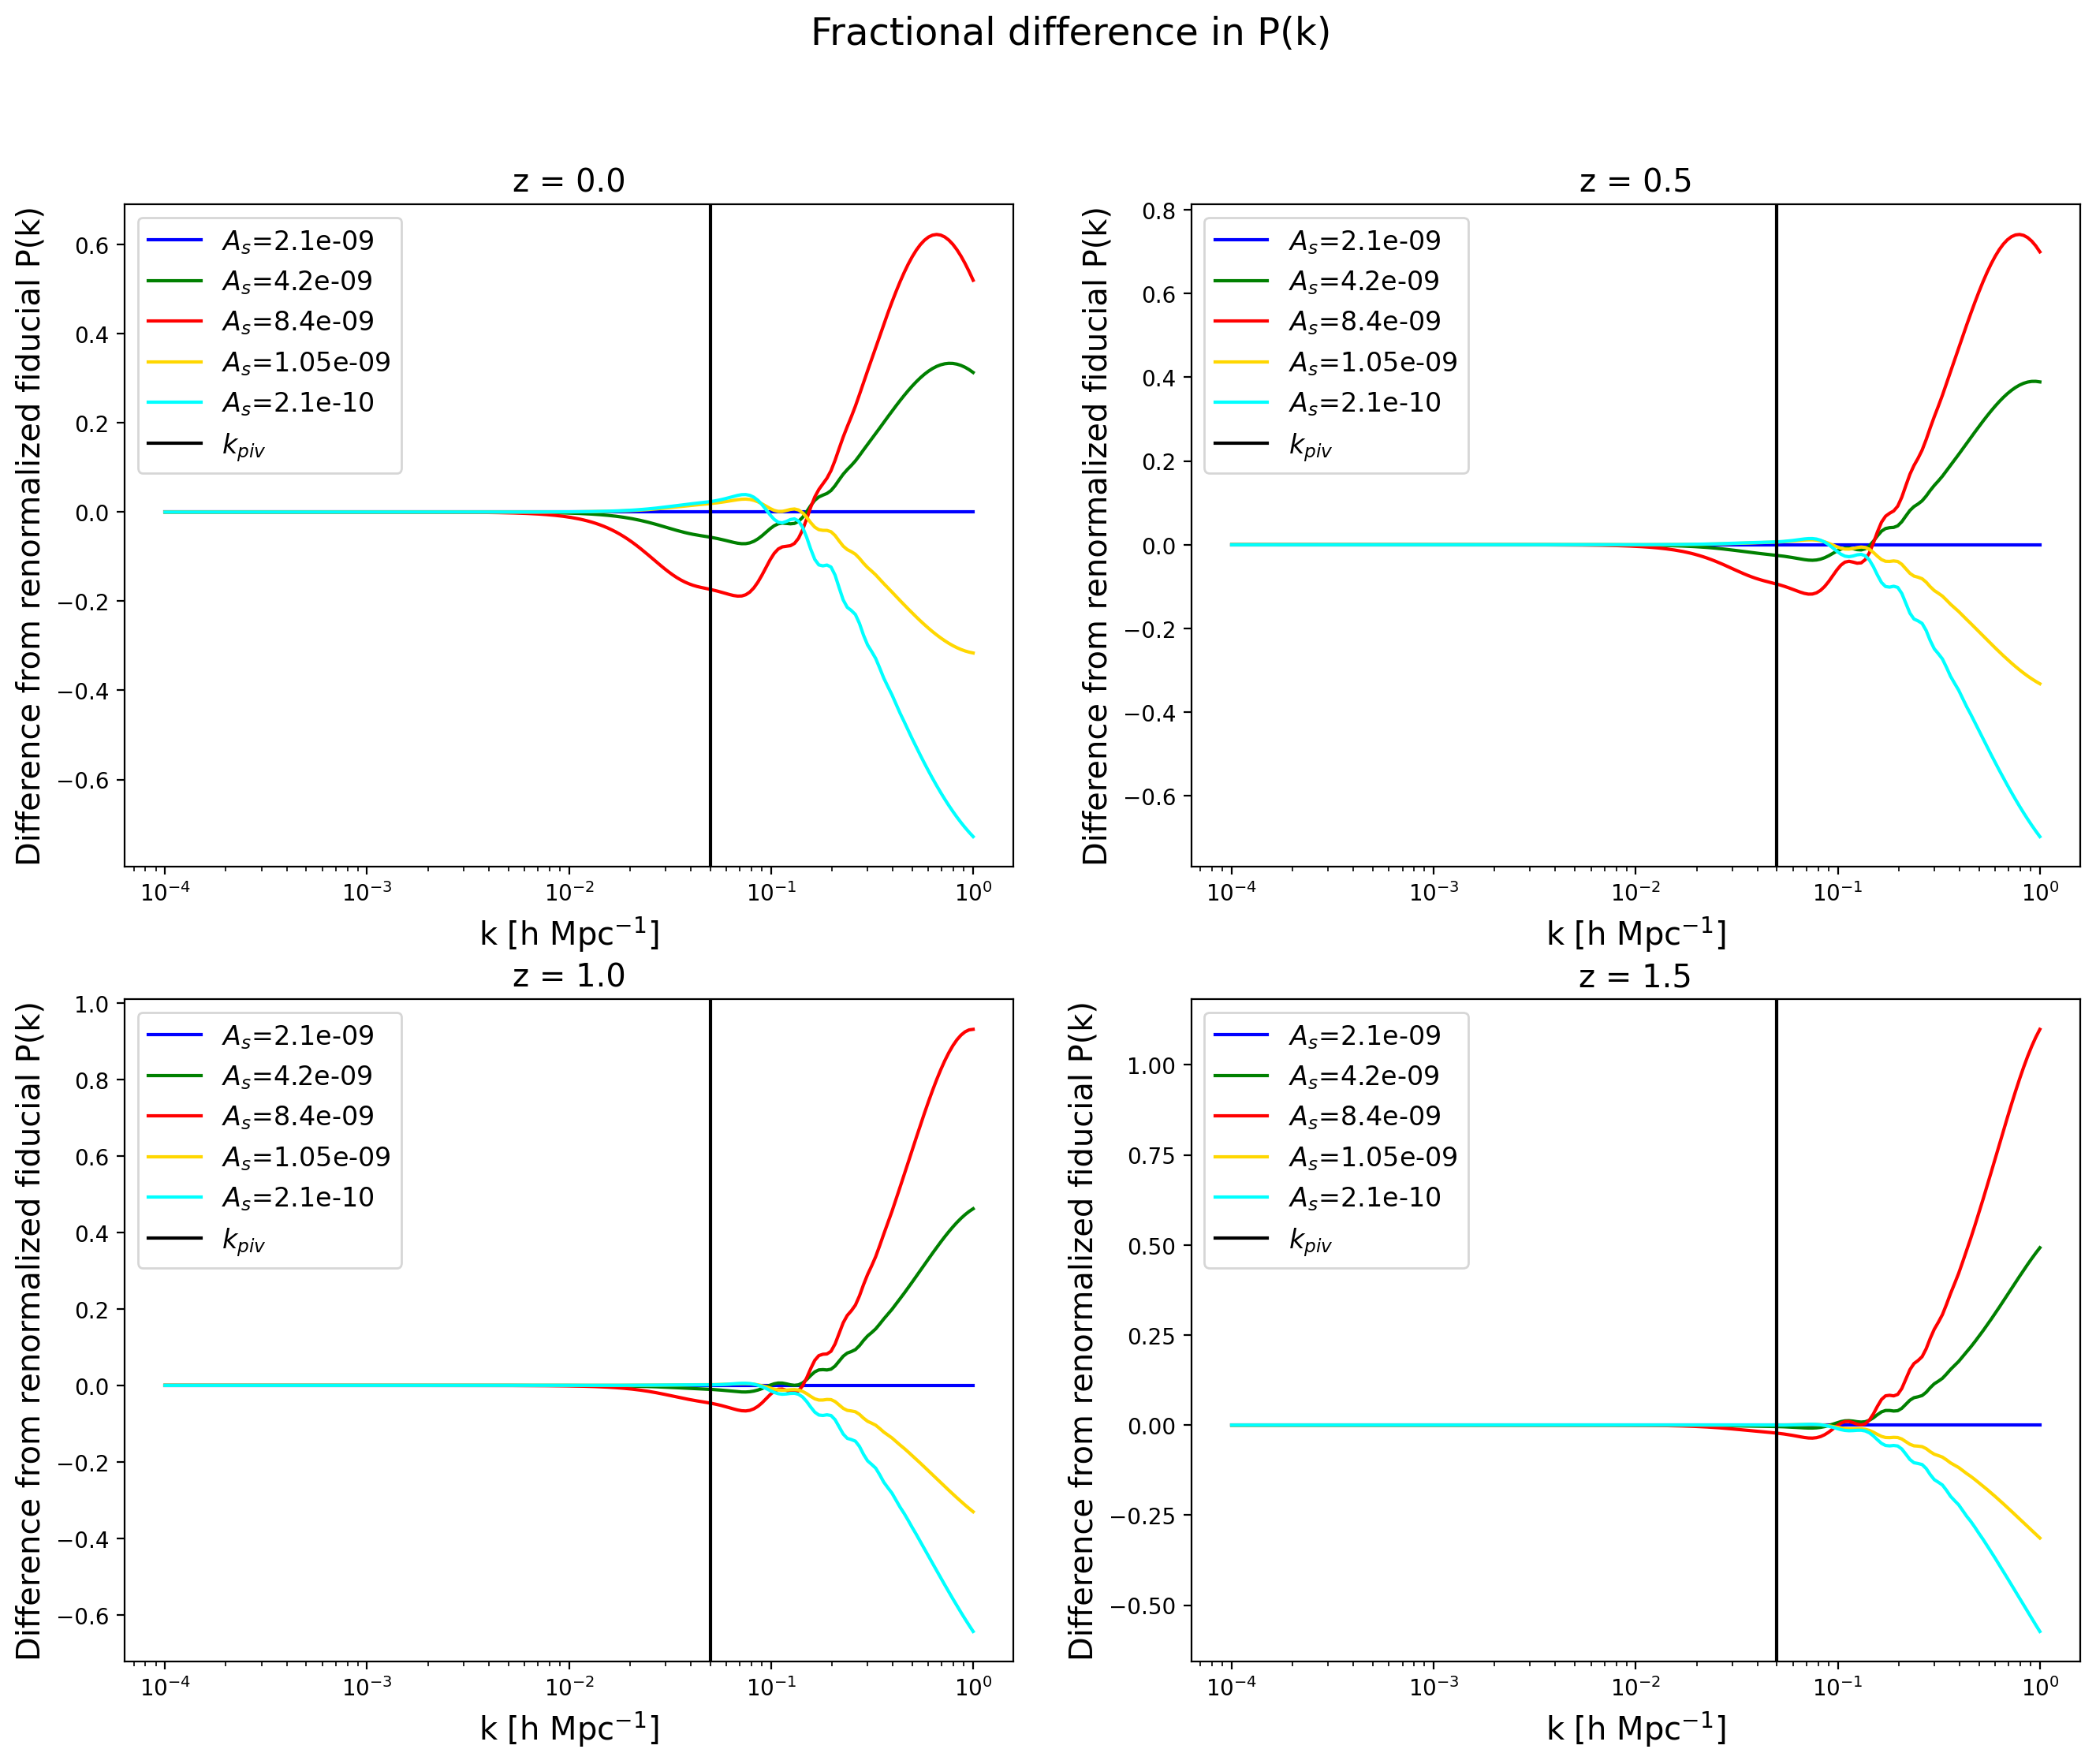

In [26]:
fig, ax = plt.subplots(2,2, figsize=(16,12))
#Comparing fractional differences in P(k) for various A_s.

fig.suptitle('Fractional difference in P(k)', fontsize='xx-large')

pars = camb.CAMBparams()
pars.set_cosmology(H0 = 67)
pars.InitPower.set_params(As=2.1e-9)
pars.set_matter_power(redshifts=[0., .5, 1, 1.5], kmax=2.0)

#Non-Linear spectra (Halofit)
pars.NonLinear = model.NonLinear_both
results = camb.get_results(pars)
results.calc_power_spectra(pars)
kh_nonlin, z_nonlin, pk_nonlin_ref = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

vals_and_colors = np.array([[2.1e-9, 'blue', 'darkblue'], [4.2e-9, 'green', 'darkgreen'], [8.4e-9, 'red','darkred'], [1.05e-9, 'gold', 'black'], [2.1e-10, 'cyan', 'black']])
first_peak_pos = [[],[],[],[]]
for i in vals_and_colors:
    param = float(i[0])
    pars = camb.CAMBparams()
    pars.set_cosmology(H0 = 67)
    pars.InitPower.set_params(As=param)
    pars.set_matter_power(redshifts=[0., .5, 1, 1.5], kmax=2.0)

    #Non-Linear spectra (Halofit)
    pars.NonLinear = model.NonLinear_both
    results = camb.get_results(pars)
    results.calc_power_spectra(pars)
    kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

    for j, (redshift, line) in enumerate(zip(z_nonlin,['-','-', '-', '-'])):
        ax[min(1,j-j%2),j%2].semilogx(kh_nonlin, pk_nonlin[j,:]/pk_nonlin_ref[j,:]*2.1e-9/param-1, color=i[1], ls = '-', label = r'$A_s$='+i[0])
        ax[min(1,j-j%2), j%2].set_title('z = '+str(redshift), fontsize='x-large')
        #maxima = get_maxima(pk_nonlin[j,:], criteria=3)
        #first_peak_pos[j].append(redshift)
        #first_peak_pos[j].append(kh_nonlin[int(maxima[0,1])])
        #ax[min(1,j-j%2),j%2].scatter(kh_nonlin[int(maxima[0,1])], maxima[0,0], color = i[1])
        
    #plt.title('Matter power at z=%s and z= %s'%tuple(z))


for axl in np.array(ax).flatten():
    axl.axvline(x=.05, color='k', label=r'$k_{piv}$')
    axl.legend(fontsize='large')
    axl.set_xlabel('k [h Mpc$^{-1}$]', fontsize='x-large')
    axl.set_ylabel('Difference from renormalized fiducial P(k)', fontsize='x-large')
plt.show()

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


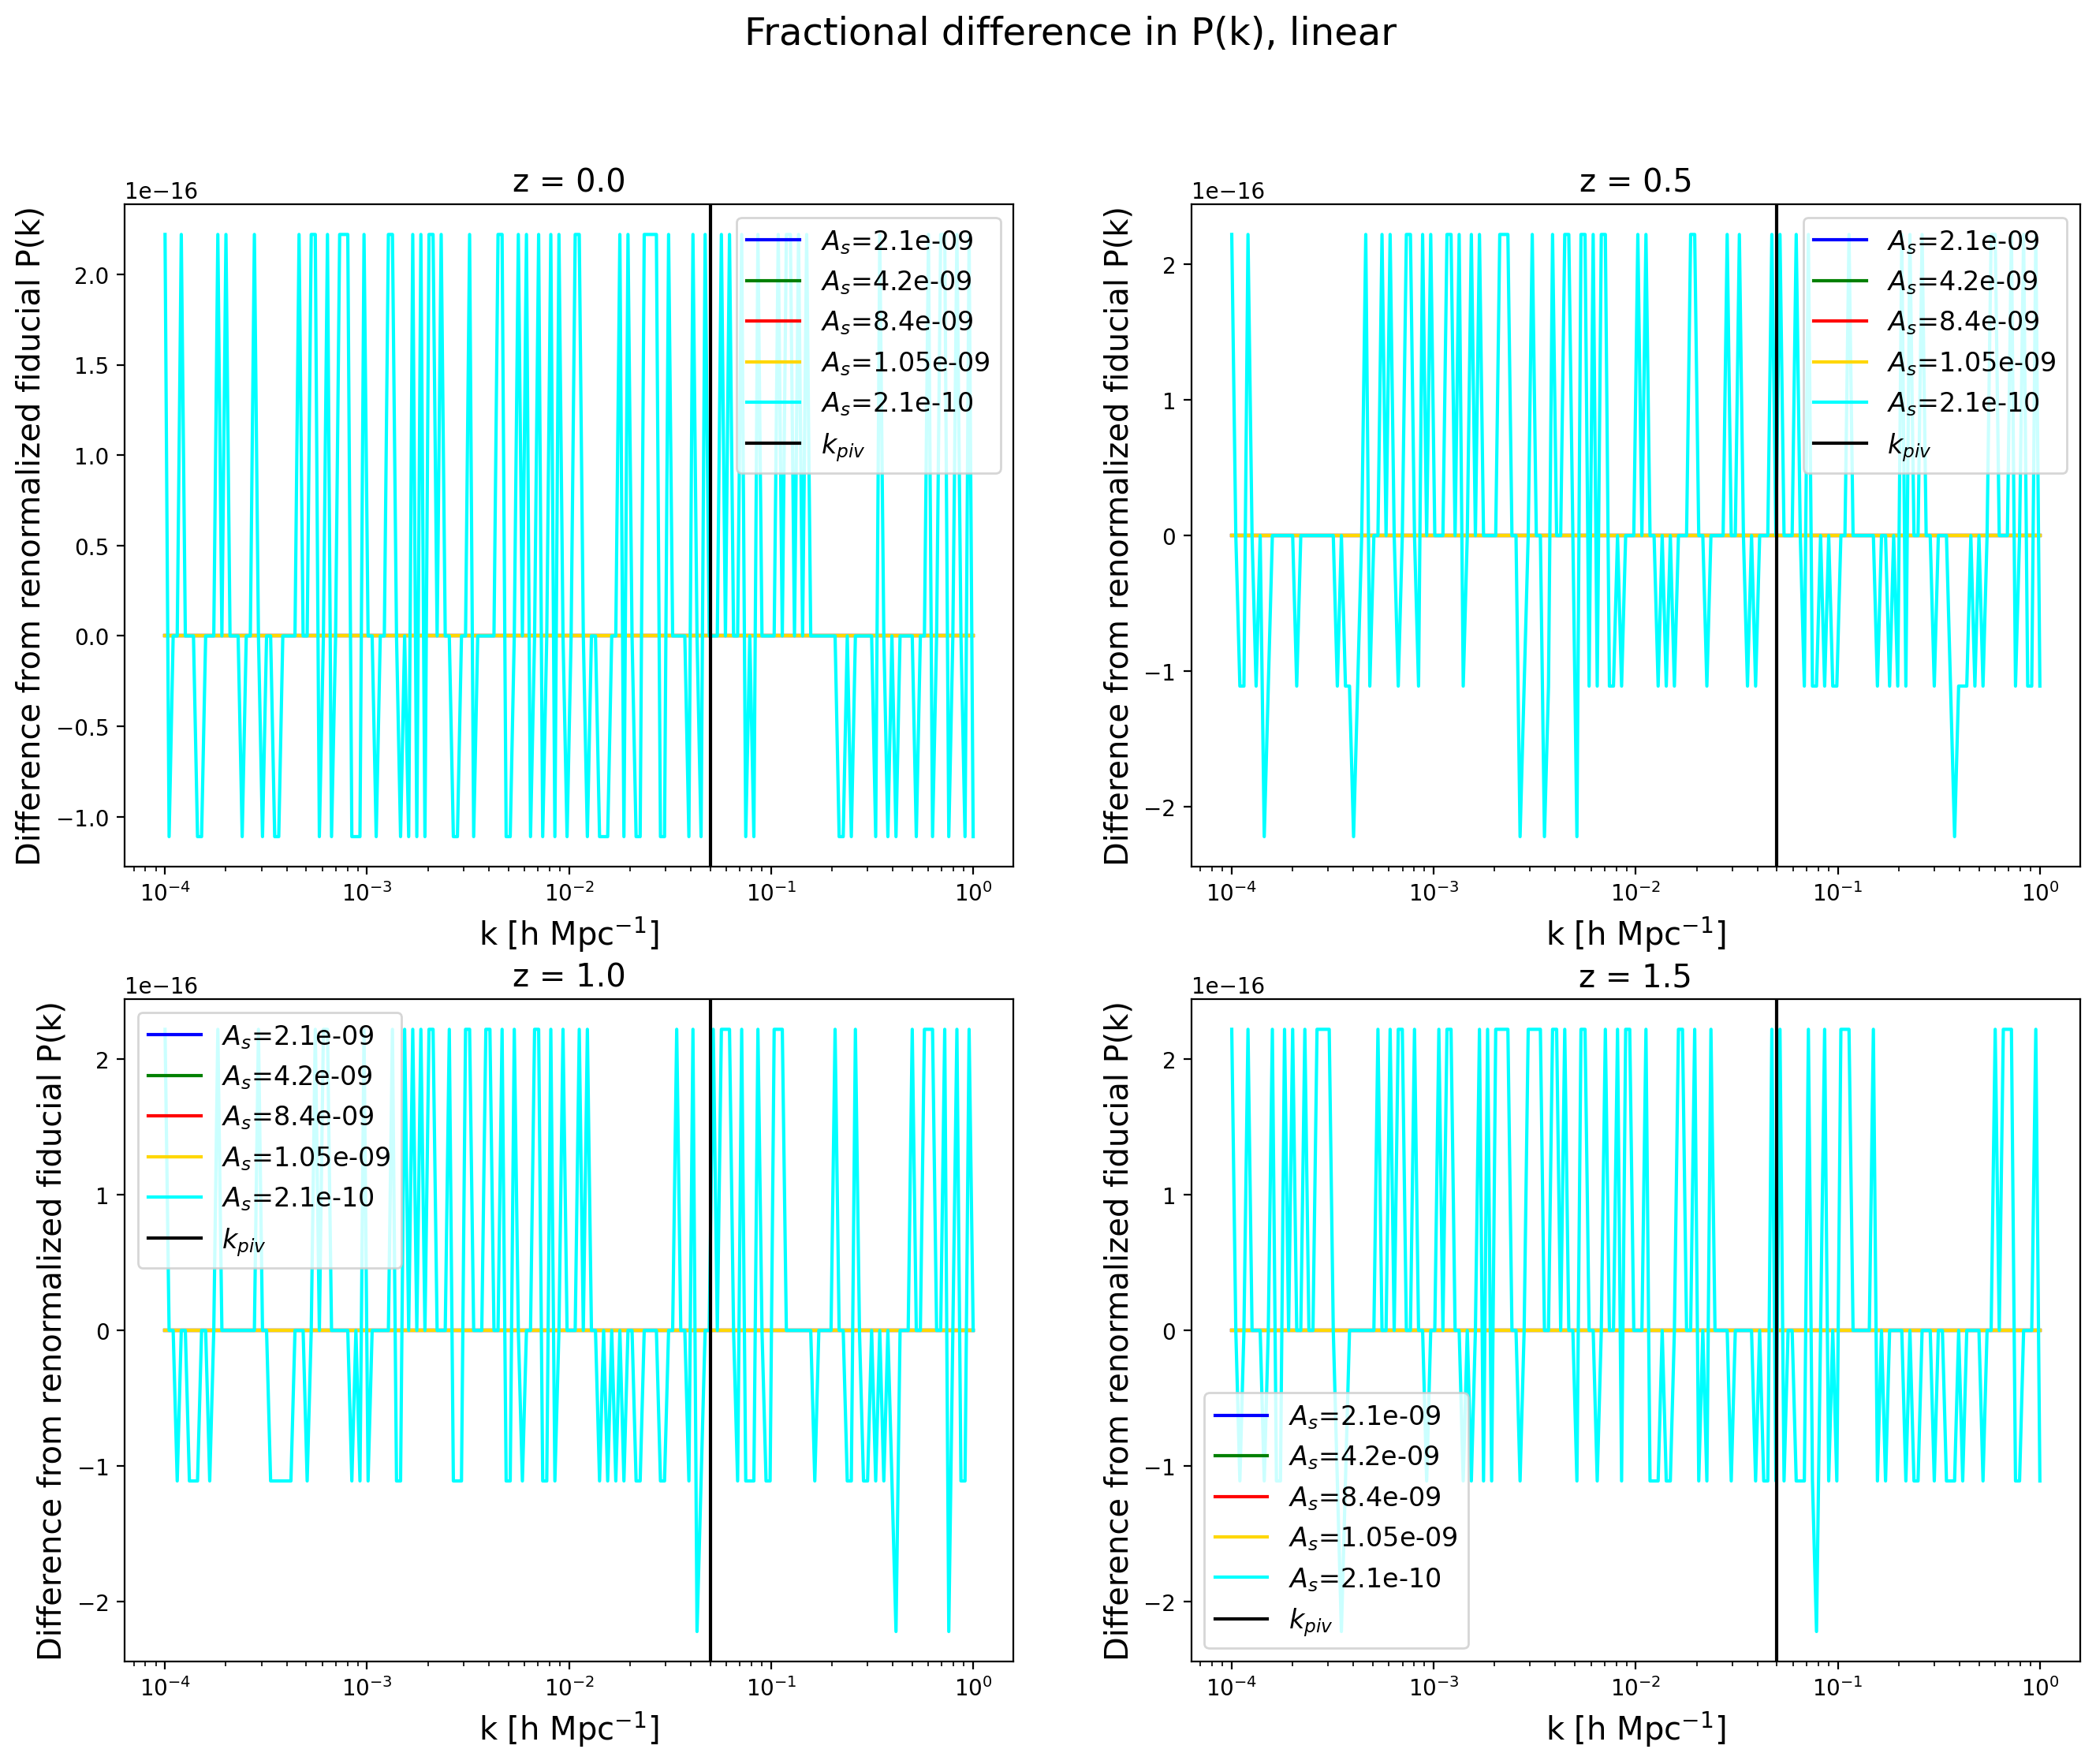

In [27]:
fig, ax = plt.subplots(2,2, figsize=(16,12))
#Comparing fractional differences in P(k) for various A_s.

fig.suptitle('Fractional difference in P(k), linear', fontsize='xx-large')

pars = camb.CAMBparams()
pars.set_cosmology(H0 = 67)
pars.InitPower.set_params(As=2.1e-9)
pars.set_matter_power(redshifts=[0., .5, 1, 1.5], kmax=2.0)

#Non-Linear spectra (Halofit)
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
results.calc_power_spectra(pars)
kh_nonlin, z_nonlin, pk_nonlin_ref = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

vals_and_colors = np.array([[2.1e-9, 'blue', 'darkblue'], [4.2e-9, 'green', 'darkgreen'], [8.4e-9, 'red','darkred'], [1.05e-9, 'gold', 'black'], [2.1e-10, 'cyan', 'black']])
first_peak_pos = [[],[],[],[]]
for i in vals_and_colors:
    param = float(i[0])
    pars = camb.CAMBparams()
    pars.set_cosmology(H0 = 67)
    pars.InitPower.set_params(As=param)
    pars.set_matter_power(redshifts=[0., .5, 1, 1.5], kmax=2.0)

    #Non-Linear spectra (Halofit)
    pars.NonLinear = model.NonLinear_none
    results = camb.get_results(pars)
    results.calc_power_spectra(pars)
    kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

    for j, (redshift, line) in enumerate(zip(z_nonlin,['-','-', '-', '-'])):
        ax[min(1,j-j%2),j%2].semilogx(kh_nonlin, pk_nonlin[j,:]/pk_nonlin_ref[j,:]*2.1e-9/param-1, color=i[1], ls = '-', label = r'$A_s$='+i[0])
        ax[min(1,j-j%2), j%2].set_title('z = '+str(redshift), fontsize='x-large')
        #maxima = get_maxima(pk_nonlin[j,:], criteria=3)
        #first_peak_pos[j].append(redshift)
        #first_peak_pos[j].append(kh_nonlin[int(maxima[0,1])])
        #ax[min(1,j-j%2),j%2].scatter(kh_nonlin[int(maxima[0,1])], maxima[0,0], color = i[1])
        
    #plt.title('Matter power at z=%s and z= %s'%tuple(z))


for axl in np.array(ax).flatten():
    axl.axvline(x=.05, color='k', label=r'$k_{piv}$')
    axl.legend(fontsize='large')
    axl.set_xlabel('k [h Mpc$^{-1}$]', fontsize='x-large')
    axl.set_ylabel('Difference from renormalized fiducial P(k)', fontsize='x-large')
plt.show()